## SJSU Capstone Data Analysis
*SJSU-MSTM*

### README
This notebook contains data cleaning, analysis and visualization for the SJSU capstone data; it validates data based on the Caltrans Data Quality Management Plan (DQMP) data quality dimensions listed below.

> Note: Similar to software [unit testing][01.00], it is intended to serve as a test suite for the specified dataset.

*Change Log*
* 10-21-2020: Submit Version 1.0
* 10-21-2020: Baseline Version v0.1
* 11-26-2024: SJSU Capstone Update

*Deliverables*
1. Test case are organized into separate modules and prints test results
2. Each test will output non-compliant records into CSV files for action
3. Data processing module produces transformed data (e.g. table joins)
4. Notebook generates data dictionary after running all test cases
5. All test cases are repeatable and documented

*Data Quality Dimensions (DQMP)*
1. Accuracy and Precision: Data is close to true value and exactness
2. Validity: Conforms to established formats, data types and ranges
3. Completeness: Absence of gaps in data, especially missing values
4. Consistency: Data is collected at similar datetime and location
5. Timeliness: Data is updated on a regular basis
6. Granularity: Data is collected at appropriate level of detail for use
7. Uniqueness: Best effort to collect data from authoritative sources
8. Accessibility: Data is collected or processed into useable formats
9. Reputation: Data is trusted as reliable source

### Results (Summary)
This section reports data validation findings and process steps.

> Note: Data validation is intended to flag non-compliant values for discussion and not correction until confirmed by the team. As a result, the following issues were observed during data validation in addition to non-compliance report.

*Datasets Cleaned, Analyzed & Visualized*
1. Caltrans and Clean CA Litter Collection Totals
2. Clean CA Level of Service (LOS) Scores
3. Caltrans Customer Service Requests (CSRs)

*Data Processing Steps*
1. Import raw data/template files and save as table variables
2. Crosswalk raw data/template fields; populate template
3. Flag missing columns as "Column not provided"
4. Convert column data types as needed
5. Join project with corresponding table
6. Save merged data for validation

### Jupyter Introduction
This notebook will require some basic understanding of the Python programming language, Jupyter platform and data analysis concepts. It is based on this [tutorial][01.02] and [Github Repo][01.03].

Jupyter is a powerful collaborative tool which is open-source and light-weight. It provides all the tools necessary to run data analysis, visualization, statistics and data science [out of the box][01.04]. In addition, it has gain acceptance from industry and academia for collaborating on projects and publishing work.

Jupyter is a combination of text and code with the programming run-time built into the platform so there is no need to install additional software. The text is in the markdown file format (similar to HTML), and code in several languages. It is organized by cells which can consist of either text or code; placed together, they can be sent as a single document to share/publish work.

### Jupyter Notebook
Notebooks are organized by cells, which mainly consist of text (in markdown) and code (Python). It operations like a hybrid between MS Word and Excel file; whereas the entire file is like a document, the cells operate like a spreadsheet. For getting started, feel free to scroll down each cell and navigate around the cells for a quick tour. Here is a breakdown of how to view/edit cells:

*Navigation*
1. Each cell may be edited by hitting ENTER; toggle between cells using the arrow keys or mouse/scroller
2. When editing a cell, be sure to select "markdown" for text or "code" before writing into it
3. Each cell can be run by hitting CTRL + ENTER or the "run" button form the menu bar
4. Output from each cell will appear below; if an error occurs, please read and try to debug it(!)
5. File can be saved by hitting CTRL + "s" or file/save from the pulldown menu above

### Quick Start

*Notes*
1. This notebook will require some Python programming
2. It is widely used and taught in [high school][01.05] and AP Computer Science [courses][01.06]
3. [Jupyter][01.07] supports many other languages, including R, Scala and Julia
4. Python is the most popular of them and can be used for other tasks, primarily data science and web applications

### Exercises

*Jupyter*
1. [Intro Guide (DataQuest)][01.08]
2. [Intro Guide (DataCamp)][01.09]
3. [Notebook Intro (Medium)][01.10]
4. [Data Science Tutorial (Jupyter)][01.11]

*Python*
1. [Quick Start][01.12]
2. [Intro Tutorials][01.13]
3. [Quick Start (FCC)][01.14]

*Markdown*
1. [Quick Start (Github)][01.15]
2. [Quick Start Guide (Markdown)][01.16]
3. [Quick Start Tutorial (Markdown)][01.17]

[01.00]: https://en.wikipedia.org/wiki/Unit_testing
[01.01]: https://www.anaconda.com/distribution/
[01.02]: https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190
[01.03]: https://github.com/kadnan/EDA_Python/
[01.04]: https://jupyter.org/jupyter-book/01/what-is-data-science.html
[01.05]: https://codehs.com/info/curriculum/intropython
[01.06]: https://code.org/educate/curriculum/high-school
[01.07]: https://jupyter.org/
[01.08]: https://www.dataquest.io/blog/jupyter-notebook-tutorial/
[01.09]: https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
[01.10]: https://towardsdatascience.com/a-beginners-tutorial-to-jupyter-notebooks-1b2f8705888a
[01.11]: https://jupyter.org/jupyter-book/01/what-is-data-science.html
[01.12]: https://www.python.org/about/gettingstarted/
[01.13]: https://realpython.com/learning-paths/python3-introduction/
[01.14]: https://guide.freecodecamp.org/python/
[01.15]: https://guides.github.com/features/mastering-markdown/
[01.16]: https://www.markdownguide.org/getting-started/
[01.17]: https://www.markdowntutorial.com/


In [1]:
# 01.01 - load python modules into notebook

# install pip package in current kernel; run only for initial install:
# https://medium.com/@rohanguptha.bompally/python-data-visualization-using-folium-and-geopandas-981857948f02
# !pip install descartes

# data analysis modules
import pandas as pd
import numpy as np
import scipy

# data visualization modules
import seaborn as sns

# excel module
# !pip install openpyxl
# import openpyxl

# set numeric output; turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# adjust print settings
pd.options.display.max_columns = 60
pd.options.display.max_rows = 35

# suppress warning
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 02.01 - data import functions

# function to read csv file and drop div/0 error values
def read_data_csv(path):
    df = pd.read_csv(path, na_values=['#DIV/0!'])
    return(df)

# function to write csv file
def write_data_csv(df, path):
    df.to_csv(path)

# function to read excel, return csv/dataframe
# https://towardsdatascience.com/loading-ridiculously-large-excel-files-in-python-44ba0a7bea24
def excel2csv(path_excel, engine_type, path_csv):
    # note: new excel, xlsx files - use openpyxl
    # df_publish = pd.read_excel(data_path, index_col=0, engine="openpyxl")
    # note: old excel, xls files - use xlrd
    # df_publish = pd.read_excel(data_path, index_col=0, engine="xlrd")
    df = pd.read_excel(path_excel, index_col=0, engine=engine_type)
    # return file/dataframe
    write_data_csv(df, path_csv)
    return(df)

# call function to read excel, return csv/dataframe
# df_allv_count = excel2csv(
#     "data/excel/OTM_ALLV_COUNTS_01012018.xlsx",
#     "openpyxl",
#     "data/csv/OTM_ALLV_COUNTS_01012018.csv"
# )

# function to read csv, output zip
# https://stackoverflow.com/questions/37754165/python-pandas-create-zip-file-from-csv
def csv2zip(df, path_csv, comp, path_zip):
    compression_opts = dict(
        method=comp,
        archive_name=path_csv
    )
    df.to_csv(
        path_zip,
        compression=compression_opts
    )

# call function to read csv, output zip
# csv2zip(
#     df_publish,
#     "data/csv/OTM_LATEST_PUBLISHED_YEAR.csv",
#     "zip",
#     "data/OTM_LATEST_PUBLISHED_YEAR.zip"
# )

# function to show table info
def data_profile(df, msg):
    # pass in variable into string
    # https://stackoverflow.com/questions/2960772/how-do-i-put-a-variable-inside-a-string
    print('*** Table Info: %s ***' % msg, '\n')
    print(df.info(), '\n')
    print('*** Table Info: Table Dimensions ***', '\n')
    print(df.shape, '\n')

# function to show unique value for given column
def show_unique(df, col):
    # pass in variable into string
    # https://stackoverflow.com/questions/2960772/how-do-i-put-a-variable-inside-a-string
    print('*** Unique Values: %s ***' % col, '\n')
    print(df[col].unique(), '\n')

# define function to create and populate template
def data_import_project(df, path):
    # convert raw data columns into list type for import
    # start project data
    list_projid = df['Project ID'].to_list()
    list_ppno = df['PPNO'].to_list()
    list_projtitle = df['Project Title'].to_list()
    list_projdesc = df['Project Description'].to_list()
    list_projstatus = df['Project Status'].to_list()
    list_sb1funds = df['SB1 Funds'].to_list()
    list_totalcost = df['Total Project Cost'].to_list()
    list_fy = df['Fiscal Year'].to_list()
    list_sb1flag = df['Is SB1?'].to_list()
    list_onshs = df['ON SHS?'].to_list()
    list_ctdist = df['Caltrans District'].to_list()
    list_assembly = df['Assembly Districts'].to_list()
    list_senate = df['Senate Districts'].to_list()
    list_citycode = df['City Code'].to_list()
    list_cityid = df['City Agency ID'].to_list()
    list_countycode = df['County Code'].to_list()
    list_countyid = df['County Agency ID'].to_list()
    list_impagencyid = df['Implementing Agency ID'].to_list()

    # import columns as list type into empty dataframe
    # start project data
    df_import = pd.DataFrame()
    df_import = df_import.assign(ProjectID = list_projid)
    df_import = df_import.assign(PPNO = list_ppno)
    df_import = df_import.assign(ProjectTitle = list_projtitle)
    df_import = df_import.assign(ProjectDescription = list_projdesc)
    df_import = df_import.assign(ProjectStatus = list_projstatus)
    df_import = df_import.assign(SB1Funds = list_sb1funds)
    df_import = df_import.assign(TotalProjectCost = list_totalcost)
    df_import = df_import.assign(FiscalYear = list_fy)
    df_import = df_import.assign(SB1Flag = list_sb1flag)
    df_import = df_import.assign(OnSHS = list_onshs)
    df_import = df_import.assign(CaltransDistrict = list_ctdist)
    df_import = df_import.assign(AssemblyDistricts = list_assembly)
    df_import = df_import.assign(SenateDistricts = list_senate)
    df_import = df_import.assign(CityCodes = list_citycode)
    df_import = df_import.assign(CityAgencyID = list_cityid)
    df_import = df_import.assign(CountyCode = list_countycode)
    df_import = df_import.assign(CountyAgencyID = list_countyid)
    df_import = df_import.assign(ImplementingAgencyID = list_impagencyid)

    # write to csv file
    df_import.to_csv(path)
    return(df_import)

# define function to create and populate template
def data_import_location(df, path):
    # convert raw data columns into list type for import
    # start location data
    list_projid = df['Project ID'].to_list()
    list_route = df['Route'].to_list()
    list_co_begin = df['Beg_County'].to_list()
    list_pm_begin_prefix = df['Beg_PM_Prefix'].to_list()
    list_pm_begin = df['Beg_Postmile'].to_list()
    list_pm_begin_suffix = df['Beg_Postmile'].to_list()
    list_co_end = df['End_County'].to_list()
    list_pm_end_prefix = df['End_PM_Prefix'].to_list()
    list_pm_end = df['End_Postmile'].to_list()
    list_pm_end_suffix = df['End_PM_Suffix'].to_list()

    # import columns as list type into empty dataframe
    # start location data
    df_import = pd.DataFrame()
    df_import = df_import.assign(ProjectID = list_projid)
    df_import = df_import.assign(Route = list_route)
    df_import = df_import.assign(Beg_County = list_co_begin)
    df_import = df_import.assign(Beg_PM_Prefix = list_pm_begin_prefix)
    df_import = df_import.assign(Beg_Postmile = list_pm_begin)
    df_import = df_import.assign(Beg_PM_Suffix = list_pm_begin_suffix)
    df_import = df_import.assign(End_County = list_co_end)
    df_import = df_import.assign(End_PM_Prefix = list_pm_end_prefix)
    df_import = df_import.assign(End_Postmile = list_pm_end)
    df_import = df_import.assign(End_PM_Suffix = list_pm_end_suffix)

    # write to csv file
    df_import.to_csv(path)
    return(df_import)


In [3]:
# 02.02 - data processing functions

# function to rename columns
# https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
def rename_col(df, old_col, new_col):
    df = df.rename(
        columns={old_col:new_col},
        inplace=True
    )
    return df

# call function to rename columns
# df_project = rename_col(
#     df_project,
#     'Assembly District\n-Overlay-',
#     'assembly_dist'
# )

# function to replace col val
# https://www.geeksforgeeks.org/python-pandas-dataframe-replace/
def replace_col(df, col, old_val, new_val):
    df[col] = df[col].replace(
        to_replace = old_val,
        value = new_val
    )
    return df

# function to flag null values for data subset
def null_flag(df, col):
    df[col].fillna(' | null | ', inplace = True)
    return(df)

# function convert col to numeric type
# reference: https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
def convert_num(df, col):
    # convert type
    df[col] = pd.to_numeric(
        df[col],
        errors='coerce'
    )
    return(df)

# call function to convert col to numeric type
# df_project = convert_num(df_project, 'TotalProjectCost')

# function convert col to string type
# https://www.geeksforgeeks.org/python-pandas-series-astype-to-convert-data-type-of-series/
def convert_str(df, col):
    df[col] = df[col].astype(str)
    return(df)

# convert string to datetime
# reference: https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
def convert_date(df, col):
    # convert type
    df[col] = pd.to_datetime(
        df[col],
        infer_datetime_format=True,
        errors = 'coerce'
    )
    return(df)

# call function to show table info
# data_profile(df_project, 'Project List')

# function to replace newline
# https://stackoverflow.com/questions/53872063/removing-quote-and-hidden-new-line/53872406#53872406
def replace_newline(df, col):
    # df[col].str.replace('\n', '')
    df[col] = df[col].str.replace(chr(10), " ").str.replace(chr(13), " ").str.replace(chr(34), " ")
    return(df)

# create function to print validation test results
def print_result(invalid_count, df, total_count, invalid_ratio):
    if invalid_count >= 1:
        print('* Results: | ')
        print('\tNon-Compliant Rows:', invalid_count, ' | ')
        print('\tTotal Rows:', total_count, ' | ')
        print('\tPercent Non-Compliant:', round(invalid_ratio, 4), '\n')
    elif invalid_count < 1:
        print('* Results: 100% Passing (All Rows Compliant)\n')

def output_result(df, filepath):
    # output error report to csv file
    df.to_csv(filepath)


In [4]:
# 03.00 - data subset and table join functions

# subset dataset by row values; for example, project list by funding source
# https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
# df_projects_atp = df_projects[df_projects['SOURCE'].str.contains('ATP')]

# define table join function; merge new and old tables on given column
def join_table(df_left, df_right, col, method, msg):
    df_join = pd.merge(
        df_left,
        df_right,
        on=col,
        how=method
    )
    print(msg, '\n')
    print('Before Table Join: ')
    print('Left Table: ', df_left.shape)
    print('Right Table: ', df_right.shape, '\n')
    print('After Table Join: ')
    print('Left + Right Table: ', df_join.shape, '\n')
    return(df_join)

# define table join function; merge new and old tables with different keys
# https://stackoverflow.com/questions/25888207/pandas-join-dataframes-on-field-with-different-names
def join_table_key(df_left, df_right, id_key, fk_key, msg):
    df_join = pd.merge(df_left, df_right, how='left', left_on=[id_key], right_on=[fk_key])
    print(msg, '\n')
    print('Before Table Join: ')
    print('Left Table: ', df_left.shape)
    print('Right Table: ', df_right.shape, '\n')
    print('After Table Join: ')
    print('Left + Right Table: ', df_join.shape, '\n')
    return(df_join)


In [5]:
# 05.01.01 - data import/cleaning (imms)

# import imms/litter collection totals as csv datasets
df_imms_2021b = read_data_csv('data/imms_2021b.csv')
df_imms_2022a = read_data_csv('data/imms_2022a.csv')
df_imms_2022b = read_data_csv('data/imms_2022b.csv')
df_imms_2023a = read_data_csv('data/imms_2023a.csv')
df_imms_2023b = read_data_csv('data/imms_2023b.csv')
df_imms_2024a = read_data_csv('data/imms_2024a.csv')

# call function to show data profile
# data_profile(df_imms_2021b, 'Data Profile: IMMS - 2021b')
# data_profile(df_imms_2022a, 'Data Profile: IMMS - 2022a')
# data_profile(df_imms_2022b, 'Data Profile: IMMS - 2022b')
# data_profile(df_imms_2023a, 'Data Profile: IMMS - 2023a')
# data_profile(df_imms_2023b, 'Data Profile: IMMS - 2023b')
# data_profile(df_imms_2024a, 'Data Profile: IMMS - 2024a')

# clean data - IMMS 2021B
# check table dim
print('*** Table Dimensions: Original (IMMS 2021B) ***', '\n')
print(df_imms_2021b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
# df_imms_2021b = df_imms_2021b[~df_imms_2021b['From PM'].isnull()]
# df_imms_2021b = df_imms_2021b[~df_imms_2021b['To PM'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null PM (IMMS 2021B) ***', '\n')
# print(df_imms_2021b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_imms_2021b = df_imms_2021b[~df_imms_2021b['Production Quantity'].isnull()]
df_imms_2021b = df_imms_2021b[~df_imms_2021b['Secondary Prod'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null litter prod (IMMS 2021B) ***', '\n')
print(df_imms_2021b.shape , '\n')
# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_imms_2021b = df_imms_2021b[~df_imms_2021b['Production Quantity'].astype(np.int) <= 1000]
df_imms_2021b = df_imms_2021b[~df_imms_2021b['Secondary Prod'].astype(np.int) <= 1000]
# check table dim
print('*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2021B) ***', '\n')
print(df_imms_2021b.shape , '\n')

# clean data - IMMS 2022A
# check table dim
print('*** Table Dimensions: Original (IMMS 2022A) ***', '\n')
print(df_imms_2022a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
# df_imms_2022a = df_imms_2022a[~df_imms_2022a['From PM'].isnull()]
# df_imms_2022a = df_imms_2022a[~df_imms_2022a['To PM'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null PM (IMMS 2022A) ***', '\n')
print(df_imms_2022a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_imms_2022a = df_imms_2022a[~df_imms_2022a['Production Quantity'].isnull()]
df_imms_2022a = df_imms_2022a[~df_imms_2022a['Secondary Prod'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null litter prod (IMMS 2022A) ***', '\n')
print(df_imms_2022a.shape , '\n')
# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_imms_2022a = df_imms_2022a[~df_imms_2022a['Production Quantity'].astype(np.int) <= 1000]
df_imms_2022a = df_imms_2022a[~df_imms_2022a['Secondary Prod'].astype(np.int) <= 1000]
# check table dim
print('*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2022A) ***', '\n')
print(df_imms_2022a.shape , '\n')

# clean data - IMMS 2022B
# check table dim
print('*** Table Dimensions: Original (IMMS 2022B) ***', '\n')
print(df_imms_2022b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
# df_imms_2022b = df_imms_2022b[~df_imms_2022b['From PM'].isnull()]
# df_imms_2022b = df_imms_2022b[~df_imms_2022b['To PM'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null PM (IMMS 2022B) ***', '\n')
print(df_imms_2022b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_imms_2022b = df_imms_2022b[~df_imms_2022b['Production Quantity'].isnull()]
df_imms_2022b = df_imms_2022b[~df_imms_2022b['Secondary Prod'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null litter prod (IMMS 2022B) ***', '\n')
print(df_imms_2022b.shape , '\n')
# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_imms_2022b = df_imms_2022b[~df_imms_2022b['Production Quantity'].astype(np.int) <= 1000]
df_imms_2022b = df_imms_2022b[~df_imms_2022b['Secondary Prod'].astype(np.int) <= 1000]
# check table dim
print('*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2022B) ***', '\n')
print(df_imms_2022b.shape , '\n')

# clean data - IMMS 2023A
# check table dim
print('*** Table Dimensions: Original (IMMS 2023A) ***', '\n')
print(df_imms_2023a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
# df_imms_2023a = df_imms_2023a[~df_imms_2023a['From PM'].isnull()]
# df_imms_2023a = df_imms_2023a[~df_imms_2023a['To PM'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null PM (IMMS 2023A) ***', '\n')
print(df_imms_2023a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_imms_2023a = df_imms_2023a[~df_imms_2023a['Production Quantity'].isnull()]
df_imms_2023a = df_imms_2023a[~df_imms_2023a['Secondary Prod'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null litter prod (IMMS 2023A) ***', '\n')
print(df_imms_2023a.shape , '\n')
# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_imms_2023a = df_imms_2023a[~df_imms_2023a['Production Quantity'].astype(np.int) <= 1000]
df_imms_2023a = df_imms_2023a[~df_imms_2023a['Secondary Prod'].astype(np.int) <= 1000]
# check table dim
print('*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2023A) ***', '\n')
print(df_imms_2023a.shape , '\n')

# clean data - IMMS 2023B
# check table dim
print('*** Table Dimensions: Original (IMMS 2023B) ***', '\n')
print(df_imms_2023b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
# df_imms_2023b = df_imms_2023b[~df_imms_2023b['From PM'].isnull()]
# df_imms_2023b = df_imms_2023b[~df_imms_2023b['To PM'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null PM (IMMS 2023B) ***', '\n')
print(df_imms_2023b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_imms_2023b = df_imms_2023b[~df_imms_2023b['Production Quantity'].isnull()]
df_imms_2023b = df_imms_2023b[~df_imms_2023b['Secondary Prod'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null litter prod (IMMS 2023B) ***', '\n')
print(df_imms_2023b.shape , '\n')
# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
df_imms_2023b = df_imms_2023b[~df_imms_2023b['Production Quantity'].astype(np.int) <= 1000]
df_imms_2023b = df_imms_2023b[~df_imms_2023b['Secondary Prod'].astype(np.int) <= 1000]
# check table dim
print('*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2023B) ***', '\n')
print(df_imms_2023b.shape , '\n')

# export final csv file
write_data_csv(
    df_imms_2021b,
    'data/05.01.01_data_clean_imms_2021b.csv'
)
write_data_csv(
    df_imms_2022a,
    'data/05.01.01_data_clean_imms_2022a.csv'
)
write_data_csv(
    df_imms_2022b,
    'data/05.01.01_data_clean_imms_2022b.csv'
)
write_data_csv(
    df_imms_2023a,
    'data/05.01.01_data_clean_imms_2023a.csv'
)
write_data_csv(
    df_imms_2023b,
    'data/05.01.01_data_clean_imms_2023b.csv'
)
write_data_csv(
    df_imms_2024a,
    'data/05.01.01_data_clean_imms_2024a.csv'
)


*** Table Dimensions: Original (IMMS 2021B) *** 

(26910, 32) 

*** Table Dimensions: Remove null litter prod (IMMS 2021B) *** 

(26910, 32) 

*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2021B) *** 

(26910, 32) 

*** Table Dimensions: Original (IMMS 2022A) *** 

(32379, 32) 

*** Table Dimensions: Remove null PM (IMMS 2022A) *** 

(32379, 32) 

*** Table Dimensions: Remove null litter prod (IMMS 2022A) *** 

(32379, 32) 

*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2022A) *** 

(32379, 32) 

*** Table Dimensions: Original (IMMS 2022B) *** 

(34330, 32) 

*** Table Dimensions: Remove null PM (IMMS 2022B) *** 

(34330, 32) 

*** Table Dimensions: Remove null litter prod (IMMS 2022B) *** 

(34330, 32) 

*** Table Dimensions: Remove litter prod if greater than 1000 CY (IMMS 2022B) *** 

(34330, 32) 

*** Table Dimensions: Original (IMMS 2023A) *** 

(32443, 32) 

*** Table Dimensions: Remove null PM (IMMS 2023A) *** 

(32443, 32) 

***

In [6]:
# 05.01.02 - data import/cleaning (csr)

# import csr data as csv datasets
df_csr_2021b = read_data_csv('data/csr_litter_aah_2021b.csv')
df_csr_2022a = read_data_csv('data/csr_litter_aah_2022a.csv')
df_csr_2022b = read_data_csv('data/csr_litter_aah_2022b.csv')
df_csr_2023a = read_data_csv('data/csr_litter_aah_2023a.csv')
df_csr_2023b = read_data_csv('data/csr_litter_aah_2023b.csv')
df_csr_2024a = read_data_csv('data/csr_litter_aah_2024a.csv')

# import csr data as csv datasets
# data_profile(df_csr_2021b, 'Data Profile: CSR - 2021b')
# data_profile(df_csr_2022a, 'Data Profile: CSR - 2022a')
# data_profile(df_csr_2022b, 'Data Profile: CSR - 2022b')
# data_profile(df_csr_2023a, 'Data Profile: CSR - 2023a')
# data_profile(df_csr_2023b, 'Data Profile: CSR - 2023b')
# data_profile(df_csr_2024a, 'Data Profile: CSR - 2024a')

# clean data - CSR 2021B
# check table dim
print('*** Table Dimensions: Original (CSR 2021B) ***', '\n')
print(df_csr_2021b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2021b = df_csr_2021b[~df_csr_2021b['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2021B) ***', '\n')
print(df_csr_2021b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2021b = df_csr_2021b[~df_csr_2021b['Latitude'].isnull()]
df_csr_2021b = df_csr_2021b[~df_csr_2021b['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2021B) ***', '\n')
print(df_csr_2021b.shape , '\n')

# clean data - CSR 2022A
# check table dim
print('*** Table Dimensions: Original (CSR 2022A) ***', '\n')
print(df_csr_2022a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2022a = df_csr_2022a[~df_csr_2022a['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2022A) ***', '\n')
print(df_csr_2022a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2022a = df_csr_2022a[~df_csr_2022a['Latitude'].isnull()]
df_csr_2022a = df_csr_2022a[~df_csr_2022a['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2022A) ***', '\n')
print(df_csr_2022a.shape , '\n')

# clean data - CSR 2022B
# check table dim
print('*** Table Dimensions: Original (CSR 2022B) ***', '\n')
print(df_csr_2022b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2022b = df_csr_2022b[~df_csr_2022b['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2022B) ***', '\n')
print(df_csr_2022b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2022b = df_csr_2022b[~df_csr_2022b['Latitude'].isnull()]
df_csr_2022b = df_csr_2022b[~df_csr_2022b['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2022B) ***', '\n')
print(df_csr_2022b.shape , '\n')

# clean data - CSR 2023A
# check table dim
print('*** Table Dimensions: Original (CSR 2023A) ***', '\n')
print(df_csr_2023a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2023a = df_csr_2023a[~df_csr_2023a['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2023A) ***', '\n')
print(df_csr_2023a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2023a = df_csr_2023a[~df_csr_2023a['Latitude'].isnull()]
df_csr_2023a = df_csr_2023a[~df_csr_2023a['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2023A) ***', '\n')
print(df_csr_2023a.shape , '\n')

# clean data - CSR 2023B
# check table dim
print('*** Table Dimensions: Original (CSR 2023B) ***', '\n')
print(df_csr_2023b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2023b = df_csr_2023b[~df_csr_2023b['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2023B) ***', '\n')
print(df_csr_2023b.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2023b = df_csr_2023b[~df_csr_2023b['Latitude'].isnull()]
df_csr_2023b = df_csr_2023b[~df_csr_2023b['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2023B) ***', '\n')
print(df_csr_2023b.shape , '\n')

# clean data - CSR 2024A
# check table dim
print('*** Table Dimensions: Original (CSR 2024A) ***', '\n')
print(df_csr_2024a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2024a = df_csr_2024a[~df_csr_2024a['Date Opened'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null date opened (CSR 2024A) ***', '\n')
print(df_csr_2024a.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_csr_2024a = df_csr_2024a[~df_csr_2024a['Latitude'].isnull()]
df_csr_2024a = df_csr_2024a[~df_csr_2024a['Longitude'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null lat/long (CSR 2024A) ***', '\n')
print(df_csr_2024a.shape , '\n')

# export final csv file
write_data_csv(
    df_csr_2021b,
    'data/05.01.02_data_clean_csr_2021b.csv'
)
write_data_csv(
    df_csr_2022a,
    'data/05.01.02_data_clean_csr_2022a.csv'
)
write_data_csv(
    df_csr_2022b,
    'data/05.01.02_data_clean_csr_2022b.csv'
)
write_data_csv(
    df_csr_2023a,
    'data/05.01.02_data_clean_csr_2023a.csv'
)
write_data_csv(
    df_csr_2023b,
    'data/05.01.02_data_clean_csr_2023b.csv'
)
write_data_csv(
    df_csr_2024a,
    'data/05.01.02_data_clean_csr_2024a.csv'
)

*** Table Dimensions: Original (CSR 2021B) *** 

(1045, 39) 

*** Table Dimensions: Remove null date opened (CSR 2021B) *** 

(1045, 39) 

*** Table Dimensions: Remove null lat/long (CSR 2021B) *** 

(1045, 39) 

*** Table Dimensions: Original (CSR 2022A) *** 

(3569, 39) 

*** Table Dimensions: Remove null date opened (CSR 2022A) *** 

(3569, 39) 

*** Table Dimensions: Remove null lat/long (CSR 2022A) *** 

(3569, 39) 

*** Table Dimensions: Original (CSR 2022B) *** 

(4079, 39) 

*** Table Dimensions: Remove null date opened (CSR 2022B) *** 

(4079, 39) 

*** Table Dimensions: Remove null lat/long (CSR 2022B) *** 

(4079, 39) 

*** Table Dimensions: Original (CSR 2023A) *** 

(3088, 39) 

*** Table Dimensions: Remove null date opened (CSR 2023A) *** 

(3088, 39) 

*** Table Dimensions: Remove null lat/long (CSR 2023A) *** 

(3088, 39) 

*** Table Dimensions: Original (CSR 2023B) *** 

(4031, 39) 

*** Table Dimensions: Remove null date opened (CSR 2023B) *** 

(4031, 39) 

*** Table

In [7]:
# 05.01.03 - data import/cleaning (los)

# import los scores as csv datasets
df_los_2023a_d1 = read_data_csv('data/los_scores_2023a_d1.csv')
df_los_2023a_d2 = read_data_csv('data/los_scores_2023a_d2.csv')
df_los_2023a_d3 = read_data_csv('data/los_scores_2023a_d3.csv')
df_los_2023a_d4 = read_data_csv('data/los_scores_2023a_d4.csv')
df_los_2023a_d5 = read_data_csv('data/los_scores_2023a_d5.csv')
df_los_2023a_d6 = read_data_csv('data/los_scores_2023a_d6.csv')
df_los_2023a_d7 = read_data_csv('data/los_scores_2023a_d7.csv')
df_los_2023a_d8 = read_data_csv('data/los_scores_2023a_d8.csv')
df_los_2023a_d9 = read_data_csv('data/los_scores_2023a_d9.csv')
df_los_2023a_d10 = read_data_csv('data/los_scores_2023a_d10.csv')
df_los_2023a_d11 = read_data_csv('data/los_scores_2023a_d11.csv')
df_los_2023a_d12 = read_data_csv('data/los_scores_2023a_d12.csv')

# import los scores as csv datasets
df_los_all_d1 = read_data_csv('data/los_scores_raw_d1.csv')
df_los_all_d2 = read_data_csv('data/los_scores_raw_d2.csv')
df_los_all_d3 = read_data_csv('data/los_scores_raw_d3.csv')
df_los_all_d4 = read_data_csv('data/los_scores_raw_d4.csv')
df_los_all_d5 = read_data_csv('data/los_scores_raw_d5.csv')
df_los_all_d6 = read_data_csv('data/los_scores_raw_d6.csv')
df_los_all_d7 = read_data_csv('data/los_scores_raw_d7.csv')
df_los_all_d8 = read_data_csv('data/los_scores_raw_d8.csv')
df_los_all_d9 = read_data_csv('data/los_scores_raw_d9.csv')
df_los_all_d10 = read_data_csv('data/los_scores_raw_d10.csv')
df_los_all_d11 = read_data_csv('data/los_scores_raw_d11.csv')
df_los_all_d12 = read_data_csv('data/los_scores_raw_d12.csv')

# import los scores as csv datasets
data_profile(df_los_all_d1, 'Data Profile: LOS - d1')
data_profile(df_los_all_d2, 'Data Profile: LOS - d2')
data_profile(df_los_all_d3, 'Data Profile: LOS - d3')
data_profile(df_los_all_d4, 'Data Profile: LOS - d4')
data_profile(df_los_all_d5, 'Data Profile: LOS - d5')
data_profile(df_los_all_d6, 'Data Profile: LOS - d6')
data_profile(df_los_all_d7, 'Data Profile: LOS - d7')
data_profile(df_los_all_d8, 'Data Profile: LOS - d8')
data_profile(df_los_all_d9, 'Data Profile: LOS - d9')
data_profile(df_los_all_d10, 'Data Profile: LOS - d10')
data_profile(df_los_all_d11, 'Data Profile: LOS - d11')
data_profile(df_los_all_d12, 'Data Profile: LOS - d12')

# clean data - los_2023a_d1
# check table dim
print('*** Table Dimensions: Original (los_2023a_d1) ***', '\n')
print(df_los_2023a_d1.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d1 = df_los_2023a_d1[~df_los_2023a_d1['CO'].isnull()]
df_los_2023a_d1 = df_los_2023a_d1[~df_los_2023a_d1['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d1) ***', '\n')
# print(df_los_2023a_d1.shape , '\n')

# clean data - los_2023a_d2
# check table dim
print('*** Table Dimensions: Original (los_2023a_d2) ***', '\n')
print(df_los_2023a_d2.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d2 = df_los_2023a_d2[~df_los_2023a_d2['CO'].isnull()]
df_los_2023a_d2 = df_los_2023a_d2[~df_los_2023a_d2['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d2) ***', '\n')
# print(df_los_2023a_d2.shape , '\n')

# clean data - los_2023a_d3
# check table dim
print('*** Table Dimensions: Original (los_2023a_d3) ***', '\n')
print(df_los_2023a_d3.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d3 = df_los_2023a_d3[~df_los_2023a_d3['CO'].isnull()]
df_los_2023a_d3 = df_los_2023a_d3[~df_los_2023a_d3['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d3) ***', '\n')
# print(df_los_2023a_d3.shape , '\n')

# clean data - los_2023a_d4
# check table dim
print('*** Table Dimensions: Original (los_2023a_d4) ***', '\n')
print(df_los_2023a_d4.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d4 = df_los_2023a_d4[~df_los_2023a_d4['CO'].isnull()]
df_los_2023a_d4 = df_los_2023a_d4[~df_los_2023a_d4['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d4) ***', '\n')
# print(df_los_2023a_d4.shape , '\n')

# clean data - los_2023a_d5
# check table dim
print('*** Table Dimensions: Original (los_2023a_d5) ***', '\n')
print(df_los_2023a_d5.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d5 = df_los_2023a_d5[~df_los_2023a_d5['CO'].isnull()]
df_los_2023a_d5 = df_los_2023a_d5[~df_los_2023a_d5['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d5) ***', '\n')
# print(df_los_2023a_d5.shape , '\n')

# clean data - los_2023a_d6
# check table dim
print('*** Table Dimensions: Original (los_2023a_d6) ***', '\n')
print(df_los_2023a_d6.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d6 = df_los_2023a_d6[~df_los_2023a_d6['CO'].isnull()]
df_los_2023a_d6 = df_los_2023a_d6[~df_los_2023a_d6['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d6) ***', '\n')
# print(df_los_2023a_d6.shape , '\n')

# clean data - los_2023a_d7
# check table dim
print('*** Table Dimensions: Original (los_2023a_d7) ***', '\n')
print(df_los_2023a_d7.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d7 = df_los_2023a_d7[~df_los_2023a_d7['CO'].isnull()]
df_los_2023a_d7 = df_los_2023a_d7[~df_los_2023a_d7['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d7) ***', '\n')
# print(df_los_2023a_d7.shape , '\n')

# clean data - los_2023a_d8
# check table dim
print('*** Table Dimensions: Original (los_2023a_d8) ***', '\n')
print(df_los_2023a_d8.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d8 = df_los_2023a_d8[~df_los_2023a_d8['CO'].isnull()]
df_los_2023a_d8 = df_los_2023a_d8[~df_los_2023a_d8['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d8) ***', '\n')
# print(df_los_2023a_d8.shape , '\n')

# clean data - los_2023a_d9
# check table dim
print('*** Table Dimensions: Original (los_2023a_d9) ***', '\n')
print(df_los_2023a_d9.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d9 = df_los_2023a_d9[~df_los_2023a_d9['CO'].isnull()]
df_los_2023a_d9 = df_los_2023a_d9[~df_los_2023a_d9['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d9) ***', '\n')
# print(df_los_2023a_d9.shape , '\n')

# clean data - los_2023a_d10
# check table dim
print('*** Table Dimensions: Original (los_2023a_d10) ***', '\n')
print(df_los_2023a_d10.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d10 = df_los_2023a_d10[~df_los_2023a_d10['CO'].isnull()]
df_los_2023a_d10 = df_los_2023a_d10[~df_los_2023a_d10['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d10) ***', '\n')
# print(df_los_2023a_d10.shape , '\n')

# clean data - los_2023a_d11
# check table dim
print('*** Table Dimensions: Original (los_2023a_d11) ***', '\n')
print(df_los_2023a_d11.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d11 = df_los_2023a_d11[~df_los_2023a_d11['CO'].isnull()]
df_los_2023a_d11 = df_los_2023a_d11[~df_los_2023a_d11['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d11) ***', '\n')
# print(df_los_2023a_d11.shape , '\n')

# clean data - los_2023a_d12
# check table dim
print('*** Table Dimensions: Original (los_2023a_d12) ***', '\n')
print(df_los_2023a_d12.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_2023a_d12 = df_los_2023a_d12[~df_los_2023a_d12['CO'].isnull()]
df_los_2023a_d12 = df_los_2023a_d12[~df_los_2023a_d12['RTE'].isnull()]
# check table dim
# print('*** Table Dimensions: Remove null dist/co/rte (los_2023a_d12) ***', '\n')
# print(df_los_2023a_d12.shape , '\n')

# export final csv file
write_data_csv(
    df_los_2023a_d1,
    'data/05.01.03_data_clean_los_2023a_d1.csv'
)
write_data_csv(
    df_los_2023a_d2,
    'data/05.01.03_data_clean_los_2023a_d2.csv'
)
write_data_csv(
    df_los_2023a_d3,
    'data/05.01.03_data_clean_los_2023a_d3.csv'
)
write_data_csv(
    df_los_2023a_d4,
    'data/05.01.03_data_clean_los_2023a_d4.csv'
)
write_data_csv(
    df_los_2023a_d5,
    'data/05.01.03_data_clean_los_2023a_d5.csv'
)
write_data_csv(
    df_los_2023a_d6,
    'data/05.01.03_data_clean_los_2023a_d6.csv'
)
write_data_csv(
    df_los_2023a_d7,
    'data/05.01.03_data_clean_los_2023a_d7.csv'
)
write_data_csv(
    df_los_2023a_d8,
    'data/05.01.03_data_clean_los_2023a_d8.csv'
)
write_data_csv(
    df_los_2023a_d9,
    'data/05.01.03_data_clean_los_2023a_d9.csv'
)
write_data_csv(
    df_los_2023a_d10,
    'data/05.01.03_data_clean_los_2023a_d10.csv'
)
write_data_csv(
    df_los_2023a_d11,
    'data/05.01.03_data_clean_los_2023a_d11.csv'
)
write_data_csv(
    df_los_2023a_d12,
    'data/05.01.03_data_clean_los_2023a_d12.csv'
)

# clean data - los_all_d1
# check table dim
print('*** Table Dimensions: Original (los_all_d1) ***', '\n')
print(df_los_all_d1.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d1 = df_los_all_d1[~df_los_all_d1['CO'].isnull()]
df_los_all_d1 = df_los_all_d1[~df_los_all_d1['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d1) ***', '\n')
print(df_los_all_d1.shape , '\n')

# clean data - los_all_d2
# check table dim
print('*** Table Dimensions: Original (los_all_d2) ***', '\n')
print(df_los_all_d2.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d2 = df_los_all_d2[~df_los_all_d2['CO'].isnull()]
df_los_all_d2 = df_los_all_d2[~df_los_all_d2['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d2) ***', '\n')
print(df_los_all_d2.shape , '\n')

# clean data - los_all_d3
# check table dim
print('*** Table Dimensions: Original (los_all_d3) ***', '\n')
print(df_los_all_d3.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d3 = df_los_all_d3[~df_los_all_d3['CO'].isnull()]
df_los_all_d3 = df_los_all_d3[~df_los_all_d3['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d3) ***', '\n')
print(df_los_all_d3.shape , '\n')

# clean data - los_all_d4
# check table dim
print('*** Table Dimensions: Original (los_all_d4) ***', '\n')
print(df_los_all_d4.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d4 = df_los_all_d4[~df_los_all_d4['CO'].isnull()]
df_los_all_d4 = df_los_all_d4[~df_los_all_d4['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d4) ***', '\n')
print(df_los_all_d4.shape , '\n')

# clean data - los_all_d5
# check table dim
print('*** Table Dimensions: Original (los_all_d5) ***', '\n')
print(df_los_all_d5.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d5 = df_los_all_d5[~df_los_all_d5['CO'].isnull()]
df_los_all_d5 = df_los_all_d5[~df_los_all_d5['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d5) ***', '\n')
print(df_los_all_d5.shape , '\n')

# clean data - los_all_d6
# check table dim
print('*** Table Dimensions: Original (los_all_d6) ***', '\n')
print(df_los_all_d6.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d6 = df_los_all_d6[~df_los_all_d6['CO'].isnull()]
df_los_all_d6 = df_los_all_d6[~df_los_all_d6['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d6) ***', '\n')
print(df_los_all_d6.shape , '\n')

# clean data - los_all_d7
# check table dim
print('*** Table Dimensions: Original (los_all_d7) ***', '\n')
print(df_los_all_d7.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d7 = df_los_all_d7[~df_los_all_d7['CO'].isnull()]
df_los_all_d7 = df_los_all_d7[~df_los_all_d7['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d7) ***', '\n')
print(df_los_all_d7.shape , '\n')

# clean data - los_all_d8
# check table dim
print('*** Table Dimensions: Original (los_all_d8) ***', '\n')
print(df_los_all_d8.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d8 = df_los_all_d8[~df_los_all_d8['CO'].isnull()]
df_los_all_d8 = df_los_all_d8[~df_los_all_d8['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d8) ***', '\n')
print(df_los_all_d8.shape , '\n')

# clean data - los_all_d9
# check table dim
print('*** Table Dimensions: Original (los_all_d9) ***', '\n')
print(df_los_all_d9.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d9 = df_los_all_d9[~df_los_all_d9['CO'].isnull()]
df_los_all_d9 = df_los_all_d9[~df_los_all_d9['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d9) ***', '\n')
print(df_los_all_d9.shape , '\n')

# clean data - los_all_d10
# check table dim
print('*** Table Dimensions: Original (los_all_d10) ***', '\n')
print(df_los_all_d10.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d10 = df_los_all_d10[~df_los_all_d10['CO'].isnull()]
df_los_all_d10 = df_los_all_d10[~df_los_all_d10['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d10) ***', '\n')
print(df_los_all_d10.shape , '\n')

# clean data - los_all_d11
# check table dim
print('*** Table Dimensions: Original (los_all_d11) ***', '\n')
print(df_los_all_d11.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d11 = df_los_all_d11[~df_los_all_d11['CO'].isnull()]
df_los_all_d11 = df_los_all_d11[~df_los_all_d11['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d11) ***', '\n')
print(df_los_all_d11.shape , '\n')

# clean data - los_all_d12
# check table dim
print('*** Table Dimensions: Original (los_all_d12) ***', '\n')
print(df_los_all_d12.shape , '\n')
# remove null values from given column
# https://stackoverflow.com/questions/44548721/remove-row-with-null-value-from-pandas-data-frame
df_los_all_d12 = df_los_all_d12[~df_los_all_d12['CO'].isnull()]
df_los_all_d12 = df_los_all_d12[~df_los_all_d12['RTE'].isnull()]
# check table dim
print('*** Table Dimensions: Remove null dist/co/rte (los_all_d12) ***', '\n')
print(df_los_all_d12.shape , '\n')

# export final csv file
write_data_csv(
    df_los_all_d1,
    'data/05.01.03_data_clean_los_all_d1.csv'
)
write_data_csv(
    df_los_all_d2,
    'data/05.01.03_data_clean_los_all_d2.csv'
)
write_data_csv(
    df_los_all_d3,
    'data/05.01.03_data_clean_los_all_d3.csv'
)
write_data_csv(
    df_los_all_d4,
    'data/05.01.03_data_clean_los_all_d4.csv'
)
write_data_csv(
    df_los_all_d5,
    'data/05.01.03_data_clean_los_all_d5.csv'
)
write_data_csv(
    df_los_all_d6,
    'data/05.01.03_data_clean_los_all_d6.csv'
)
write_data_csv(
    df_los_all_d7,
    'data/05.01.03_data_clean_los_all_d7.csv'
)
write_data_csv(
    df_los_all_d8,
    'data/05.01.03_data_clean_los_all_d8.csv'
)
write_data_csv(
    df_los_all_d9,
    'data/05.01.03_data_clean_los_all_d9.csv'
)
write_data_csv(
    df_los_all_d10,
    'data/05.01.03_data_clean_los_all_d10.csv'
)
write_data_csv(
    df_los_all_d11,
    'data/05.01.03_data_clean_los_all_d11.csv'
)
write_data_csv(
    df_los_all_d12,
    'data/05.01.03_data_clean_los_all_d12.csv'
)

*** Table Info: Data Profile: LOS - d1 *** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 305 entries, SegID to los_2024_q4
dtypes: float64(134), object(171)
memory usage: 159.8+ KB
None 

*** Table Info: Table Dimensions *** 

(67, 305) 

*** Table Info: Data Profile: LOS - d2 *** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Columns: 304 entries, ID to los_2024_q4
dtypes: float64(106), object(198)
memory usage: 439.5+ KB
None 

*** Table Info: Table Dimensions *** 

(185, 304) 

*** Table Info: Data Profile: LOS - d3 *** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Columns: 295 entries, ID to los_2024_q4
dtypes: float64(104), object(191)
memory usage: 539.4+ KB
None 

*** Table Info: Table Dimensions *** 

(234, 295) 

*** Table Info: Data Profile: LOS - d4 *** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Columns: 309 entries, ID to los_2024_q4
dtypes: float64(62), 

In [8]:
# 05.02.01 - data analysis (imms)

# format data for plotting
# check table dim
# print('*** Table Dimensions: Data without emtpy CY values (IMMS 2023A) ***', '\n')
# print(df_imms_2023a.shape , '\n')

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d1 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d1 = df_imms_2023a_bar_d1[df_imms_2023a_bar_d1['Resp. District'].astype(np.int) == 1]

# subset data for additional plots on corridors with high litter totals
# df_imms_2023a_bar_01hum101 = df_imms_2023a_bar_d1[df_imms_2023a_bar_d1['IMMS Unit ID'].str.contains('01-HUM-101')]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d2 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d2 = df_imms_2023a_bar_d2[df_imms_2023a_bar_d2['Resp. District'].astype(np.int) == 2]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d3 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d3 = df_imms_2023a_bar_d3[df_imms_2023a_bar_d3['Resp. District'].astype(np.int) == 3]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d4 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d4 = df_imms_2023a_bar_d4[df_imms_2023a_bar_d4['Resp. District'].astype(np.int) == 4]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d5 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d5 = df_imms_2023a_bar_d5[df_imms_2023a_bar_d5['Resp. District'].astype(np.int) == 5]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d6 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d6 = df_imms_2023a_bar_d6[df_imms_2023a_bar_d6['Resp. District'].astype(np.int) == 6]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d7 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d7 = df_imms_2023a_bar_d7[df_imms_2023a_bar_d7['Resp. District'].astype(np.int) == 7]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d8 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d8 = df_imms_2023a_bar_d8[df_imms_2023a_bar_d8['Resp. District'].astype(np.int) == 8]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d9 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d9 = df_imms_2023a_bar_d9[df_imms_2023a_bar_d9['Resp. District'].astype(np.int) == 9]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d10 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d10 = df_imms_2023a_bar_d10[df_imms_2023a_bar_d10['Resp. District'].astype(np.int) == 10]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d11 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d11 = df_imms_2023a_bar_d11[df_imms_2023a_bar_d11['Resp. District'].astype(np.int) == 11]

# remove row if value is greater than given value
# https://stackoverflow.com/questions/41800424/remove-rows-in-python-less-than-a-certain-value
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_imms_2023a_bar_d12 = df_imms_2023a[df_imms_2023a['UOM'].str.contains('CUYD')]
df_imms_2023a_bar_d12 = df_imms_2023a_bar_d12[df_imms_2023a_bar_d12['Resp. District'].astype(np.int) == 12]

# check table dim
# print('*** Table Dimensions: Remove sweeping CY values (D1) ***', '\n')
# print(df_imms_2023a_bar_d1.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D2) ***', '\n')
# print(df_imms_2023a_bar_d2.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D3) ***', '\n')
# print(df_imms_2023a_bar_d3.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D4) ***', '\n')
# print(df_imms_2023a_bar_d4.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D5) ***', '\n')
# print(df_imms_2023a_bar_d5.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D6) ***', '\n')
# print(df_imms_2023a_bar_d6.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D7) ***', '\n')
# print(df_imms_2023a_bar_d7.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D8) ***', '\n')
# print(df_imms_2023a_bar_d8.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D9) ***', '\n')
# print(df_imms_2023a_bar_d9.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D10) ***', '\n')
# print(df_imms_2023a_bar_d10.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D11) ***', '\n')
# print(df_imms_2023a_bar_d11.shape , '\n')
# print('*** Table Dimensions: Remove sweeping CY values (D12) ***', '\n')
# print(df_imms_2023a_bar_d12.shape , '\n')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_03sac005 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '03-SAC-005')
]
df_imms_2022a_hotspot_03sac005 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '03-SAC-005')
]
df_imms_2022b_hotspot_03sac005 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '03-SAC-005')
]
df_imms_2023a_hotspot_03sac005 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '03-SAC-005')
]
df_imms_2023b_hotspot_03sac005 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '03-SAC-005')
]
df_imms_2024a_hotspot_03sac005 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '03-SAC-005')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_03sac005, 'Data Profile: IMMS 2021b - 03sac005')
# data_profile(df_imms_2022a_hotspot_03sac005, 'Data Profile: IMMS 2022a - 03sac005')
# data_profile(df_imms_2022b_hotspot_03sac005, 'Data Profile: IMMS 2022b - 03sac005')
# data_profile(df_imms_2023a_hotspot_03sac005, 'Data Profile: IMMS 2023a - 03sac005')
# data_profile(df_imms_2023b_hotspot_03sac005, 'Data Profile: IMMS 2023b - 03sac005')
# data_profile(df_imms_2024a_hotspot_03sac005, 'Data Profile: IMMS 2024a - 03sac005')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_03sac005 = pd.concat([
    df_imms_2021b_hotspot_03sac005,
    df_imms_2022a_hotspot_03sac005,
    df_imms_2022b_hotspot_03sac005,
    df_imms_2023a_hotspot_03sac005,
    df_imms_2023b_hotspot_03sac005,
    df_imms_2024a_hotspot_03sac005
], axis=0)
# data_profile(df_imms_hotspot_03sac005, 'Data Profile: IMMS Litter Hotspot - 03sac005')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_03sac050 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '03-SAC-050')
]
df_imms_2022a_hotspot_03sac050 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '03-SAC-050')
]
df_imms_2022b_hotspot_03sac050 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '03-SAC-050')
]
df_imms_2023a_hotspot_03sac050 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '03-SAC-050')
]
df_imms_2023b_hotspot_03sac050 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '03-SAC-050')
]
df_imms_2024a_hotspot_03sac050 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '03-SAC-050')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_03sac050, 'Data Profile: IMMS 2021b - 03sac050')
# data_profile(df_imms_2022a_hotspot_03sac050, 'Data Profile: IMMS 2022a - 03sac050')
# data_profile(df_imms_2022b_hotspot_03sac050, 'Data Profile: IMMS 2022b - 03sac050')
# data_profile(df_imms_2023a_hotspot_03sac050, 'Data Profile: IMMS 2023a - 03sac050')
# data_profile(df_imms_2023b_hotspot_03sac050, 'Data Profile: IMMS 2023b - 03sac050')
# data_profile(df_imms_2024a_hotspot_03sac050, 'Data Profile: IMMS 2024a - 03sac050')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_03sac050 = pd.concat([
    df_imms_2021b_hotspot_03sac050,
    df_imms_2022a_hotspot_03sac050,
    df_imms_2022b_hotspot_03sac050,
    df_imms_2023a_hotspot_03sac050,
    df_imms_2023b_hotspot_03sac050,
    df_imms_2024a_hotspot_03sac050
], axis=0)
# data_profile(df_imms_hotspot_03sac050, 'Data Profile: IMMS Litter Hotspot - 03sac050')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_03sac080 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '03-SAC-080')
]
df_imms_2022a_hotspot_03sac080 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '03-SAC-080')
]
df_imms_2022b_hotspot_03sac080 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '03-SAC-080')
]
df_imms_2023a_hotspot_03sac080 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '03-SAC-080')
]
df_imms_2023b_hotspot_03sac080 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '03-SAC-080')
]
df_imms_2024a_hotspot_03sac080 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '03-SAC-080')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_03sac080, 'Data Profile: IMMS 2021b - 03sac080')
# data_profile(df_imms_2022a_hotspot_03sac080, 'Data Profile: IMMS 2022a - 03sac080')
# data_profile(df_imms_2022b_hotspot_03sac080, 'Data Profile: IMMS 2022b - 03sac080')
# data_profile(df_imms_2023a_hotspot_03sac080, 'Data Profile: IMMS 2023a - 03sac080')
# data_profile(df_imms_2023b_hotspot_03sac080, 'Data Profile: IMMS 2023b - 03sac080')
# data_profile(df_imms_2024a_hotspot_03sac080, 'Data Profile: IMMS 2024a - 03sac080')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_03sac080 = pd.concat([
    df_imms_2021b_hotspot_03sac080,
    df_imms_2022a_hotspot_03sac080,
    df_imms_2022b_hotspot_03sac080,
    df_imms_2023a_hotspot_03sac080,
    df_imms_2023b_hotspot_03sac080,
    df_imms_2024a_hotspot_03sac080
], axis=0)
# data_profile(df_imms_hotspot_03sac080, 'Data Profile: IMMS Litter Hotspot - 03sac080')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_04ala580b = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '04-ALA-580B')
]
df_imms_2022a_hotspot_04ala580b = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '04-ALA-580B')
]
df_imms_2022b_hotspot_04ala580b = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '04-ALA-580B')
]
df_imms_2023a_hotspot_04ala580b = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '04-ALA-580B')
]
df_imms_2023b_hotspot_04ala580b = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '04-ALA-580B')
]
df_imms_2024a_hotspot_04ala580b = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '04-ALA-580B')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_04ala580b, 'Data Profile: IMMS 2021b - 04ala580b')
# data_profile(df_imms_2022a_hotspot_04ala580b, 'Data Profile: IMMS 2022a - 04ala580b')
# data_profile(df_imms_2022b_hotspot_04ala580b, 'Data Profile: IMMS 2022b - 04ala580b')
# data_profile(df_imms_2023a_hotspot_04ala580b, 'Data Profile: IMMS 2023a - 04ala580b')
# data_profile(df_imms_2023b_hotspot_04ala580b, 'Data Profile: IMMS 2023b - 04ala580b')
# data_profile(df_imms_2024a_hotspot_04ala580b, 'Data Profile: IMMS 2024a - 04ala580b')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_04ala580b = pd.concat([
    df_imms_2021b_hotspot_04ala580b,
    df_imms_2022a_hotspot_04ala580b,
    df_imms_2022b_hotspot_04ala580b,
    df_imms_2023a_hotspot_04ala580b,
    df_imms_2023b_hotspot_04ala580b,
    df_imms_2024a_hotspot_04ala580b
], axis=0)
# data_profile(df_imms_hotspot_04ala580b, 'Data Profile: IMMS Litter Hotspot - 04ala580b')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_04ala680 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '04-ALA-680')
]
df_imms_2022a_hotspot_04ala680 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '04-ALA-680')
]
df_imms_2022b_hotspot_04ala680 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '04-ALA-680')
]
df_imms_2023a_hotspot_04ala680 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '04-ALA-680')
]
df_imms_2023b_hotspot_04ala680 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '04-ALA-680')
]
df_imms_2024a_hotspot_04ala680 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '04-ALA-680')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_04ala680, 'Data Profile: IMMS 2021b - 04ala680')
# data_profile(df_imms_2022a_hotspot_04ala680, 'Data Profile: IMMS 2022a - 04ala680')
# data_profile(df_imms_2022b_hotspot_04ala680, 'Data Profile: IMMS 2022b - 04ala680')
# data_profile(df_imms_2023a_hotspot_04ala680, 'Data Profile: IMMS 2023a - 04ala680')
# data_profile(df_imms_2023b_hotspot_04ala680, 'Data Profile: IMMS 2023b - 04ala680')
# data_profile(df_imms_2024a_hotspot_04ala680, 'Data Profile: IMMS 2024a - 04ala680')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_04ala680 = pd.concat([
    df_imms_2021b_hotspot_04ala680,
    df_imms_2022a_hotspot_04ala680,
    df_imms_2022b_hotspot_04ala680,
    df_imms_2023a_hotspot_04ala680,
    df_imms_2023b_hotspot_04ala680,
    df_imms_2024a_hotspot_04ala680
], axis=0)
# data_profile(df_imms_hotspot_04ala680, 'Data Profile: IMMS Litter Hotspot - 04ala680')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_04ala880 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '04-ALA-880')
]
df_imms_2022a_hotspot_04ala880 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '04-ALA-880')
]
df_imms_2022b_hotspot_04ala880 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '04-ALA-880')
]
df_imms_2023a_hotspot_04ala880 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '04-ALA-880')
]
df_imms_2023b_hotspot_04ala880 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '04-ALA-880')
]
df_imms_2024a_hotspot_04ala880 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '04-ALA-880')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_04ala880, 'Data Profile: IMMS 2021b - 04ala880')
# data_profile(df_imms_2022a_hotspot_04ala880, 'Data Profile: IMMS 2022a - 04ala880')
# data_profile(df_imms_2022b_hotspot_04ala880, 'Data Profile: IMMS 2022b - 04ala880')
# data_profile(df_imms_2023a_hotspot_04ala880, 'Data Profile: IMMS 2023a - 04ala880')
# data_profile(df_imms_2023b_hotspot_04ala880, 'Data Profile: IMMS 2023b - 04ala880')
# data_profile(df_imms_2024a_hotspot_04ala880, 'Data Profile: IMMS 2024a - 04ala880')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_04ala880 = pd.concat([
    df_imms_2021b_hotspot_04ala880,
    df_imms_2022a_hotspot_04ala880,
    df_imms_2022b_hotspot_04ala880,
    df_imms_2023a_hotspot_04ala880,
    df_imms_2023b_hotspot_04ala880,
    df_imms_2024a_hotspot_04ala880
], axis=0)
# data_profile(df_imms_hotspot_04ala880, 'Data Profile: IMMS Litter Hotspot - 04ala880')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_04cc004a = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '04-CC-004A')
]
df_imms_2022a_hotspot_04cc004a = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '04-CC-004A')
]
df_imms_2022b_hotspot_04cc004a = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '04-CC-004A')
]
df_imms_2023a_hotspot_04cc004a = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '04-CC-004A')
]
df_imms_2023b_hotspot_04cc004a = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '04-CC-004A')
]
df_imms_2024a_hotspot_04cc004a = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '04-CC-004A')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_04cc004a, 'Data Profile: IMMS 2021b - 04cc004a')
# data_profile(df_imms_2022a_hotspot_04cc004a, 'Data Profile: IMMS 2022a - 04cc004a')
# data_profile(df_imms_2022b_hotspot_04cc004a, 'Data Profile: IMMS 2022b - 04cc004a')
# data_profile(df_imms_2023a_hotspot_04cc004a, 'Data Profile: IMMS 2023a - 04cc004a')
# data_profile(df_imms_2023b_hotspot_04cc004a, 'Data Profile: IMMS 2023b - 04cc004a')
# data_profile(df_imms_2024a_hotspot_04cc004a, 'Data Profile: IMMS 2024a - 04cc004a')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_04cc004a = pd.concat([
    df_imms_2021b_hotspot_04cc004a,
    df_imms_2022a_hotspot_04cc004a,
    df_imms_2022b_hotspot_04cc004a,
    df_imms_2023a_hotspot_04cc004a,
    df_imms_2023b_hotspot_04cc004a,
    df_imms_2024a_hotspot_04cc004a
], axis=0)
# data_profile(df_imms_hotspot_04cc004a, 'Data Profile: IMMS Litter Hotspot - 04cc004a')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_04cc680 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '04-CC-680')
]
df_imms_2022a_hotspot_04cc680 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '04-CC-680')
]
df_imms_2022b_hotspot_04cc680 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '04-CC-680')
]
df_imms_2023a_hotspot_04cc680 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '04-CC-680')
]
df_imms_2023b_hotspot_04cc680 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '04-CC-680')
]
df_imms_2024a_hotspot_04cc680 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '04-CC-680')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_04cc680, 'Data Profile: IMMS 2021b - 04cc680')
# data_profile(df_imms_2022a_hotspot_04cc680, 'Data Profile: IMMS 2022a - 04cc680')
# data_profile(df_imms_2022b_hotspot_04cc680, 'Data Profile: IMMS 2022b - 04cc680')
# data_profile(df_imms_2023a_hotspot_04cc680, 'Data Profile: IMMS 2023a - 04cc680')
# data_profile(df_imms_2023b_hotspot_04cc680, 'Data Profile: IMMS 2023b - 04cc680')
# data_profile(df_imms_2024a_hotspot_04cc680, 'Data Profile: IMMS 2024a - 04cc680')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_04cc680 = pd.concat([
    df_imms_2021b_hotspot_04cc680,
    df_imms_2022a_hotspot_04cc680,
    df_imms_2022b_hotspot_04cc680,
    df_imms_2023a_hotspot_04cc680,
    df_imms_2023b_hotspot_04cc680,
    df_imms_2024a_hotspot_04cc680
], axis=0)
# data_profile(df_imms_hotspot_04cc680, 'Data Profile: IMMS Litter Hotspot - 04cc680')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_06fre099 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '06-FRE-099')
]
df_imms_2022a_hotspot_06fre099 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '06-FRE-099')
]
df_imms_2022b_hotspot_06fre099 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '06-FRE-099')
]
df_imms_2023a_hotspot_06fre099 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '06-FRE-099')
]
df_imms_2023b_hotspot_06fre099 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '06-FRE-099')
]
df_imms_2024a_hotspot_06fre099 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '06-FRE-099')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_06fre099, 'Data Profile: IMMS 2021b - 06fre099')
# data_profile(df_imms_2022a_hotspot_06fre099, 'Data Profile: IMMS 2022a - 06fre099')
# data_profile(df_imms_2022b_hotspot_06fre099, 'Data Profile: IMMS 2022b - 06fre099')
# data_profile(df_imms_2023a_hotspot_06fre099, 'Data Profile: IMMS 2023a - 06fre099')
# data_profile(df_imms_2023b_hotspot_06fre099, 'Data Profile: IMMS 2023b - 06fre099')
# data_profile(df_imms_2024a_hotspot_06fre099, 'Data Profile: IMMS 2024a - 06fre099')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_06fre099 = pd.concat([
    df_imms_2021b_hotspot_06fre099,
    df_imms_2022a_hotspot_06fre099,
    df_imms_2022b_hotspot_06fre099,
    df_imms_2023a_hotspot_06fre099,
    df_imms_2023b_hotspot_06fre099,
    df_imms_2024a_hotspot_06fre099
], axis=0)
# data_profile(df_imms_hotspot_06fre099, 'Data Profile: IMMS Litter Hotspot - 06fre099')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_06ker099 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '06-KER-099')
]
df_imms_2022a_hotspot_06ker099 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '06-KER-099')
]
df_imms_2022b_hotspot_06ker099 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '06-KER-099')
]
df_imms_2023a_hotspot_06ker099 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '06-KER-099')
]
df_imms_2023b_hotspot_06ker099 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '06-KER-099')
]
df_imms_2024a_hotspot_06ker099 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '06-KER-099')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_06ker099, 'Data Profile: IMMS 2021b - 06ker099')
# data_profile(df_imms_2022a_hotspot_06ker099, 'Data Profile: IMMS 2022a - 06ker099')
# data_profile(df_imms_2022b_hotspot_06ker099, 'Data Profile: IMMS 2022b - 06ker099')
# data_profile(df_imms_2023a_hotspot_06ker099, 'Data Profile: IMMS 2023a - 06ker099')
# data_profile(df_imms_2023b_hotspot_06ker099, 'Data Profile: IMMS 2023b - 06ker099')
# data_profile(df_imms_2024a_hotspot_06ker099, 'Data Profile: IMMS 2024a - 06ker099')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_06ker099 = pd.concat([
    df_imms_2021b_hotspot_06ker099,
    df_imms_2022a_hotspot_06ker099,
    df_imms_2022b_hotspot_06ker099,
    df_imms_2023a_hotspot_06ker099,
    df_imms_2023b_hotspot_06ker099,
    df_imms_2024a_hotspot_06ker099
], axis=0)
# data_profile(df_imms_hotspot_06ker099, 'Data Profile: IMMS Litter Hotspot - 06ker099')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_07la005a = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '07-LA-005A')
]
df_imms_2022a_hotspot_07la005a = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '07-LA-005A')
]
df_imms_2022b_hotspot_07la005a = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '07-LA-005A')
]
df_imms_2023a_hotspot_07la005a = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '07-LA-005A')
]
df_imms_2023b_hotspot_07la005a = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '07-LA-005A')
]
df_imms_2024a_hotspot_07la005a = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '07-LA-005A')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_07la005a, 'Data Profile: IMMS 2021b - 07la005a')
# data_profile(df_imms_2022a_hotspot_07la005a, 'Data Profile: IMMS 2022a - 07la005a')
# data_profile(df_imms_2022b_hotspot_07la005a, 'Data Profile: IMMS 2022b - 07la005a')
# data_profile(df_imms_2023a_hotspot_07la005a, 'Data Profile: IMMS 2023a - 07la005a')
# data_profile(df_imms_2023b_hotspot_07la005a, 'Data Profile: IMMS 2023b - 07la005a')
# data_profile(df_imms_2024a_hotspot_07la005a, 'Data Profile: IMMS 2024a - 07la005a')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_07la005a = pd.concat([
    df_imms_2021b_hotspot_07la005a,
    df_imms_2022a_hotspot_07la005a,
    df_imms_2022b_hotspot_07la005a,
    df_imms_2023a_hotspot_07la005a,
    df_imms_2023b_hotspot_07la005a,
    df_imms_2024a_hotspot_07la005a
], axis=0)
# data_profile(df_imms_hotspot_07la005a, 'Data Profile: IMMS Litter Hotspot - 07la005a')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_07la010 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '07-LA-010')
]
df_imms_2022a_hotspot_07la010 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '07-LA-010')
]
df_imms_2022b_hotspot_07la010 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '07-LA-010')
]
df_imms_2023a_hotspot_07la010 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '07-LA-010')
]
df_imms_2023b_hotspot_07la010 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '07-LA-010')
]
df_imms_2024a_hotspot_07la010 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '07-LA-010')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_07la010, 'Data Profile: IMMS 2021b - 07la010')
# data_profile(df_imms_2022a_hotspot_07la010, 'Data Profile: IMMS 2022a - 07la010')
# data_profile(df_imms_2022b_hotspot_07la010, 'Data Profile: IMMS 2022b - 07la010')
# data_profile(df_imms_2023a_hotspot_07la010, 'Data Profile: IMMS 2023a - 07la010')
# data_profile(df_imms_2023b_hotspot_07la010, 'Data Profile: IMMS 2023b - 07la010')
# data_profile(df_imms_2024a_hotspot_07la010, 'Data Profile: IMMS 2024a - 07la010')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_07la010 = pd.concat([
    df_imms_2021b_hotspot_07la010,
    df_imms_2022a_hotspot_07la010,
    df_imms_2022b_hotspot_07la010,
    df_imms_2023a_hotspot_07la010,
    df_imms_2023b_hotspot_07la010,
    df_imms_2024a_hotspot_07la010
], axis=0)
# data_profile(df_imms_hotspot_07la010, 'Data Profile: IMMS Litter Hotspot - 07la010')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_07la101 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '07-LA-101')
]
df_imms_2022a_hotspot_07la101 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '07-LA-101')
]
df_imms_2022b_hotspot_07la101 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '07-LA-101')
]
df_imms_2023a_hotspot_07la101 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '07-LA-101')
]
df_imms_2023b_hotspot_07la101 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '07-LA-101')
]
df_imms_2024a_hotspot_07la101 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '07-LA-101')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_07la101, 'Data Profile: IMMS 2021b - 07la101')
# data_profile(df_imms_2022a_hotspot_07la101, 'Data Profile: IMMS 2022a - 07la101')
# data_profile(df_imms_2022b_hotspot_07la101, 'Data Profile: IMMS 2022b - 07la101')
# data_profile(df_imms_2023a_hotspot_07la101, 'Data Profile: IMMS 2023a - 07la101')
# data_profile(df_imms_2023b_hotspot_07la101, 'Data Profile: IMMS 2023b - 07la101')
# data_profile(df_imms_2024a_hotspot_07la101, 'Data Profile: IMMS 2024a - 07la101')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_07la101 = pd.concat([
    df_imms_2021b_hotspot_07la101,
    df_imms_2022a_hotspot_07la101,
    df_imms_2022b_hotspot_07la101,
    df_imms_2023a_hotspot_07la101,
    df_imms_2023b_hotspot_07la101,
    df_imms_2024a_hotspot_07la101
], axis=0)
# data_profile(df_imms_hotspot_07la101, 'Data Profile: IMMS Litter Hotspot - 07la101')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_07la110 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '07-LA-110')
]
df_imms_2022a_hotspot_07la110 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '07-LA-110')
]
df_imms_2022b_hotspot_07la110 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '07-LA-110')
]
df_imms_2023a_hotspot_07la110 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '07-LA-110')
]
df_imms_2023b_hotspot_07la110 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '07-LA-110')
]
df_imms_2024a_hotspot_07la110 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '07-LA-110')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_07la110, 'Data Profile: IMMS 2021b - 07la110')
# data_profile(df_imms_2022a_hotspot_07la110, 'Data Profile: IMMS 2022a - 07la110')
# data_profile(df_imms_2022b_hotspot_07la110, 'Data Profile: IMMS 2022b - 07la110')
# data_profile(df_imms_2023a_hotspot_07la110, 'Data Profile: IMMS 2023a - 07la110')
# data_profile(df_imms_2023b_hotspot_07la110, 'Data Profile: IMMS 2023b - 07la110')
# data_profile(df_imms_2024a_hotspot_07la110, 'Data Profile: IMMS 2024a - 07la110')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_07la110 = pd.concat([
    df_imms_2021b_hotspot_07la110,
    df_imms_2022a_hotspot_07la110,
    df_imms_2022b_hotspot_07la110,
    df_imms_2023a_hotspot_07la110,
    df_imms_2023b_hotspot_07la110,
    df_imms_2024a_hotspot_07la110
], axis=0)
# data_profile(df_imms_hotspot_07la110, 'Data Profile: IMMS Litter Hotspot - 07la110')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_07la405 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '07-LA-405')
]
df_imms_2022a_hotspot_07la405 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '07-LA-405')
]
df_imms_2022b_hotspot_07la405 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '07-LA-405')
]
df_imms_2023a_hotspot_07la405 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '07-LA-405')
]
df_imms_2023b_hotspot_07la405 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '07-LA-405')
]
df_imms_2024a_hotspot_07la405 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '07-LA-405')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_07la405, 'Data Profile: IMMS 2021b - 07la405')
# data_profile(df_imms_2022a_hotspot_07la405, 'Data Profile: IMMS 2022a - 07la405')
# data_profile(df_imms_2022b_hotspot_07la405, 'Data Profile: IMMS 2022b - 07la405')
# data_profile(df_imms_2023a_hotspot_07la405, 'Data Profile: IMMS 2023a - 07la405')
# data_profile(df_imms_2023b_hotspot_07la405, 'Data Profile: IMMS 2023b - 07la405')
# data_profile(df_imms_2024a_hotspot_07la405, 'Data Profile: IMMS 2024a - 07la405')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_07la405 = pd.concat([
    df_imms_2021b_hotspot_07la405,
    df_imms_2022a_hotspot_07la405,
    df_imms_2022b_hotspot_07la405,
    df_imms_2023a_hotspot_07la405,
    df_imms_2023b_hotspot_07la405,
    df_imms_2024a_hotspot_07la405
], axis=0)
# data_profile(df_imms_hotspot_07la405, 'Data Profile: IMMS Litter Hotspot - 07la405')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_08riv010 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '08-RIV-010')
]
df_imms_2022a_hotspot_08riv010 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '08-RIV-010')
]
df_imms_2022b_hotspot_08riv010 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '08-RIV-010')
]
df_imms_2023a_hotspot_08riv010 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '08-RIV-010')
]
df_imms_2023b_hotspot_08riv010 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '08-RIV-010')
]
df_imms_2024a_hotspot_08riv010 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '08-RIV-010')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_08riv010, 'Data Profile: IMMS 2021b - 08riv010')
# data_profile(df_imms_2022a_hotspot_08riv010, 'Data Profile: IMMS 2022a - 08riv010')
# data_profile(df_imms_2022b_hotspot_08riv010, 'Data Profile: IMMS 2022b - 08riv010')
# data_profile(df_imms_2023a_hotspot_08riv010, 'Data Profile: IMMS 2023a - 08riv010')
# data_profile(df_imms_2023b_hotspot_08riv010, 'Data Profile: IMMS 2023b - 08riv010')
# data_profile(df_imms_2024a_hotspot_08riv010, 'Data Profile: IMMS 2024a - 08riv010')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_08riv010 = pd.concat([
    df_imms_2021b_hotspot_08riv010,
    df_imms_2022a_hotspot_08riv010,
    df_imms_2022b_hotspot_08riv010,
    df_imms_2023a_hotspot_08riv010,
    df_imms_2023b_hotspot_08riv010,
    df_imms_2024a_hotspot_08riv010
], axis=0)
# data_profile(df_imms_hotspot_08riv010, 'Data Profile: IMMS Litter Hotspot - 08riv010')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_08riv060 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '08-RIV-060')
]
df_imms_2022a_hotspot_08riv060 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '08-RIV-060')
]
df_imms_2022b_hotspot_08riv060 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '08-RIV-060')
]
df_imms_2023a_hotspot_08riv060 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '08-RIV-060')
]
df_imms_2023b_hotspot_08riv060 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '08-RIV-060')
]
df_imms_2024a_hotspot_08riv060 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '08-RIV-060')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_08riv060, 'Data Profile: IMMS 2021b - 08riv060')
# data_profile(df_imms_2022a_hotspot_08riv060, 'Data Profile: IMMS 2022a - 08riv060')
# data_profile(df_imms_2022b_hotspot_08riv060, 'Data Profile: IMMS 2022b - 08riv060')
# data_profile(df_imms_2023a_hotspot_08riv060, 'Data Profile: IMMS 2023a - 08riv060')
# data_profile(df_imms_2023b_hotspot_08riv060, 'Data Profile: IMMS 2023b - 08riv060')
# data_profile(df_imms_2024a_hotspot_08riv060, 'Data Profile: IMMS 2024a - 08riv060')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_08riv060 = pd.concat([
    df_imms_2021b_hotspot_08riv060,
    df_imms_2022a_hotspot_08riv060,
    df_imms_2022b_hotspot_08riv060,
    df_imms_2023a_hotspot_08riv060,
    df_imms_2023b_hotspot_08riv060,
    df_imms_2024a_hotspot_08riv060
], axis=0)
# data_profile(df_imms_hotspot_08riv060, 'Data Profile: IMMS Litter Hotspot - 08riv060')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_10sj005 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '10-SJ-005')
]
df_imms_2022a_hotspot_10sj005 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '10-SJ-005')
]
df_imms_2022b_hotspot_10sj005 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '10-SJ-005')
]
df_imms_2023a_hotspot_10sj005 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '10-SJ-005')
]
df_imms_2023b_hotspot_10sj005 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '10-SJ-005')
]
df_imms_2024a_hotspot_10sj005 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '10-SJ-005')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_10sj005, 'Data Profile: IMMS 2021b - 10sj005')
# data_profile(df_imms_2022a_hotspot_10sj005, 'Data Profile: IMMS 2022a - 10sj005')
# data_profile(df_imms_2022b_hotspot_10sj005, 'Data Profile: IMMS 2022b - 10sj005')
# data_profile(df_imms_2023a_hotspot_10sj005, 'Data Profile: IMMS 2023a - 10sj005')
# data_profile(df_imms_2023b_hotspot_10sj005, 'Data Profile: IMMS 2023b - 10sj005')
# data_profile(df_imms_2024a_hotspot_10sj005, 'Data Profile: IMMS 2024a - 10sj005')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_10sj005 = pd.concat([
    df_imms_2021b_hotspot_10sj005,
    df_imms_2022a_hotspot_10sj005,
    df_imms_2022b_hotspot_10sj005,
    df_imms_2023a_hotspot_10sj005,
    df_imms_2023b_hotspot_10sj005,
    df_imms_2024a_hotspot_10sj005
], axis=0)
# data_profile(df_imms_hotspot_10sj005, 'Data Profile: IMMS Litter Hotspot - 10sj005')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_10sj099 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '10-SJ-099')
]
df_imms_2022a_hotspot_10sj099 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '10-SJ-099')
]
df_imms_2022b_hotspot_10sj099 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '10-SJ-099')
]
df_imms_2023a_hotspot_10sj099 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '10-SJ-099')
]
df_imms_2023b_hotspot_10sj099 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '10-SJ-099')
]
df_imms_2024a_hotspot_10sj099 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '10-SJ-099')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_10sj099, 'Data Profile: IMMS 2021b - 10sj099')
# data_profile(df_imms_2022a_hotspot_10sj099, 'Data Profile: IMMS 2022a - 10sj099')
# data_profile(df_imms_2022b_hotspot_10sj099, 'Data Profile: IMMS 2022b - 10sj099')
# data_profile(df_imms_2023a_hotspot_10sj099, 'Data Profile: IMMS 2023a - 10sj099')
# data_profile(df_imms_2023b_hotspot_10sj099, 'Data Profile: IMMS 2023b - 10sj099')
# data_profile(df_imms_2024a_hotspot_10sj099, 'Data Profile: IMMS 2024a - 10sj099')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_10sj099 = pd.concat([
    df_imms_2021b_hotspot_10sj099,
    df_imms_2022a_hotspot_10sj099,
    df_imms_2022b_hotspot_10sj099,
    df_imms_2023a_hotspot_10sj099,
    df_imms_2023b_hotspot_10sj099,
    df_imms_2024a_hotspot_10sj099
], axis=0)
# data_profile(df_imms_hotspot_10sj099, 'Data Profile: IMMS Litter Hotspot - 10sj099')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_11sd005 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '11-SD-005')
]
df_imms_2022a_hotspot_11sd005 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '11-SD-005')
]
df_imms_2022b_hotspot_11sd005 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '11-SD-005')
]
df_imms_2023a_hotspot_11sd005 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '11-SD-005')
]
df_imms_2023b_hotspot_11sd005 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '11-SD-005')
]
df_imms_2024a_hotspot_11sd005 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '11-SD-005')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_11sd005, 'Data Profile: IMMS 2021b - 11sd005')
# data_profile(df_imms_2022a_hotspot_11sd005, 'Data Profile: IMMS 2022a - 11sd005')
# data_profile(df_imms_2022b_hotspot_11sd005, 'Data Profile: IMMS 2022b - 11sd005')
# data_profile(df_imms_2023a_hotspot_11sd005, 'Data Profile: IMMS 2023a - 11sd005')
# data_profile(df_imms_2023b_hotspot_11sd005, 'Data Profile: IMMS 2023b - 11sd005')
# data_profile(df_imms_2024a_hotspot_11sd005, 'Data Profile: IMMS 2024a - 11sd005')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_11sd005 = pd.concat([
    df_imms_2021b_hotspot_11sd005,
    df_imms_2022a_hotspot_11sd005,
    df_imms_2022b_hotspot_11sd005,
    df_imms_2023a_hotspot_11sd005,
    df_imms_2023b_hotspot_11sd005,
    df_imms_2024a_hotspot_11sd005
], axis=0)
# data_profile(df_imms_hotspot_11sd005, 'Data Profile: IMMS Litter Hotspot - 11sd005')

# filter litter hotspot corridors based on litter/los/csr data
# https://www.geeksforgeeks.org/filter-pandas-dataframe-with-multiple-conditions/
df_imms_2021b_hotspot_11sd805 = df_imms_2021b[
    (df_imms_2021b['IMMS Unit ID'] == '11-SD-805')
]
df_imms_2022a_hotspot_11sd805 = df_imms_2022a[
    (df_imms_2022a['IMMS Unit ID'] == '11-SD-805')
]
df_imms_2022b_hotspot_11sd805 = df_imms_2022b[
    (df_imms_2022b['IMMS Unit ID'] == '11-SD-805')
]
df_imms_2023a_hotspot_11sd805 = df_imms_2023a[
    (df_imms_2023a['IMMS Unit ID'] == '11-SD-805')
]
df_imms_2023b_hotspot_11sd805 = df_imms_2023b[
    (df_imms_2023b['IMMS Unit ID'] == '11-SD-805')
]
df_imms_2024a_hotspot_11sd805 = df_imms_2024a[
    (df_imms_2024a['IMMS Unit ID'] == '11-SD-805')
]
# check filter results
# data_profile(df_imms_2021b_hotspot_11sd805, 'Data Profile: IMMS 2021b - 11sd805')
# data_profile(df_imms_2022a_hotspot_11sd805, 'Data Profile: IMMS 2022a - 11sd805')
# data_profile(df_imms_2022b_hotspot_11sd805, 'Data Profile: IMMS 2022b - 11sd805')
# data_profile(df_imms_2023a_hotspot_11sd805, 'Data Profile: IMMS 2023a - 11sd805')
# data_profile(df_imms_2023b_hotspot_11sd805, 'Data Profile: IMMS 2023b - 11sd805')
# data_profile(df_imms_2024a_hotspot_11sd805, 'Data Profile: IMMS 2024a - 11sd805')
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_11sd805 = pd.concat([
    df_imms_2021b_hotspot_11sd805,
    df_imms_2022a_hotspot_11sd805,
    df_imms_2022b_hotspot_11sd805,
    df_imms_2023a_hotspot_11sd805,
    df_imms_2023b_hotspot_11sd805,
    df_imms_2024a_hotspot_11sd805
], axis=0)
# data_profile(df_imms_hotspot_11sd805, 'Data Profile: IMMS Litter Hotspot - 11sd805')

# create dataframe with all hotspots for analysis
# join dataframes together with vertical concat
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
df_imms_hotspot_all = pd.concat([
    df_imms_hotspot_03sac005,
    df_imms_hotspot_03sac050,
    df_imms_hotspot_03sac080,
    df_imms_hotspot_04ala580b,
    df_imms_hotspot_04ala680,
    df_imms_hotspot_04ala880,
    df_imms_hotspot_04cc004a,
    df_imms_hotspot_04cc680,
    df_imms_hotspot_06fre099,
    df_imms_hotspot_06ker099,
    df_imms_hotspot_07la005a,
    df_imms_hotspot_07la010,
    df_imms_hotspot_07la101,
    df_imms_hotspot_07la110,
    df_imms_hotspot_07la405,
    df_imms_hotspot_08riv010,
    df_imms_hotspot_08riv060,
    df_imms_hotspot_11sd005,
    df_imms_hotspot_11sd805
], axis=0)
# data_profile(df_imms_hotspot_all, 'Data Profile: IMMS Litter Hotspot - Total')

# aggregate hotspots based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_hotspot_all_activity_count = df_imms_hotspot_all.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')
# preview results
# data_profile(
#     df_imms_hotspot_all_activity_count,
#     'Data Profile: IMMS Litter Hotspot - Activity Count'
# )

# aggregate hotspots based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_hotspot_all_activity_sum = df_imms_hotspot_all[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_hotspot_all_activity_sum = df_imms_hotspot_all_activity_sum.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')
# preview results
# data_profile(
#     df_imms_hotspot_all_activity_sum,
#     'Data Profile: IMMS Litter Hotspot - Activity Sum'
# )

# aggregate hotspots based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_hotspot_all_activity_cost = df_imms_hotspot_all[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_hotspot_all_activity_cost = df_imms_hotspot_all_activity_cost.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')
# preview results
# data_profile(
#     df_imms_hotspot_all_activity_cost,
#     'Data Profile: IMMS Litter Hotspot - Total Cost'
# )

# aggregate hotspots based on dist/county/route and work activity (total labor)
# subset dataframe before aggregation/sum
df_imms_hotspot_all_activity_labor = df_imms_hotspot_all[[
    'IMMS Unit ID', 'Activity Description', 'P.Y.s'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_hotspot_all_activity_labor = df_imms_hotspot_all_activity_labor.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')
# preview results
# data_profile(
#     df_imms_hotspot_all_activity_labor,
#     'Data Profile: IMMS Litter Hotspot - Total Labor'
# )

In [9]:
# 05.02.02 - data analysis for stacked charts (imms)

# concatenate all time periods to analyze frequency/CY by district
df_imms_all_periods = pd.concat([
    df_imms_2021b,
    df_imms_2022a,
    df_imms_2022b,
    df_imms_2023a,
    df_imms_2023b,
    df_imms_2024a
], axis=0)
# data_profile(
#     df_imms_all_periods,
#     'Data Profile: IMMS Litter Collection - All Periods'
# )
# subset dataframe by district
df_imms_all_periods_d1 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 1)
]
# data_profile(
#     df_imms_all_periods_d1,
#     'Data Profile: IMMS Litter Collection - All Periods (D1)'
# )
df_imms_all_periods_d2 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 2)
]
df_imms_all_periods_d3 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 3)
]
df_imms_all_periods_d4 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 4)
]
df_imms_all_periods_d5 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 5)
]
df_imms_all_periods_d6 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 6)
]
df_imms_all_periods_d7 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 7)
]
df_imms_all_periods_d8 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 8)
]
df_imms_all_periods_d9 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 9)
]
df_imms_all_periods_d10 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 10)
]
df_imms_all_periods_d11 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 11)
]
df_imms_all_periods_d12 = df_imms_all_periods[
    (df_imms_all_periods['Resp. District'] == 12)
]

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d1 = df_imms_all_periods_d1.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d2 = df_imms_all_periods_d2.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d3 = df_imms_all_periods_d3.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d4 = df_imms_all_periods_d4.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d5 = df_imms_all_periods_d5.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d6 = df_imms_all_periods_d6.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d7 = df_imms_all_periods_d7.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d8 = df_imms_all_periods_d8.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d9 = df_imms_all_periods_d9.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d10 = df_imms_all_periods_d10.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d11 = df_imms_all_periods_d11.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# aggregate districts based on dist/county/route and work activity (frequency)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_count_d12 = df_imms_all_periods_d12.groupby([
    'IMMS Unit ID', 'Activity Description'
]).size().unstack('Activity Description')

# preview results
# data_profile(
#     df_imms_all_periods_activity_count_d1,
#     'Data Profile: IMMS Litter Collection - Activity Count (D1)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d2,
#     'Data Profile: IMMS Litter Collection - Activity Count (D2)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d3,
#     'Data Profile: IMMS Litter Collection - Activity Count (D3)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d4,
#     'Data Profile: IMMS Litter Collection - Activity Count (D4)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d5,
#     'Data Profile: IMMS Litter Collection - Activity Count (D5)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d6,
#     'Data Profile: IMMS Litter Collection - Activity Count (D6)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d7,
#     'Data Profile: IMMS Litter Collection - Activity Count (D7)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d8,
#     'Data Profile: IMMS Litter Collection - Activity Count (D8)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d9,
#     'Data Profile: IMMS Litter Collection - Activity Count (D9)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d10,
#     'Data Profile: IMMS Litter Collection - Activity Count (D10)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d11,
#     'Data Profile: IMMS Litter Collection - Activity Count (D11)'
# )
# data_profile(
#     df_imms_all_periods_activity_count_d12,
#     'Data Profile: IMMS Litter Collection - Activity Count (D12)'
# )

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d1 = df_imms_all_periods_d1[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d1 = df_imms_all_periods_activity_sum_d1.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d2 = df_imms_all_periods_d2[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d2 = df_imms_all_periods_activity_sum_d2.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d3 = df_imms_all_periods_d3[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d3 = df_imms_all_periods_activity_sum_d3.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d4 = df_imms_all_periods_d4[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d4 = df_imms_all_periods_activity_sum_d4.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d5 = df_imms_all_periods_d5[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d5 = df_imms_all_periods_activity_sum_d5.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d6 = df_imms_all_periods_d6[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d6 = df_imms_all_periods_activity_sum_d6.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d7 = df_imms_all_periods_d7[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d7 = df_imms_all_periods_activity_sum_d7.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d8 = df_imms_all_periods_d8[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d8 = df_imms_all_periods_activity_sum_d8.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d9 = df_imms_all_periods_d9[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d9 = df_imms_all_periods_activity_sum_d9.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d10 = df_imms_all_periods_d10[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d10 = df_imms_all_periods_activity_sum_d10.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d11 = df_imms_all_periods_d11[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d11 = df_imms_all_periods_activity_sum_d11.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (litter totals)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_sum_d12 = df_imms_all_periods_d12[[
    'IMMS Unit ID', 'Activity Description', 'Production Quantity'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_sum_d12 = df_imms_all_periods_activity_sum_d12.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# preview results
# data_profile(
#     df_imms_all_periods_activity_sum_d1,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D1)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d2,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D2)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d3,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D3)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d4,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D4)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d5,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D5)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d6,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D6)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d7,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D7)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d8,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D8)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d9,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D9)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d10,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D10)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d11,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D11)'
# )
# data_profile(
#     df_imms_all_periods_activity_sum_d12,
#     'Data Profile: IMMS Litter Collection - Activity Sum (D12)'
# )

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d1 = df_imms_all_periods_d1[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d1 = df_imms_all_periods_activity_cost_d1.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d2 = df_imms_all_periods_d2[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d2 = df_imms_all_periods_activity_cost_d2.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d3 = df_imms_all_periods_d3[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d3 = df_imms_all_periods_activity_cost_d3.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d4 = df_imms_all_periods_d4[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d4 = df_imms_all_periods_activity_cost_d4.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d5 = df_imms_all_periods_d5[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d5 = df_imms_all_periods_activity_cost_d5.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d6 = df_imms_all_periods_d6[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d6 = df_imms_all_periods_activity_cost_d6.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d7 = df_imms_all_periods_d7[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d7 = df_imms_all_periods_activity_cost_d7.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d8 = df_imms_all_periods_d8[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d8 = df_imms_all_periods_activity_cost_d8.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d9 = df_imms_all_periods_d9[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d9 = df_imms_all_periods_activity_cost_d9.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d10 = df_imms_all_periods_d10[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d10 = df_imms_all_periods_activity_cost_d10.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d11 = df_imms_all_periods_d11[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d11 = df_imms_all_periods_activity_cost_d11.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# aggregate district based on dist/county/route and work activity (total cost)
# subset dataframe before aggregation/sum
df_imms_all_periods_activity_cost_d12 = df_imms_all_periods_d12[[
    'IMMS Unit ID', 'Activity Description', 'Total Cost'
]]
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_imms_all_periods_activity_cost_d12 = df_imms_all_periods_activity_cost_d12.groupby([
    'IMMS Unit ID', 'Activity Description'
]).sum().unstack('Activity Description')

# preview results
data_profile(
    df_imms_all_periods_activity_cost_d1,
    'Data Profile: IMMS Litter Collection - Activity Sum (D1)'
)
data_profile(
    df_imms_all_periods_activity_cost_d2,
    'Data Profile: IMMS Litter Collection - Activity Sum (D2)'
)
data_profile(
    df_imms_all_periods_activity_cost_d3,
    'Data Profile: IMMS Litter Collection - Activity Sum (D3)'
)
data_profile(
    df_imms_all_periods_activity_cost_d4,
    'Data Profile: IMMS Litter Collection - Activity Sum (D4)'
)
data_profile(
    df_imms_all_periods_activity_cost_d5,
    'Data Profile: IMMS Litter Collection - Activity Sum (D5)'
)
data_profile(
    df_imms_all_periods_activity_cost_d6,
    'Data Profile: IMMS Litter Collection - Activity Sum (D6)'
)
data_profile(
    df_imms_all_periods_activity_cost_d7,
    'Data Profile: IMMS Litter Collection - Activity Sum (D7)'
)
data_profile(
    df_imms_all_periods_activity_cost_d8,
    'Data Profile: IMMS Litter Collection - Activity Sum (D8)'
)
data_profile(
    df_imms_all_periods_activity_cost_d9,
    'Data Profile: IMMS Litter Collection - Activity Sum (D9)'
)
data_profile(
    df_imms_all_periods_activity_cost_d10,
    'Data Profile: IMMS Litter Collection - Activity Sum (D10)'
)
data_profile(
    df_imms_all_periods_activity_cost_d11,
    'Data Profile: IMMS Litter Collection - Activity Sum (D11)'
)
data_profile(
    df_imms_all_periods_activity_cost_d12,
    'Data Profile: IMMS Litter Collection - Activity Sum (D12)'
)

*** Table Info: Data Profile: IMMS Litter Collection - Activity Sum (D1) *** 

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 01-DN-101 to SALYER
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   (Total Cost, ADOPT-A-HWY LITTER CONTROL)                             27 non-null     float64
 1   (Total Cost, CLEAN CA ADOPT-A-HIGHWAY LITTER CONTROL)                2 non-null      float64
 2   (Total Cost, CLEAN CA LITTER CONTROL)                                16 non-null     float64
 3   (Total Cost, CLEAN CA ROAD PATROL/DEBRIS PICKUP)                     2 non-null      float64
 4   (Total Cost, CLEAN CA SPECIAL PROGRAMS PEOPLE (SPP) LITTER CONTROL)  17 non-null     float64
 5   (Total Cost, CLEANCA ENCAMPMENT LITTER/DEBRIS REMOVAL)               4 non-null      float64
 6   (Total Cost, LITTER CO

In [10]:
# 05.02.03 - data analysis (csr)

# format data for plotting

# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
df_csr_2023a_bar_d1 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 1]
df_csr_2023a_bar_d2 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 2]
df_csr_2023a_bar_d3 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 3]
df_csr_2023a_bar_d4 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 4]
df_csr_2023a_bar_d5 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 5]
df_csr_2023a_bar_d6 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 6]
df_csr_2023a_bar_d7 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 7]
df_csr_2023a_bar_d8 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 8]
df_csr_2023a_bar_d9 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 9]
df_csr_2023a_bar_d10 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 10]
df_csr_2023a_bar_d11 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 11]
df_csr_2023a_bar_d12 = df_csr_2023a[df_csr_2023a[
    'Responsible District'
].astype(np.int) == 12]

# check table dim
# print('*** Table Dimensions: Remove null date/loc values (D1) ***', '\n')
# print(df_csr_2023a_bar_d1.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D2) ***', '\n')
# print(df_csr_2023a_bar_d2.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D3) ***', '\n')
# print(df_csr_2023a_bar_d3.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D4) ***', '\n')
# print(df_csr_2023a_bar_d4.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D5) ***', '\n')
# print(df_csr_2023a_bar_d5.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D6) ***', '\n')
# print(df_csr_2023a_bar_d6.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D7) ***', '\n')
# print(df_csr_2023a_bar_d7.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D8) ***', '\n')
# print(df_csr_2023a_bar_d8.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D9) ***', '\n')
# print(df_csr_2023a_bar_d9.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D10) ***', '\n')
# print(df_csr_2023a_bar_d10.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D11) ***', '\n')
# print(df_csr_2023a_bar_d11.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D12) ***', '\n')
# print(df_csr_2023a_bar_d12.shape , '\n')

# concatenate all time periods for analysis
df_csr_all_periods = pd.concat([
    df_csr_2021b,
    df_csr_2022a,
    df_csr_2022b,
    df_csr_2023a,
    df_csr_2023b,
    df_csr_2024a
], axis=0)
data_profile(
    df_csr_all_periods,
    'Data Profile: CSR - All Periods'
)

# subset all periods by district
df_csr_all_periods_d1 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 1)
]
df_csr_all_periods_d2 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 2)
]
df_csr_all_periods_d3 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 3)
]
df_csr_all_periods_d4 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 4)
]
df_csr_all_periods_d5 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 5)
]
df_csr_all_periods_d6 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 6)
]
df_csr_all_periods_d7 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 7)
]
df_csr_all_periods_d8 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 8)
]
df_csr_all_periods_d9 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 9)
]
df_csr_all_periods_d10 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 10)
]
df_csr_all_periods_d11 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 11)
]
df_csr_all_periods_d12 = df_csr_all_periods[
    (df_csr_all_periods['Responsible District'] == 12)
]

# aggregate total count based on dist/county/route
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_csr_all_periods_route_count_d1 = df_csr_all_periods_d1.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d2 = df_csr_all_periods_d2.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d3 = df_csr_all_periods_d3.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d4 = df_csr_all_periods_d4.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d5 = df_csr_all_periods_d5.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d6 = df_csr_all_periods_d6.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d7 = df_csr_all_periods_d7.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d8 = df_csr_all_periods_d8.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d9 = df_csr_all_periods_d9.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d10 = df_csr_all_periods_d10.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d11 = df_csr_all_periods_d11.groupby([
    'County', 'Route'
]).size().unstack('Route')
df_csr_all_periods_route_count_d12 = df_csr_all_periods_d12.groupby([
    'County', 'Route'
]).size().unstack('Route')

# preview results
data_profile(
    df_csr_all_periods_route_count_d1,
    'Data Profile: CSR - Count by Route (D1)'
)
data_profile(
    df_csr_all_periods_route_count_d2,
    'Data Profile: CSR - Count by Route (D2)'
)
data_profile(
    df_csr_all_periods_route_count_d3,
    'Data Profile: CSR - Count by Route (D3)'
)
data_profile(
    df_csr_all_periods_route_count_d4,
    'Data Profile: CSR - Count by Route (D4)'
)
data_profile(
    df_csr_all_periods_route_count_d5,
    'Data Profile: CSR - Count by Route (D5)'
)
data_profile(
    df_csr_all_periods_route_count_d6,
    'Data Profile: CSR - Count by Route (D6)'
)
data_profile(
    df_csr_all_periods_route_count_d7,
    'Data Profile: CSR - Count by Route (D7)'
)
data_profile(
    df_csr_all_periods_route_count_d8,
    'Data Profile: CSR - Count by Route (D8)'
)
data_profile(
    df_csr_all_periods_route_count_d9,
    'Data Profile: CSR - Count by Route (D9)'
)
data_profile(
    df_csr_all_periods_route_count_d10,
    'Data Profile: CSR - Count by Route (D10)'
)
data_profile(
    df_csr_all_periods_route_count_d11,
    'Data Profile: CSR - Count by Route (D11)'
)
data_profile(
    df_csr_all_periods_route_count_d12,
    'Data Profile: CSR - Count by Route (D12)'
)

*** Table Info: Data Profile: CSR - All Periods *** 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19208 entries, 0 to 3395
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket Source                 19208 non-null  object 
 1   Ticket                        19208 non-null  int64  
 2   Responsible District          19208 non-null  int64  
 3   County                        19208 non-null  object 
 4   Route                         19208 non-null  int64  
 5   Direction of Travel           19184 non-null  object 
 6   Nearest Town or City          19208 non-null  object 
 7   Nearest Cross Street          19193 non-null  object 
 8   Mode of Transportation        15723 non-null  object 
 9   Time of Observation           11475 non-null  object 
 10  Customer Service Requested    19208 non-null  object 
 11  CSL Who Responded             19202 non-null  object 
 12  Status 

In [11]:
# 05.02.04 - data analysis (los)

# format data for plotting

# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
# df_los_2023a_bar_d1 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 1]
# df_los_2023a_bar_d2 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 2]
# df_los_2023a_bar_d3 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 3]
# df_los_2023a_bar_d4 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 4]
# df_los_2023a_bar_d5 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 5]
# df_los_2023a_bar_d6 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 6]
# df_los_2023a_bar_d7 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 7]
# df_los_2023a_bar_d8 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 8]
# df_los_2023a_bar_d9 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 9]
# df_los_2023a_bar_d10 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 10]
# df_los_2023a_bar_d11 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 11]
# df_los_2023a_bar_d12 = df_los_2023a[df_los_2023a['DIST'].astype(np.int) == 12]

# check table dim
# print('*** Table Dimensions: Remove null date/loc values (D1) ***', '\n')
# print(df_los_2023a_bar_d1.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D2) ***', '\n')
# print(df_los_2023a_bar_d2.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D3) ***', '\n')
# print(df_los_2023a_bar_d3.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D4) ***', '\n')
# print(df_los_2023a_bar_d4.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D5) ***', '\n')
# print(df_los_2023a_bar_d5.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D6) ***', '\n')
# print(df_los_2023a_bar_d6.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D7) ***', '\n')
# print(df_los_2023a_bar_d7.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D8) ***', '\n')
# print(df_los_2023a_bar_d8.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D9) ***', '\n')
# print(df_los_2023a_bar_d9.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D10) ***', '\n')
# print(df_los_2023a_bar_d10.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D11) ***', '\n')
# print(df_los_2023a_bar_d11.shape , '\n')
# print('*** Table Dimensions: Remove null empty and loc values (D12) ***', '\n')
# print(df_los_2023a_bar_d12.shape , '\n')

# remove nan/error values
# df_los_2023a_d1['Average LOS score']= df_los_2023a_d1[df_los_2023a_d1['Average LOS score'] != '#DIV/0!']
# group los records for plot
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d1 = df_los_2023a_d1.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')
# view data for plot
# data_profile(df_los_2023a_avg_d1, 'Data Profile: los_avg_2023a_d1')

# remove nan/error values
# df_los_2023a_d2['Average LOS score']= df_los_2023a_d2[df_los_2023a_d2['Average LOS score'] != '#DIV/0!']
# group los records for plot
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d2 = df_los_2023a_d2.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')
# view data for plot
# data_profile(df_los_2023a_avg_d2, 'Data Profile: los_avg_2023a_d2')

# remove nan/error values
# df_los_2023a_d3['Average LOS score']= df_los_2023a_d3[df_los_2023a_d3['Average LOS score'] != '#DIV/0!']
# group los records for plot
df_los_2023a_d3['Average LOS score']= df_los_2023a_d3['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d3 = df_los_2023a_d3.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')
# view data for plot
# data_profile(df_los_2023a_avg_d3, 'Data Profile: los_avg_2023a_d3')

# view data for plot
# data_profile(df_los_2023a_avg_d4, 'Data Profile: los_avg_2023a_d4')
# remove nan/error values
# df_los_2023a_d4['Average LOS score']= df_los_2023a_d4[df_los_2023a_d4['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_2023a_d4['Average LOS score']= df_los_2023a_d4['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d4 = df_los_2023a_d4.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d5, 'Data Profile: los_avg_2023a_d5')
# remove nan/error values
# df_los_2023a_d5['Average LOS score']= df_los_2023a_d5[df_los_2023a_d5['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d5['Average LOS score']= df_los_2023a_d5['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d5 = df_los_2023a_d5.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d6, 'Data Profile: los_avg_2023a_d6')
# remove nan/error values
# df_los_2023a_d6['Average LOS score']= df_los_2023a_d6[df_los_2023a_d6['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d6['Average LOS score']= df_los_2023a_d6['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d6 = df_los_2023a_d6.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d7, 'Data Profile: los_avg_2023a_d7')
# remove nan/error values
# df_los_2023a_d7['Average LOS score']= df_los_2023a_d7[df_los_2023a_d7['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d7['Average LOS score']= df_los_2023a_d7['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d7 = df_los_2023a_d7.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d8, 'Data Profile: los_avg_2023a_d8')
# remove nan/error values
# df_los_2023a_d8['Average LOS score']= df_los_2023a_d8[df_los_2023a_d8['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d8['Average LOS score']= df_los_2023a_d8['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d8 = df_los_2023a_d8.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d9, 'Data Profile: los_avg_2023a_d9')
# remove nan/error values
# df_los_2023a_d9['Average LOS score']= df_los_2023a_d9[df_los_2023a_d9['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d9['Average LOS score']= df_los_2023a_d9['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d9 = df_los_2023a_d9.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d10, 'Data Profile: los_avg_2023a_d10')
# remove nan/error values
# df_los_2023a_d10['Average LOS score']= df_los_2023a_d10[df_los_2023a_d10['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d10['Average LOS score']= df_los_2023a_d10['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d10 = df_los_2023a_d10.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d11, 'Data Profile: los_avg_2023a_d11')
# remove nan/error values
# df_los_2023a_d11['Average LOS score']= df_los_2023a_d11[df_los_2023a_d11['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d11['Average LOS score']= df_los_2023a_d11['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d11 = df_los_2023a_d11.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# view data for plot
# data_profile(df_los_2023a_avg_d12, 'Data Profile: los_avg_2023a_d12')
# remove nan/error values
# df_los_2023a_d12['Average LOS score']= df_los_2023a_d12[df_los_2023a_d12['Average LOS score'] != '#DIV/0!']
# convert column to int data type
df_los_2023a_d12['Average LOS score']= df_los_2023a_d12['Average LOS score'].astype(int)
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
df_los_2023a_avg_d12 = df_los_2023a_d12.groupby(['CO', 'RTE'])['Average LOS score'].mean().reset_index(name='Average LOS score')

# convert county to string for county/route column
convert_str(df_los_all_d1, 'RTE')
convert_str(df_los_all_d2, 'RTE')
convert_str(df_los_all_d3, 'RTE')
convert_str(df_los_all_d4, 'RTE')
convert_str(df_los_all_d5, 'RTE')
convert_str(df_los_all_d6, 'RTE')
convert_str(df_los_all_d7, 'RTE')
convert_str(df_los_all_d8, 'RTE')
convert_str(df_los_all_d9, 'RTE')
convert_str(df_los_all_d10, 'RTE')
convert_str(df_los_all_d11, 'RTE')
convert_str(df_los_all_d12, 'RTE')

# subset data for only county/route and los scores
df_los_all_d1 = df_los_all_d1[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d1['co_rte'] = df_los_all_d1['CO'] + '-' + df_los_all_d1['RTE']

# subset data for only county/route and los scores
df_los_all_d2 = df_los_all_d2[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d2['co_rte'] = df_los_all_d2['CO'] + '-' + df_los_all_d2['RTE']

# subset data for only county/route and los scores
df_los_all_d3 = df_los_all_d3[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d3['co_rte'] = df_los_all_d3['CO'] + '-' + df_los_all_d3['RTE']

# subset data for only county/route and los scores
df_los_all_d4 = df_los_all_d4[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d4['co_rte'] = df_los_all_d4['CO'] + '-' + df_los_all_d4['RTE']

# subset data for only county/route and los scores
df_los_all_d5 = df_los_all_d5[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d5['co_rte'] = df_los_all_d5['CO'] + '-' + df_los_all_d5['RTE']

# subset data for only county/route and los scores
df_los_all_d6 = df_los_all_d6[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d6['co_rte'] = df_los_all_d6['CO'] + '-' + df_los_all_d6['RTE']

# subset data for only county/route and los scores
df_los_all_d7 = df_los_all_d7[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d7['co_rte'] = df_los_all_d7['CO'] + '-' + df_los_all_d7['RTE']

# subset data for only county/route and los scores
df_los_all_d8 = df_los_all_d8[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d8['co_rte'] = df_los_all_d8['CO'] + '-' + df_los_all_d8['RTE']

# subset data for only county/route and los scores
df_los_all_d9 = df_los_all_d9[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d9['co_rte'] = df_los_all_d9['CO'] + '-' + df_los_all_d9['RTE']

# subset data for only county/route and los scores
df_los_all_d10 = df_los_all_d10[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d10['co_rte'] = df_los_all_d10['CO'] + '-' + df_los_all_d10['RTE']

# subset data for only county/route and los scores
df_los_all_d11 = df_los_all_d11[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d11['co_rte'] = df_los_all_d11['CO'] + '-' + df_los_all_d11['RTE']

# subset data for only county/route and los scores
df_los_all_d12 = df_los_all_d12[[
    'CO',
    'RTE',
    'los_2022_q1',
    'los_2022_q2',
    'los_2022_q3',
    'los_2022_q4',
    'los_2023_q1',
    'los_2023_q2',
    'los_2023_q3',
    'los_2023_q4',
    'los_2024_q1',
    'los_2024_q2',
    'los_2024_q3',
    'los_2024_q4'
]]
# add county/route column
df_los_all_d12['co_rte'] = df_los_all_d12['CO'] + '-' + df_los_all_d12['RTE']

# remove rows with nan as los score
# https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan
df_los_all_d1.dropna(inplace=True)
df_los_all_d2.dropna(inplace=True)
df_los_all_d3.dropna(inplace=True)
df_los_all_d4.dropna(inplace=True)
df_los_all_d5.dropna(inplace=True)
df_los_all_d6.dropna(inplace=True)
df_los_all_d7.dropna(inplace=True)
df_los_all_d8.dropna(inplace=True)
df_los_all_d9.dropna(inplace=True)
df_los_all_d10.dropna(inplace=True)
df_los_all_d11.dropna(inplace=True)
df_los_all_d12.dropna(inplace=True)
# preview data
# print(df_los_all_d1)

# group route segments by count to create stacked bar chart
df_los_all_count_d1 = df_los_all_d1.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d2 = df_los_all_d2.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d3 = df_los_all_d3.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d4 = df_los_all_d4.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d5 = df_los_all_d5.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d6 = df_los_all_d6.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d7 = df_los_all_d7.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d8 = df_los_all_d8.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d9 = df_los_all_d9.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d10 = df_los_all_d10.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d11 = df_los_all_d11.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')
df_los_all_count_d12 = df_los_all_d12.groupby([
    'CO', 'RTE'
]).size().unstack('RTE')

# convert quarterly columns into row values
# https://pandas.pydata.org/pandas-docs/version/1.0.0/reference/api/pandas.DataFrame.melt.html
# df_los_all_d1.melt(id_vars=[
#     'CO',
#     'RTE'
# ], value_vars=[
#     'los_2022_q1',
#     'los_2022_q2',
#     'los_2022_q3',
#     'los_2022_q4',
#     'los_2023_q1',
#     'los_2023_q2',
#     'los_2023_q3',
#     'los_2023_q4',
#     'los_2024_q1',
#     'los_2024_q2',
#     'los_2024_q3',
#     'los_2024_q4'
# ])
# view data for plot
# data_profile(df_los_all_d1, 'Data Profile: los_all_d1')

# remove nan/error values
# df_los_all_d1['Average LOS score']= df_los_all_d1[df_los_all_d1['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d1['los_2022_q1']= df_los_all_d1['los_2022_q1'].astype(int)
# df_los_all_d1['los_2022_q2']= df_los_all_d1['los_2022_q2'].astype(int)
# df_los_all_d1['los_2022_q3']= df_los_all_d1['los_2022_q3'].astype(int)
# df_los_all_d1['los_2022_q4']= df_los_all_d1['los_2022_q4'].astype(int)
# df_los_all_d1['los_2023_q1']= df_los_all_d1['los_2023_q1'].astype(int)
# df_los_all_d1['los_2023_q2']= df_los_all_d1['los_2023_q2'].astype(int)
# df_los_all_d1['los_2023_q3']= df_los_all_d1['los_2023_q3'].astype(int)
# df_los_all_d1['los_2023_q4']= df_los_all_d1['los_2023_q4'].astype(int)
# df_los_all_d1['los_2024_q1']= df_los_all_d1['los_2024_q1'].astype(int)
# df_los_all_d1['los_2024_q2']= df_los_all_d1['los_2024_q2'].astype(int)
# df_los_all_d1['los_2024_q3']= df_los_all_d1['los_2024_q3'].astype(int)
# df_los_all_d1['los_2024_q4']= df_los_all_d1['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d1['los_2022_q1']= pd.to_numeric(df_los_all_d1['los_2022_q1'], errors='coerce')
df_los_all_d1['los_2022_q2']= pd.to_numeric(df_los_all_d1['los_2022_q2'], errors='coerce')
df_los_all_d1['los_2022_q3']= pd.to_numeric(df_los_all_d1['los_2022_q3'], errors='coerce')
df_los_all_d1['los_2022_q4']= pd.to_numeric(df_los_all_d1['los_2022_q4'], errors='coerce')
df_los_all_d1['los_2023_q1']= pd.to_numeric(df_los_all_d1['los_2023_q1'], errors='coerce')
df_los_all_d1['los_2023_q2']= pd.to_numeric(df_los_all_d1['los_2023_q2'], errors='coerce')
df_los_all_d1['los_2023_q3']= pd.to_numeric(df_los_all_d1['los_2023_q3'], errors='coerce')
df_los_all_d1['los_2023_q4']= pd.to_numeric(df_los_all_d1['los_2023_q4'], errors='coerce')
df_los_all_d1['los_2024_q1']= pd.to_numeric(df_los_all_d1['los_2024_q1'], errors='coerce')
df_los_all_d1['los_2024_q2']= pd.to_numeric(df_los_all_d1['los_2024_q2'], errors='coerce')
df_los_all_d1['los_2024_q3']= pd.to_numeric(df_los_all_d1['los_2024_q3'], errors='coerce')
df_los_all_d1['los_2024_q4']= pd.to_numeric(df_los_all_d1['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d1 = df_los_all_d1.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d1, 'Data Profile: los_avg_all_d1')

# remove nan/error values
# df_los_all_d2['Average LOS score']= df_los_all_d2[df_los_all_d2['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d2['los_2022_q1']= df_los_all_d2['los_2022_q1'].astype(int)
# df_los_all_d2['los_2022_q2']= df_los_all_d2['los_2022_q2'].astype(int)
# df_los_all_d2['los_2022_q3']= df_los_all_d2['los_2022_q3'].astype(int)
# df_los_all_d2['los_2022_q4']= df_los_all_d2['los_2022_q4'].astype(int)
# df_los_all_d2['los_2023_q1']= df_los_all_d2['los_2023_q1'].astype(int)
# df_los_all_d2['los_2023_q2']= df_los_all_d2['los_2023_q2'].astype(int)
# df_los_all_d2['los_2023_q3']= df_los_all_d2['los_2023_q3'].astype(int)
# df_los_all_d2['los_2023_q4']= df_los_all_d2['los_2023_q4'].astype(int)
# df_los_all_d2['los_2024_q1']= df_los_all_d2['los_2024_q1'].astype(int)
# df_los_all_d2['los_2024_q2']= df_los_all_d2['los_2024_q2'].astype(int)
# df_los_all_d2['los_2024_q3']= df_los_all_d2['los_2024_q3'].astype(int)
# df_los_all_d2['los_2024_q4']= df_los_all_d2['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d2['los_2022_q1']= pd.to_numeric(df_los_all_d2['los_2022_q1'], errors='coerce')
df_los_all_d2['los_2022_q2']= pd.to_numeric(df_los_all_d2['los_2022_q2'], errors='coerce')
df_los_all_d2['los_2022_q3']= pd.to_numeric(df_los_all_d2['los_2022_q3'], errors='coerce')
df_los_all_d2['los_2022_q4']= pd.to_numeric(df_los_all_d2['los_2022_q4'], errors='coerce')
df_los_all_d2['los_2023_q1']= pd.to_numeric(df_los_all_d2['los_2023_q1'], errors='coerce')
df_los_all_d2['los_2023_q2']= pd.to_numeric(df_los_all_d2['los_2023_q2'], errors='coerce')
df_los_all_d2['los_2023_q3']= pd.to_numeric(df_los_all_d2['los_2023_q3'], errors='coerce')
df_los_all_d2['los_2023_q4']= pd.to_numeric(df_los_all_d2['los_2023_q4'], errors='coerce')
df_los_all_d2['los_2024_q1']= pd.to_numeric(df_los_all_d2['los_2024_q1'], errors='coerce')
df_los_all_d2['los_2024_q2']= pd.to_numeric(df_los_all_d2['los_2024_q2'], errors='coerce')
df_los_all_d2['los_2024_q3']= pd.to_numeric(df_los_all_d2['los_2024_q3'], errors='coerce')
df_los_all_d2['los_2024_q4']= pd.to_numeric(df_los_all_d2['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d2 = df_los_all_d2.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d2, 'Data Profile: los_avg_all_d2')

# remove nan/error values
# df_los_all_d3['Average LOS score']= df_los_all_d3[df_los_all_d3['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d3['los_2022_q1']= df_los_all_d3['los_2022_q1'].astype(int)
# df_los_all_d3['los_2022_q2']= df_los_all_d3['los_2022_q2'].astype(int)
# df_los_all_d3['los_2022_q3']= df_los_all_d3['los_2022_q3'].astype(int)
# df_los_all_d3['los_2022_q4']= df_los_all_d3['los_2022_q4'].astype(int)
# df_los_all_d3['los_2023_q1']= df_los_all_d3['los_2023_q1'].astype(int)
# df_los_all_d3['los_2023_q2']= df_los_all_d3['los_2023_q2'].astype(int)
# df_los_all_d3['los_2023_q3']= df_los_all_d3['los_2023_q3'].astype(int)
# df_los_all_d3['los_2023_q4']= df_los_all_d3['los_2023_q4'].astype(int)
# df_los_all_d3['los_2024_q1']= df_los_all_d3['los_2024_q1'].astype(int)
# df_los_all_d3['los_2024_q2']= df_los_all_d3['los_2024_q2'].astype(int)
# df_los_all_d3['los_2024_q3']= df_los_all_d3['los_2024_q3'].astype(int)
# df_los_all_d3['los_2024_q4']= df_los_all_d3['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d3['los_2022_q1']= pd.to_numeric(df_los_all_d3['los_2022_q1'], errors='coerce')
df_los_all_d3['los_2022_q2']= pd.to_numeric(df_los_all_d3['los_2022_q2'], errors='coerce')
df_los_all_d3['los_2022_q3']= pd.to_numeric(df_los_all_d3['los_2022_q3'], errors='coerce')
df_los_all_d3['los_2022_q4']= pd.to_numeric(df_los_all_d3['los_2022_q4'], errors='coerce')
df_los_all_d3['los_2023_q1']= pd.to_numeric(df_los_all_d3['los_2023_q1'], errors='coerce')
df_los_all_d3['los_2023_q2']= pd.to_numeric(df_los_all_d3['los_2023_q2'], errors='coerce')
df_los_all_d3['los_2023_q3']= pd.to_numeric(df_los_all_d3['los_2023_q3'], errors='coerce')
df_los_all_d3['los_2023_q4']= pd.to_numeric(df_los_all_d3['los_2023_q4'], errors='coerce')
df_los_all_d3['los_2024_q1']= pd.to_numeric(df_los_all_d3['los_2024_q1'], errors='coerce')
df_los_all_d3['los_2024_q2']= pd.to_numeric(df_los_all_d3['los_2024_q2'], errors='coerce')
df_los_all_d3['los_2024_q3']= pd.to_numeric(df_los_all_d3['los_2024_q3'], errors='coerce')
df_los_all_d3['los_2024_q4']= pd.to_numeric(df_los_all_d3['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d3 = df_los_all_d3.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d3, 'Data Profile: los_avg_all_d3')

# remove nan/error values
# df_los_all_d4['Average LOS score']= df_los_all_d4[df_los_all_d4['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d4['los_2022_q1']= df_los_all_d4['los_2022_q1'].astype(int)
# df_los_all_d4['los_2022_q2']= df_los_all_d4['los_2022_q2'].astype(int)
# df_los_all_d4['los_2022_q3']= df_los_all_d4['los_2022_q3'].astype(int)
# df_los_all_d4['los_2022_q4']= df_los_all_d4['los_2022_q4'].astype(int)
# df_los_all_d4['los_2023_q1']= df_los_all_d4['los_2023_q1'].astype(int)
# df_los_all_d4['los_2023_q2']= df_los_all_d4['los_2023_q2'].astype(int)
# df_los_all_d4['los_2023_q3']= df_los_all_d4['los_2023_q3'].astype(int)
# df_los_all_d4['los_2023_q4']= df_los_all_d4['los_2023_q4'].astype(int)
# df_los_all_d4['los_2024_q1']= df_los_all_d4['los_2024_q1'].astype(int)
# df_los_all_d4['los_2024_q2']= df_los_all_d4['los_2024_q2'].astype(int)
# df_los_all_d4['los_2024_q3']= df_los_all_d4['los_2024_q3'].astype(int)
# df_los_all_d4['los_2024_q4']= df_los_all_d4['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d4['los_2022_q1']= pd.to_numeric(df_los_all_d4['los_2022_q1'], errors='coerce')
df_los_all_d4['los_2022_q2']= pd.to_numeric(df_los_all_d4['los_2022_q2'], errors='coerce')
df_los_all_d4['los_2022_q3']= pd.to_numeric(df_los_all_d4['los_2022_q3'], errors='coerce')
df_los_all_d4['los_2022_q4']= pd.to_numeric(df_los_all_d4['los_2022_q4'], errors='coerce')
df_los_all_d4['los_2023_q1']= pd.to_numeric(df_los_all_d4['los_2023_q1'], errors='coerce')
df_los_all_d4['los_2023_q2']= pd.to_numeric(df_los_all_d4['los_2023_q2'], errors='coerce')
df_los_all_d4['los_2023_q3']= pd.to_numeric(df_los_all_d4['los_2023_q3'], errors='coerce')
df_los_all_d4['los_2023_q4']= pd.to_numeric(df_los_all_d4['los_2023_q4'], errors='coerce')
df_los_all_d4['los_2024_q1']= pd.to_numeric(df_los_all_d4['los_2024_q1'], errors='coerce')
df_los_all_d4['los_2024_q2']= pd.to_numeric(df_los_all_d4['los_2024_q2'], errors='coerce')
df_los_all_d4['los_2024_q3']= pd.to_numeric(df_los_all_d4['los_2024_q3'], errors='coerce')
df_los_all_d4['los_2024_q4']= pd.to_numeric(df_los_all_d4['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d4 = df_los_all_d4.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d4, 'Data Profile: los_avg_all_d4')

# remove nan/error values
# df_los_all_d5['Average LOS score']= df_los_all_d5[df_los_all_d5['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d5['los_2022_q1']= df_los_all_d5['los_2022_q1'].astype(int)
# df_los_all_d5['los_2022_q2']= df_los_all_d5['los_2022_q2'].astype(int)
# df_los_all_d5['los_2022_q3']= df_los_all_d5['los_2022_q3'].astype(int)
# df_los_all_d5['los_2022_q4']= df_los_all_d5['los_2022_q4'].astype(int)
# df_los_all_d5['los_2023_q1']= df_los_all_d5['los_2023_q1'].astype(int)
# df_los_all_d5['los_2023_q2']= df_los_all_d5['los_2023_q2'].astype(int)
# df_los_all_d5['los_2023_q3']= df_los_all_d5['los_2023_q3'].astype(int)
# df_los_all_d5['los_2023_q4']= df_los_all_d5['los_2023_q4'].astype(int)
# df_los_all_d5['los_2024_q1']= df_los_all_d5['los_2024_q1'].astype(int)
# df_los_all_d5['los_2024_q2']= df_los_all_d5['los_2024_q2'].astype(int)
# df_los_all_d5['los_2024_q3']= df_los_all_d5['los_2024_q3'].astype(int)
# df_los_all_d5['los_2024_q4']= df_los_all_d5['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d5['los_2022_q1']= pd.to_numeric(df_los_all_d5['los_2022_q1'], errors='coerce')
df_los_all_d5['los_2022_q2']= pd.to_numeric(df_los_all_d5['los_2022_q2'], errors='coerce')
df_los_all_d5['los_2022_q3']= pd.to_numeric(df_los_all_d5['los_2022_q3'], errors='coerce')
df_los_all_d5['los_2022_q4']= pd.to_numeric(df_los_all_d5['los_2022_q4'], errors='coerce')
df_los_all_d5['los_2023_q1']= pd.to_numeric(df_los_all_d5['los_2023_q1'], errors='coerce')
df_los_all_d5['los_2023_q2']= pd.to_numeric(df_los_all_d5['los_2023_q2'], errors='coerce')
df_los_all_d5['los_2023_q3']= pd.to_numeric(df_los_all_d5['los_2023_q3'], errors='coerce')
df_los_all_d5['los_2023_q4']= pd.to_numeric(df_los_all_d5['los_2023_q4'], errors='coerce')
df_los_all_d5['los_2024_q1']= pd.to_numeric(df_los_all_d5['los_2024_q1'], errors='coerce')
df_los_all_d5['los_2024_q2']= pd.to_numeric(df_los_all_d5['los_2024_q2'], errors='coerce')
df_los_all_d5['los_2024_q3']= pd.to_numeric(df_los_all_d5['los_2024_q3'], errors='coerce')
df_los_all_d5['los_2024_q4']= pd.to_numeric(df_los_all_d5['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d5 = df_los_all_d5.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d5, 'Data Profile: los_avg_all_d5')

# remove nan/error values
# df_los_all_d6['Average LOS score']= df_los_all_d6[df_los_all_d6['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d6['los_2022_q1']= df_los_all_d6['los_2022_q1'].astype(int)
# df_los_all_d6['los_2022_q2']= df_los_all_d6['los_2022_q2'].astype(int)
# df_los_all_d6['los_2022_q3']= df_los_all_d6['los_2022_q3'].astype(int)
# df_los_all_d6['los_2022_q4']= df_los_all_d6['los_2022_q4'].astype(int)
# df_los_all_d6['los_2023_q1']= df_los_all_d6['los_2023_q1'].astype(int)
# df_los_all_d6['los_2023_q2']= df_los_all_d6['los_2023_q2'].astype(int)
# df_los_all_d6['los_2023_q3']= df_los_all_d6['los_2023_q3'].astype(int)
# df_los_all_d6['los_2023_q4']= df_los_all_d6['los_2023_q4'].astype(int)
# df_los_all_d6['los_2024_q1']= df_los_all_d6['los_2024_q1'].astype(int)
# df_los_all_d6['los_2024_q2']= df_los_all_d6['los_2024_q2'].astype(int)
# df_los_all_d6['los_2024_q3']= df_los_all_d6['los_2024_q3'].astype(int)
# df_los_all_d6['los_2024_q4']= df_los_all_d6['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d6['los_2022_q1']= pd.to_numeric(df_los_all_d6['los_2022_q1'], errors='coerce')
df_los_all_d6['los_2022_q2']= pd.to_numeric(df_los_all_d6['los_2022_q2'], errors='coerce')
df_los_all_d6['los_2022_q3']= pd.to_numeric(df_los_all_d6['los_2022_q3'], errors='coerce')
df_los_all_d6['los_2022_q4']= pd.to_numeric(df_los_all_d6['los_2022_q4'], errors='coerce')
df_los_all_d6['los_2023_q1']= pd.to_numeric(df_los_all_d6['los_2023_q1'], errors='coerce')
df_los_all_d6['los_2023_q2']= pd.to_numeric(df_los_all_d6['los_2023_q2'], errors='coerce')
df_los_all_d6['los_2023_q3']= pd.to_numeric(df_los_all_d6['los_2023_q3'], errors='coerce')
df_los_all_d6['los_2023_q4']= pd.to_numeric(df_los_all_d6['los_2023_q4'], errors='coerce')
df_los_all_d6['los_2024_q1']= pd.to_numeric(df_los_all_d6['los_2024_q1'], errors='coerce')
df_los_all_d6['los_2024_q2']= pd.to_numeric(df_los_all_d6['los_2024_q2'], errors='coerce')
df_los_all_d6['los_2024_q3']= pd.to_numeric(df_los_all_d6['los_2024_q3'], errors='coerce')
df_los_all_d6['los_2024_q4']= pd.to_numeric(df_los_all_d6['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d6 = df_los_all_d6.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d6, 'Data Profile: los_avg_all_d6')

# remove nan/error values
# df_los_all_d7['Average LOS score']= df_los_all_d7[df_los_all_d7['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d7['los_2022_q1']= df_los_all_d7['los_2022_q1'].astype(int)
# df_los_all_d7['los_2022_q2']= df_los_all_d7['los_2022_q2'].astype(int)
# df_los_all_d7['los_2022_q3']= df_los_all_d7['los_2022_q3'].astype(int)
# df_los_all_d7['los_2022_q4']= df_los_all_d7['los_2022_q4'].astype(int)
# df_los_all_d7['los_2023_q1']= df_los_all_d7['los_2023_q1'].astype(int)
# df_los_all_d7['los_2023_q2']= df_los_all_d7['los_2023_q2'].astype(int)
# df_los_all_d7['los_2023_q3']= df_los_all_d7['los_2023_q3'].astype(int)
# df_los_all_d7['los_2023_q4']= df_los_all_d7['los_2023_q4'].astype(int)
# df_los_all_d7['los_2024_q1']= df_los_all_d7['los_2024_q1'].astype(int)
# df_los_all_d7['los_2024_q2']= df_los_all_d7['los_2024_q2'].astype(int)
# df_los_all_d7['los_2024_q3']= df_los_all_d7['los_2024_q3'].astype(int)
# df_los_all_d7['los_2024_q4']= df_los_all_d7['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d7['los_2022_q1']= pd.to_numeric(df_los_all_d7['los_2022_q1'], errors='coerce')
df_los_all_d7['los_2022_q2']= pd.to_numeric(df_los_all_d7['los_2022_q2'], errors='coerce')
df_los_all_d7['los_2022_q3']= pd.to_numeric(df_los_all_d7['los_2022_q3'], errors='coerce')
df_los_all_d7['los_2022_q4']= pd.to_numeric(df_los_all_d7['los_2022_q4'], errors='coerce')
df_los_all_d7['los_2023_q1']= pd.to_numeric(df_los_all_d7['los_2023_q1'], errors='coerce')
df_los_all_d7['los_2023_q2']= pd.to_numeric(df_los_all_d7['los_2023_q2'], errors='coerce')
df_los_all_d7['los_2023_q3']= pd.to_numeric(df_los_all_d7['los_2023_q3'], errors='coerce')
df_los_all_d7['los_2023_q4']= pd.to_numeric(df_los_all_d7['los_2023_q4'], errors='coerce')
df_los_all_d7['los_2024_q1']= pd.to_numeric(df_los_all_d7['los_2024_q1'], errors='coerce')
df_los_all_d7['los_2024_q2']= pd.to_numeric(df_los_all_d7['los_2024_q2'], errors='coerce')
df_los_all_d7['los_2024_q3']= pd.to_numeric(df_los_all_d7['los_2024_q3'], errors='coerce')
df_los_all_d7['los_2024_q4']= pd.to_numeric(df_los_all_d7['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d7 = df_los_all_d7.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d7, 'Data Profile: los_avg_all_d7')

# remove nan/error values
# df_los_all_d8['Average LOS score']= df_los_all_d8[df_los_all_d8['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d8['los_2022_q1']= df_los_all_d8['los_2022_q1'].astype(int)
# df_los_all_d8['los_2022_q2']= df_los_all_d8['los_2022_q2'].astype(int)
# df_los_all_d8['los_2022_q3']= df_los_all_d8['los_2022_q3'].astype(int)
# df_los_all_d8['los_2022_q4']= df_los_all_d8['los_2022_q4'].astype(int)
# df_los_all_d8['los_2023_q1']= df_los_all_d8['los_2023_q1'].astype(int)
# df_los_all_d8['los_2023_q2']= df_los_all_d8['los_2023_q2'].astype(int)
# df_los_all_d8['los_2023_q3']= df_los_all_d8['los_2023_q3'].astype(int)
# df_los_all_d8['los_2023_q4']= df_los_all_d8['los_2023_q4'].astype(int)
# df_los_all_d8['los_2024_q1']= df_los_all_d8['los_2024_q1'].astype(int)
# df_los_all_d8['los_2024_q2']= df_los_all_d8['los_2024_q2'].astype(int)
# df_los_all_d8['los_2024_q3']= df_los_all_d8['los_2024_q3'].astype(int)
# df_los_all_d8['los_2024_q4']= df_los_all_d8['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d8['los_2022_q1']= pd.to_numeric(df_los_all_d8['los_2022_q1'], errors='coerce')
df_los_all_d8['los_2022_q2']= pd.to_numeric(df_los_all_d8['los_2022_q2'], errors='coerce')
df_los_all_d8['los_2022_q3']= pd.to_numeric(df_los_all_d8['los_2022_q3'], errors='coerce')
df_los_all_d8['los_2022_q4']= pd.to_numeric(df_los_all_d8['los_2022_q4'], errors='coerce')
df_los_all_d8['los_2023_q1']= pd.to_numeric(df_los_all_d8['los_2023_q1'], errors='coerce')
df_los_all_d8['los_2023_q2']= pd.to_numeric(df_los_all_d8['los_2023_q2'], errors='coerce')
df_los_all_d8['los_2023_q3']= pd.to_numeric(df_los_all_d8['los_2023_q3'], errors='coerce')
df_los_all_d8['los_2023_q4']= pd.to_numeric(df_los_all_d8['los_2023_q4'], errors='coerce')
df_los_all_d8['los_2024_q1']= pd.to_numeric(df_los_all_d8['los_2024_q1'], errors='coerce')
df_los_all_d8['los_2024_q2']= pd.to_numeric(df_los_all_d8['los_2024_q2'], errors='coerce')
df_los_all_d8['los_2024_q3']= pd.to_numeric(df_los_all_d8['los_2024_q3'], errors='coerce')
df_los_all_d8['los_2024_q4']= pd.to_numeric(df_los_all_d8['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d8 = df_los_all_d8.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d8, 'Data Profile: los_avg_all_d8')

# remove nan/error values
# df_los_all_d9['Average LOS score']= df_los_all_d9[df_los_all_d9['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d9['los_2022_q1']= df_los_all_d9['los_2022_q1'].astype(int)
# df_los_all_d9['los_2022_q2']= df_los_all_d9['los_2022_q2'].astype(int)
# df_los_all_d9['los_2022_q3']= df_los_all_d9['los_2022_q3'].astype(int)
# df_los_all_d9['los_2022_q4']= df_los_all_d9['los_2022_q4'].astype(int)
# df_los_all_d9['los_2023_q1']= df_los_all_d9['los_2023_q1'].astype(int)
# df_los_all_d9['los_2023_q2']= df_los_all_d9['los_2023_q2'].astype(int)
# df_los_all_d9['los_2023_q3']= df_los_all_d9['los_2023_q3'].astype(int)
# df_los_all_d9['los_2023_q4']= df_los_all_d9['los_2023_q4'].astype(int)
# df_los_all_d9['los_2024_q1']= df_los_all_d9['los_2024_q1'].astype(int)
# df_los_all_d9['los_2024_q2']= df_los_all_d9['los_2024_q2'].astype(int)
# df_los_all_d9['los_2024_q3']= df_los_all_d9['los_2024_q3'].astype(int)
# df_los_all_d9['los_2024_q4']= df_los_all_d9['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d9['los_2022_q1']= pd.to_numeric(df_los_all_d9['los_2022_q1'], errors='coerce')
df_los_all_d9['los_2022_q2']= pd.to_numeric(df_los_all_d9['los_2022_q2'], errors='coerce')
df_los_all_d9['los_2022_q3']= pd.to_numeric(df_los_all_d9['los_2022_q3'], errors='coerce')
df_los_all_d9['los_2022_q4']= pd.to_numeric(df_los_all_d9['los_2022_q4'], errors='coerce')
df_los_all_d9['los_2023_q1']= pd.to_numeric(df_los_all_d9['los_2023_q1'], errors='coerce')
df_los_all_d9['los_2023_q2']= pd.to_numeric(df_los_all_d9['los_2023_q2'], errors='coerce')
df_los_all_d9['los_2023_q3']= pd.to_numeric(df_los_all_d9['los_2023_q3'], errors='coerce')
df_los_all_d9['los_2023_q4']= pd.to_numeric(df_los_all_d9['los_2023_q4'], errors='coerce')
df_los_all_d9['los_2024_q1']= pd.to_numeric(df_los_all_d9['los_2024_q1'], errors='coerce')
df_los_all_d9['los_2024_q2']= pd.to_numeric(df_los_all_d9['los_2024_q2'], errors='coerce')
df_los_all_d9['los_2024_q3']= pd.to_numeric(df_los_all_d9['los_2024_q3'], errors='coerce')
df_los_all_d9['los_2024_q4']= pd.to_numeric(df_los_all_d9['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d9 = df_los_all_d9.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d9, 'Data Profile: los_avg_all_d9')

# remove nan/error values
# df_los_all_d10['Average LOS score']= df_los_all_d10[df_los_all_d10['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d10['los_2022_q1']= df_los_all_d10['los_2022_q1'].astype(int)
# df_los_all_d10['los_2022_q2']= df_los_all_d10['los_2022_q2'].astype(int)
# df_los_all_d10['los_2022_q3']= df_los_all_d10['los_2022_q3'].astype(int)
# df_los_all_d10['los_2022_q4']= df_los_all_d10['los_2022_q4'].astype(int)
# df_los_all_d10['los_2023_q1']= df_los_all_d10['los_2023_q1'].astype(int)
# df_los_all_d10['los_2023_q2']= df_los_all_d10['los_2023_q2'].astype(int)
# df_los_all_d10['los_2023_q3']= df_los_all_d10['los_2023_q3'].astype(int)
# df_los_all_d10['los_2023_q4']= df_los_all_d10['los_2023_q4'].astype(int)
# df_los_all_d10['los_2024_q1']= df_los_all_d10['los_2024_q1'].astype(int)
# df_los_all_d10['los_2024_q2']= df_los_all_d10['los_2024_q2'].astype(int)
# df_los_all_d10['los_2024_q3']= df_los_all_d10['los_2024_q3'].astype(int)
# df_los_all_d10['los_2024_q4']= df_los_all_d10['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d10['los_2022_q1']= pd.to_numeric(df_los_all_d10['los_2022_q1'], errors='coerce')
df_los_all_d10['los_2022_q2']= pd.to_numeric(df_los_all_d10['los_2022_q2'], errors='coerce')
df_los_all_d10['los_2022_q3']= pd.to_numeric(df_los_all_d10['los_2022_q3'], errors='coerce')
df_los_all_d10['los_2022_q4']= pd.to_numeric(df_los_all_d10['los_2022_q4'], errors='coerce')
df_los_all_d10['los_2023_q1']= pd.to_numeric(df_los_all_d10['los_2023_q1'], errors='coerce')
df_los_all_d10['los_2023_q2']= pd.to_numeric(df_los_all_d10['los_2023_q2'], errors='coerce')
df_los_all_d10['los_2023_q3']= pd.to_numeric(df_los_all_d10['los_2023_q3'], errors='coerce')
df_los_all_d10['los_2023_q4']= pd.to_numeric(df_los_all_d10['los_2023_q4'], errors='coerce')
df_los_all_d10['los_2024_q1']= pd.to_numeric(df_los_all_d10['los_2024_q1'], errors='coerce')
df_los_all_d10['los_2024_q2']= pd.to_numeric(df_los_all_d10['los_2024_q2'], errors='coerce')
df_los_all_d10['los_2024_q3']= pd.to_numeric(df_los_all_d10['los_2024_q3'], errors='coerce')
df_los_all_d10['los_2024_q4']= pd.to_numeric(df_los_all_d10['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d10 = df_los_all_d10.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d10, 'Data Profile: los_avg_all_d10')

# remove nan/error values
# df_los_all_d11['Average LOS score']= df_los_all_d11[df_los_all_d11['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d11['los_2022_q1']= df_los_all_d11['los_2022_q1'].astype(int)
# df_los_all_d11['los_2022_q2']= df_los_all_d11['los_2022_q2'].astype(int)
# df_los_all_d11['los_2022_q3']= df_los_all_d11['los_2022_q3'].astype(int)
# df_los_all_d11['los_2022_q4']= df_los_all_d11['los_2022_q4'].astype(int)
# df_los_all_d11['los_2023_q1']= df_los_all_d11['los_2023_q1'].astype(int)
# df_los_all_d11['los_2023_q2']= df_los_all_d11['los_2023_q2'].astype(int)
# df_los_all_d11['los_2023_q3']= df_los_all_d11['los_2023_q3'].astype(int)
# df_los_all_d11['los_2023_q4']= df_los_all_d11['los_2023_q4'].astype(int)
# df_los_all_d11['los_2024_q1']= df_los_all_d11['los_2024_q1'].astype(int)
# df_los_all_d11['los_2024_q2']= df_los_all_d11['los_2024_q2'].astype(int)
# df_los_all_d11['los_2024_q3']= df_los_all_d11['los_2024_q3'].astype(int)
# df_los_all_d11['los_2024_q4']= df_los_all_d11['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d11['los_2022_q1']= pd.to_numeric(df_los_all_d11['los_2022_q1'], errors='coerce')
df_los_all_d11['los_2022_q2']= pd.to_numeric(df_los_all_d11['los_2022_q2'], errors='coerce')
df_los_all_d11['los_2022_q3']= pd.to_numeric(df_los_all_d11['los_2022_q3'], errors='coerce')
df_los_all_d11['los_2022_q4']= pd.to_numeric(df_los_all_d11['los_2022_q4'], errors='coerce')
df_los_all_d11['los_2023_q1']= pd.to_numeric(df_los_all_d11['los_2023_q1'], errors='coerce')
df_los_all_d11['los_2023_q2']= pd.to_numeric(df_los_all_d11['los_2023_q2'], errors='coerce')
df_los_all_d11['los_2023_q3']= pd.to_numeric(df_los_all_d11['los_2023_q3'], errors='coerce')
df_los_all_d11['los_2023_q4']= pd.to_numeric(df_los_all_d11['los_2023_q4'], errors='coerce')
df_los_all_d11['los_2024_q1']= pd.to_numeric(df_los_all_d11['los_2024_q1'], errors='coerce')
df_los_all_d11['los_2024_q2']= pd.to_numeric(df_los_all_d11['los_2024_q2'], errors='coerce')
df_los_all_d11['los_2024_q3']= pd.to_numeric(df_los_all_d11['los_2024_q3'], errors='coerce')
df_los_all_d11['los_2024_q4']= pd.to_numeric(df_los_all_d11['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d11 = df_los_all_d11.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d11, 'Data Profile: los_avg_all_d11')

# remove nan/error values
# df_los_all_d12['Average LOS score']= df_los_all_d12[df_los_all_d12['Average LOS score'] != '#DIV/0!']
# convert column to int data type
# df_los_all_d12['los_2022_q1']= df_los_all_d12['los_2022_q1'].astype(int)
# df_los_all_d12['los_2022_q2']= df_los_all_d12['los_2022_q2'].astype(int)
# df_los_all_d12['los_2022_q3']= df_los_all_d12['los_2022_q3'].astype(int)
# df_los_all_d12['los_2022_q4']= df_los_all_d12['los_2022_q4'].astype(int)
# df_los_all_d12['los_2023_q1']= df_los_all_d12['los_2023_q1'].astype(int)
# df_los_all_d12['los_2023_q2']= df_los_all_d12['los_2023_q2'].astype(int)
# df_los_all_d12['los_2023_q3']= df_los_all_d12['los_2023_q3'].astype(int)
# df_los_all_d12['los_2023_q4']= df_los_all_d12['los_2023_q4'].astype(int)
# df_los_all_d12['los_2024_q1']= df_los_all_d12['los_2024_q1'].astype(int)
# df_los_all_d12['los_2024_q2']= df_los_all_d12['los_2024_q2'].astype(int)
# df_los_all_d12['los_2024_q3']= df_los_all_d12['los_2024_q3'].astype(int)
# df_los_all_d12['los_2024_q4']= df_los_all_d12['los_2024_q4'].astype(int)
# convert scores to numeric
df_los_all_d12['los_2022_q1']= pd.to_numeric(df_los_all_d12['los_2022_q1'], errors='coerce')
df_los_all_d12['los_2022_q2']= pd.to_numeric(df_los_all_d12['los_2022_q2'], errors='coerce')
df_los_all_d12['los_2022_q3']= pd.to_numeric(df_los_all_d12['los_2022_q3'], errors='coerce')
df_los_all_d12['los_2022_q4']= pd.to_numeric(df_los_all_d12['los_2022_q4'], errors='coerce')
df_los_all_d12['los_2023_q1']= pd.to_numeric(df_los_all_d12['los_2023_q1'], errors='coerce')
df_los_all_d12['los_2023_q2']= pd.to_numeric(df_los_all_d12['los_2023_q2'], errors='coerce')
df_los_all_d12['los_2023_q3']= pd.to_numeric(df_los_all_d12['los_2023_q3'], errors='coerce')
df_los_all_d12['los_2023_q4']= pd.to_numeric(df_los_all_d12['los_2023_q4'], errors='coerce')
df_los_all_d12['los_2024_q1']= pd.to_numeric(df_los_all_d12['los_2024_q1'], errors='coerce')
df_los_all_d12['los_2024_q2']= pd.to_numeric(df_los_all_d12['los_2024_q2'], errors='coerce')
df_los_all_d12['los_2024_q3']= pd.to_numeric(df_los_all_d12['los_2024_q3'], errors='coerce')
df_los_all_d12['los_2024_q4']= pd.to_numeric(df_los_all_d12['los_2024_q4'], errors='coerce')
# group los records for plot
# group by county/route, then calculate average los for each quarter
# https://stackoverflow.com/questions/49560809/pandas-return-average-of-multiple-columns
df_los_all_avg_d12 = df_los_all_d12.groupby(['co_rte']).agg({
    'los_2022_q1': 'mean',
    'los_2022_q2': 'mean',
    'los_2022_q3': 'mean',
    'los_2022_q4': 'mean',
    'los_2023_q1': 'mean',
    'los_2023_q2': 'mean',
    'los_2023_q3': 'mean',
    'los_2023_q4': 'mean',
    'los_2024_q1': 'mean',
    'los_2024_q2': 'mean',
    'los_2024_q3': 'mean',
    'los_2024_q4': 'mean'
})
# view data for plot
# data_profile(df_los_all_avg_d12, 'Data Profile: los_avg_all_d12')

# export final csv file
write_data_csv(
    df_los_all_avg_d1,
    'data/05.02.04_los_all_avg_d1.csv'
)
write_data_csv(
    df_los_all_avg_d2,
    'data/05.02.04_los_all_avg_d2.csv'
)
write_data_csv(
    df_los_all_avg_d3,
    'data/05.02.04_los_all_avg_d3.csv'
)
write_data_csv(
    df_los_all_avg_d4,
    'data/05.02.04_los_all_avg_d4.csv'
)
write_data_csv(
    df_los_all_avg_d5,
    'data/05.02.04_los_all_avg_d5.csv'
)
write_data_csv(
    df_los_all_avg_d6,
    'data/05.02.04_los_all_avg_d6.csv'
)
write_data_csv(
    df_los_all_avg_d7,
    'data/05.02.04_los_all_avg_d7.csv'
)
write_data_csv(
    df_los_all_avg_d8,
    'data/05.02.04_los_all_avg_d8.csv'
)
write_data_csv(
    df_los_all_avg_d9,
    'data/05.02.04_los_all_avg_d9.csv'
)
write_data_csv(
    df_los_all_avg_d10,
    'data/05.02.04_los_all_avg_d10.csv'
)
write_data_csv(
    df_los_all_avg_d11,
    'data/05.02.04_los_all_avg_d11.csv'
)
write_data_csv(
    df_los_all_avg_d12,
    'data/05.02.04_los_all_avg_d12.csv'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

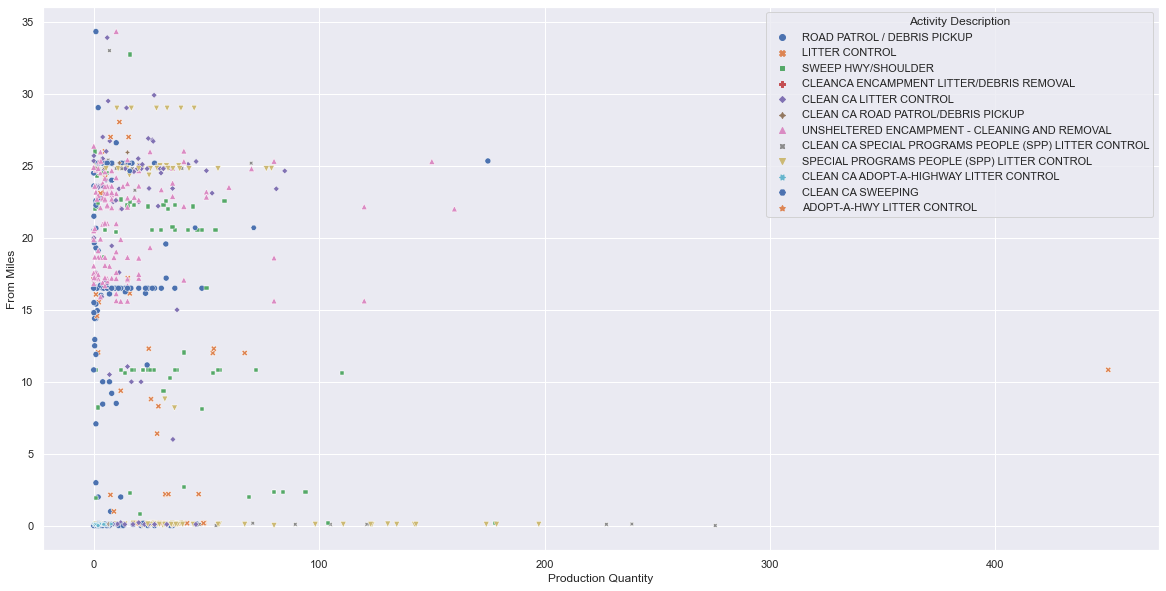

In [12]:
# 05.06.03 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_03sac005,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

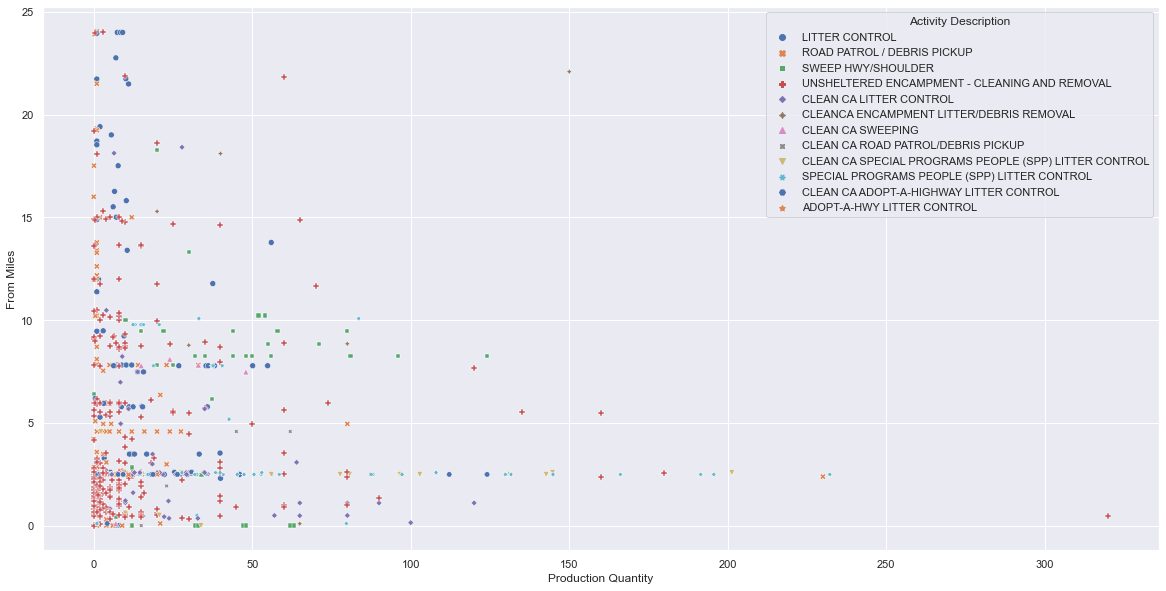

In [13]:
# 05.06.03 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_03sac050,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

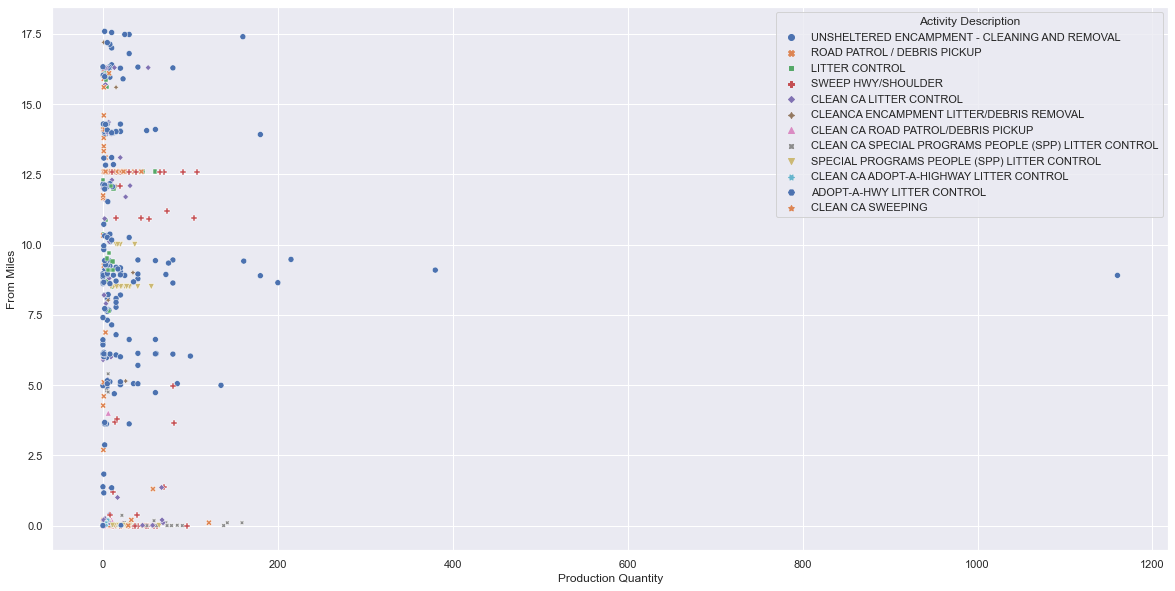

In [14]:
# 05.06.03 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_03sac080,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

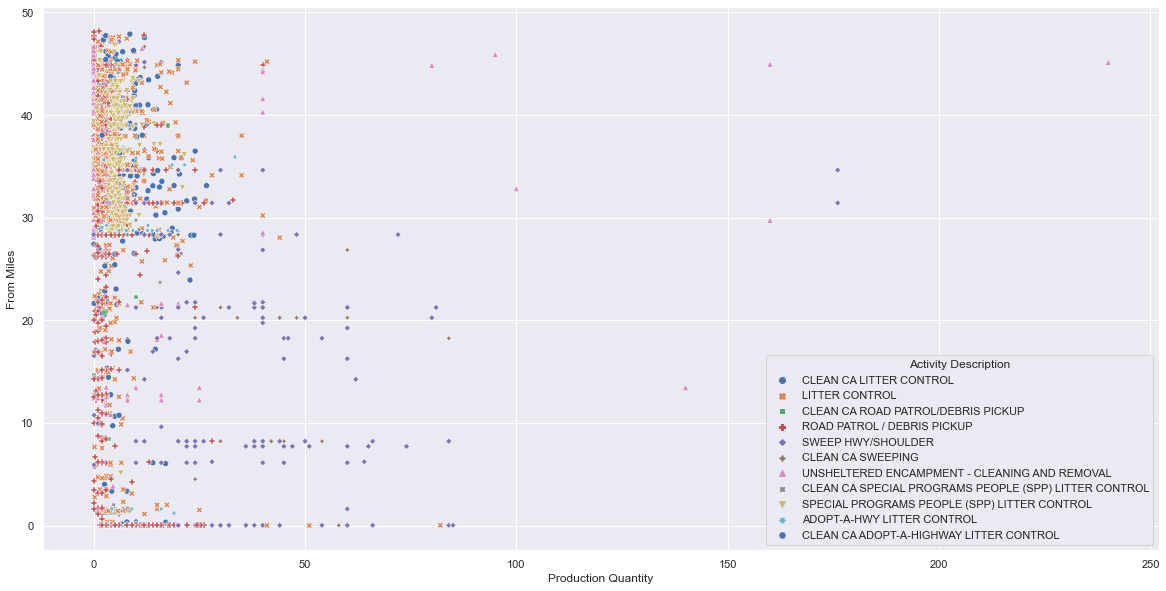

In [15]:
# 05.06.04 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_04ala580b,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

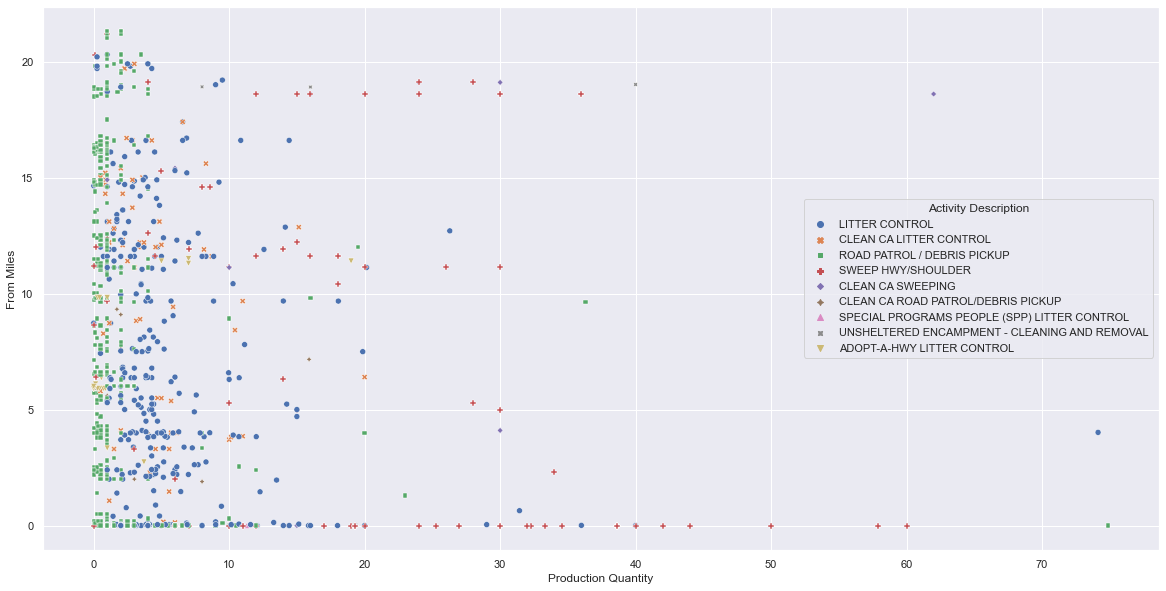

In [16]:
# 05.06.04 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_04ala680,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

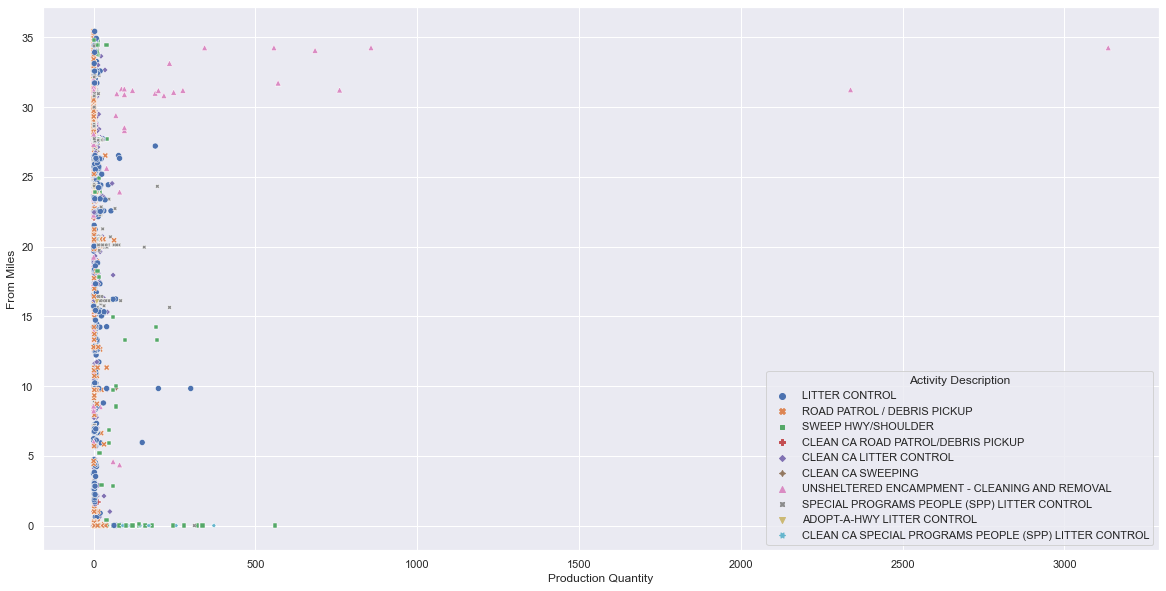

In [17]:
# 05.06.04 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_04ala880,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

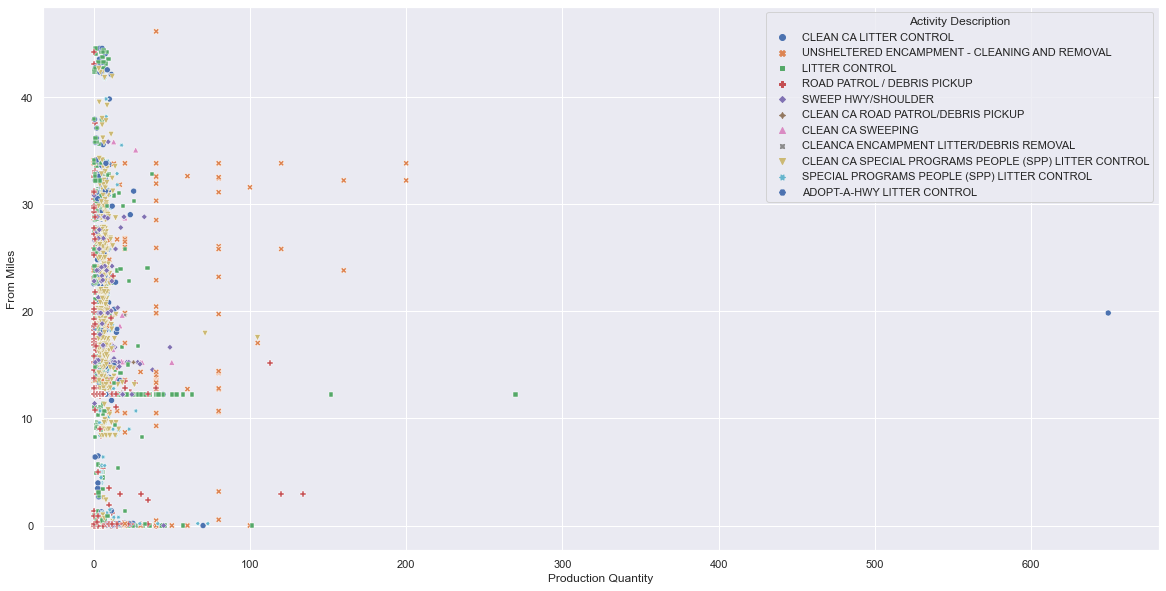

In [18]:
# 05.06.04 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_04cc004a,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

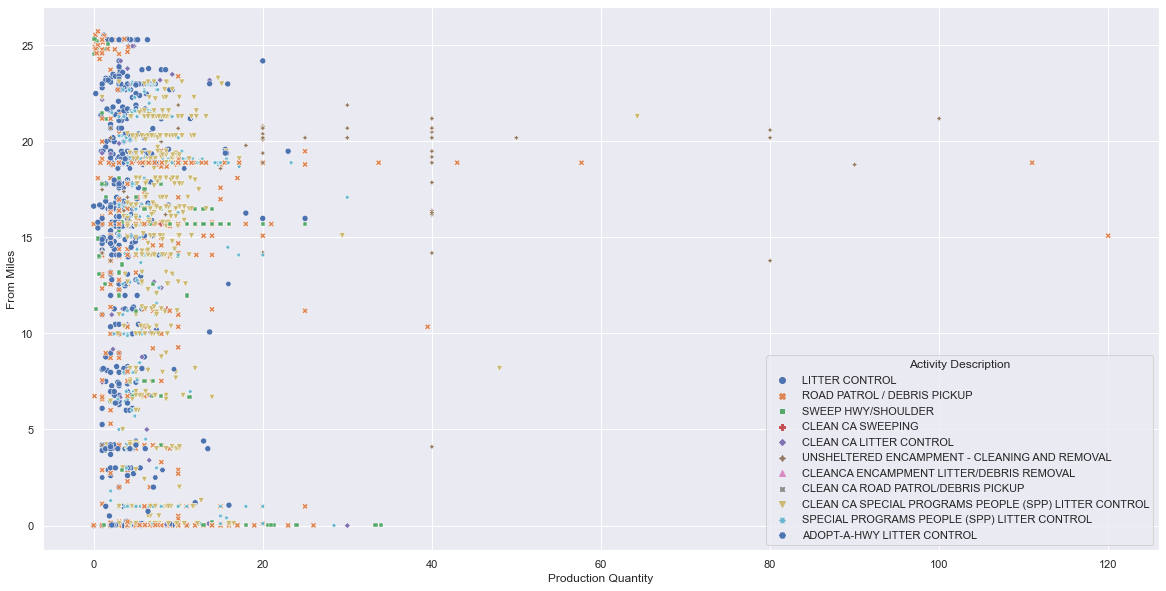

In [19]:
# 05.06.04 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_04cc680,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

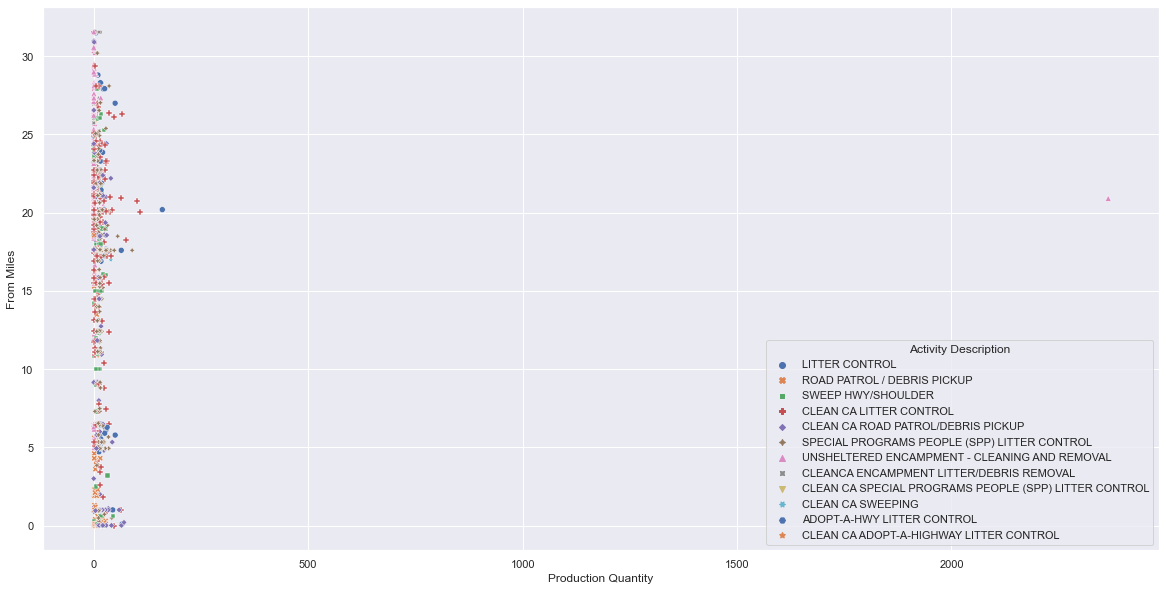

In [20]:
# 05.06.06 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_06fre099,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

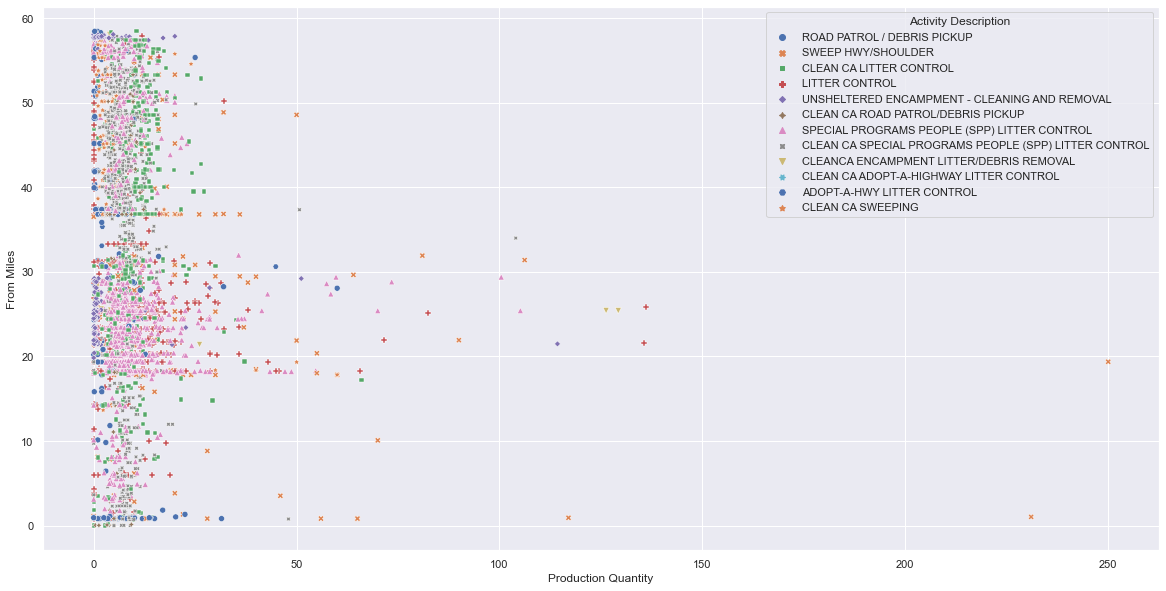

In [21]:
# 05.06.06 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_06ker099,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

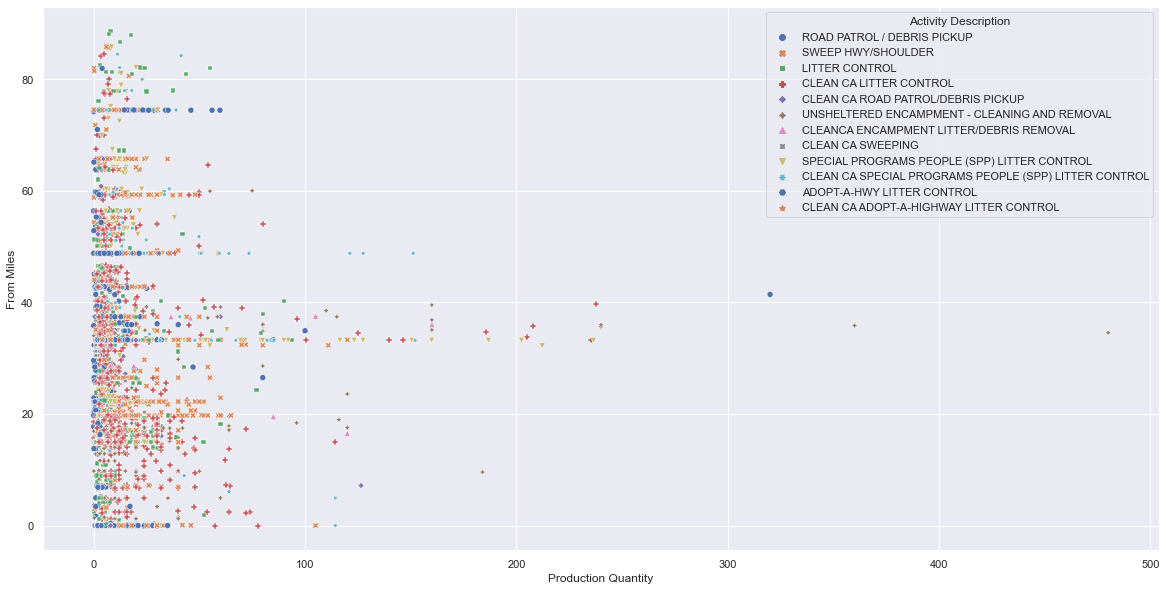

In [22]:
# 05.06.07 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_07la005a,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

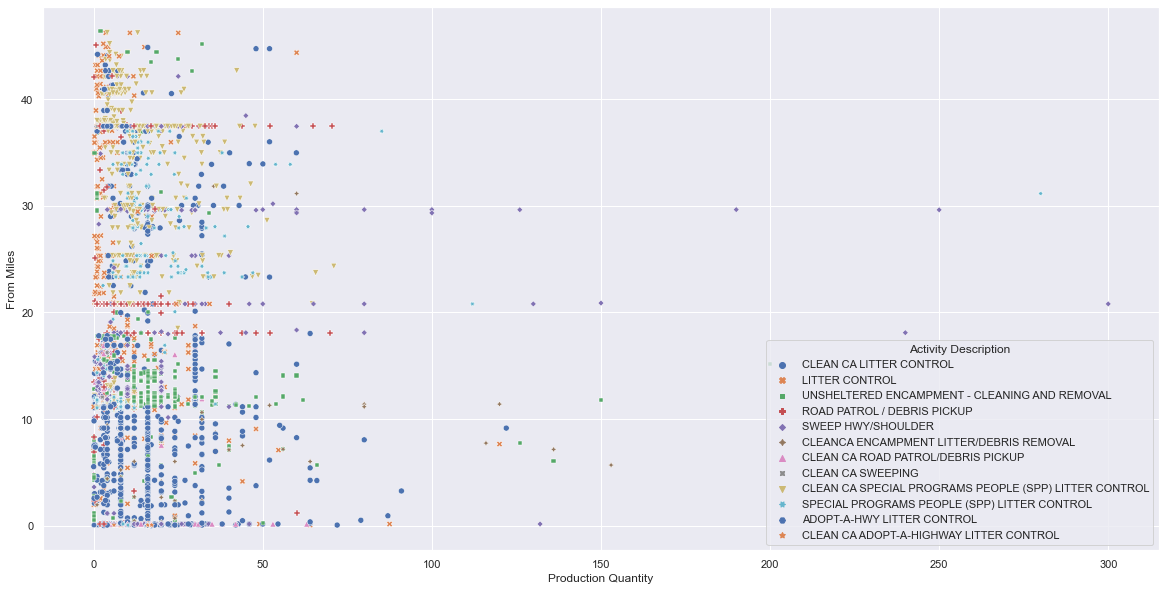

In [23]:
# 05.06.07 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_07la010,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

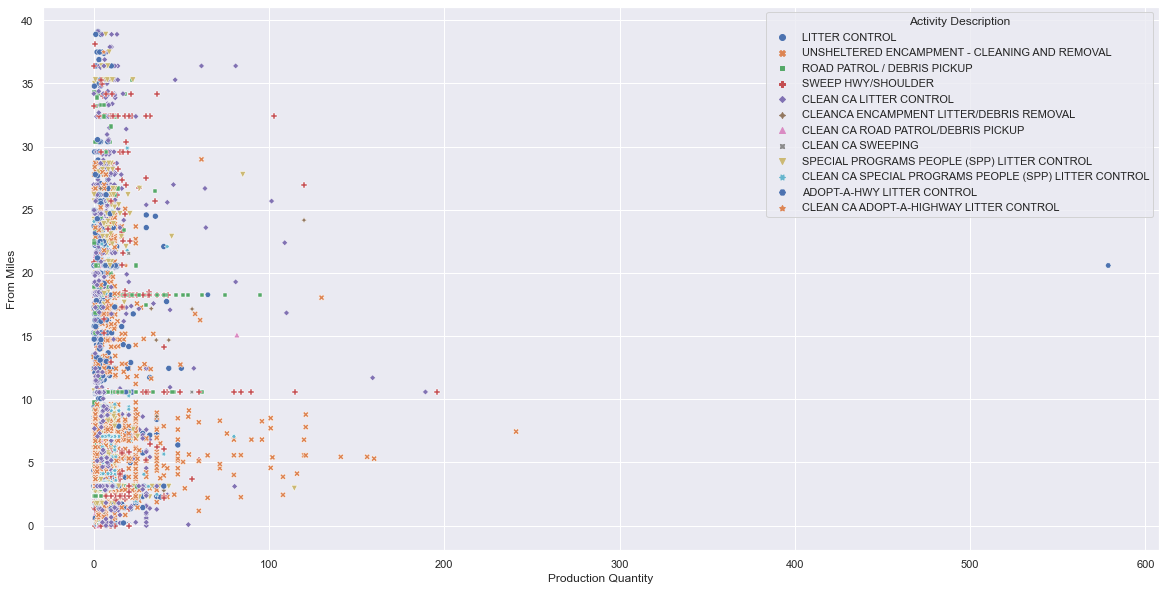

In [24]:
# 05.06.07 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_07la101,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

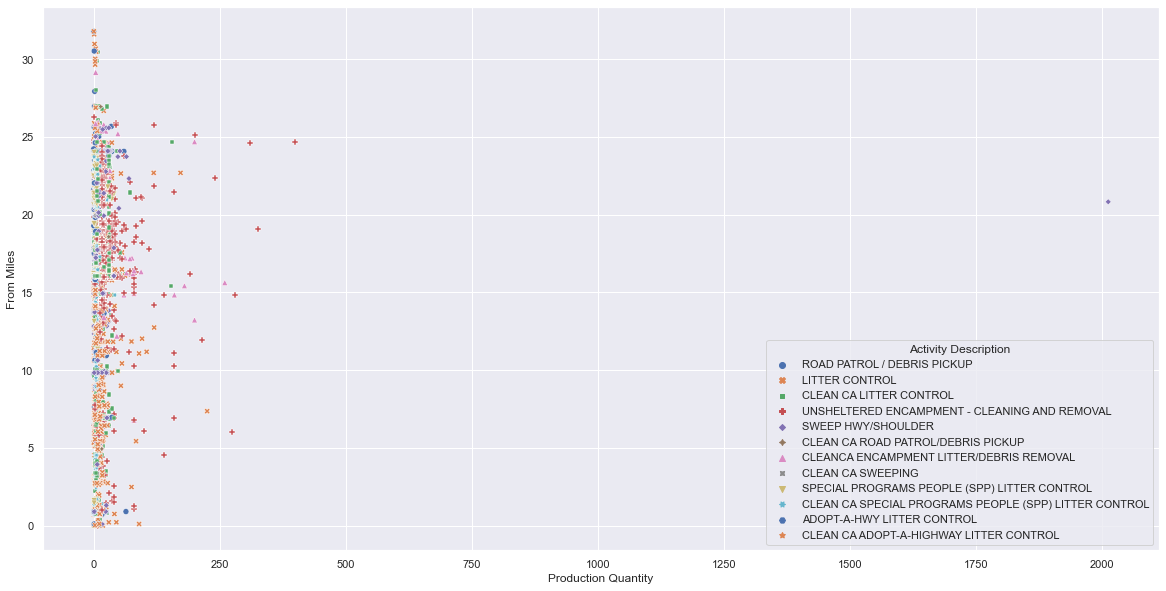

In [25]:
# 05.06.07 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_07la110,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

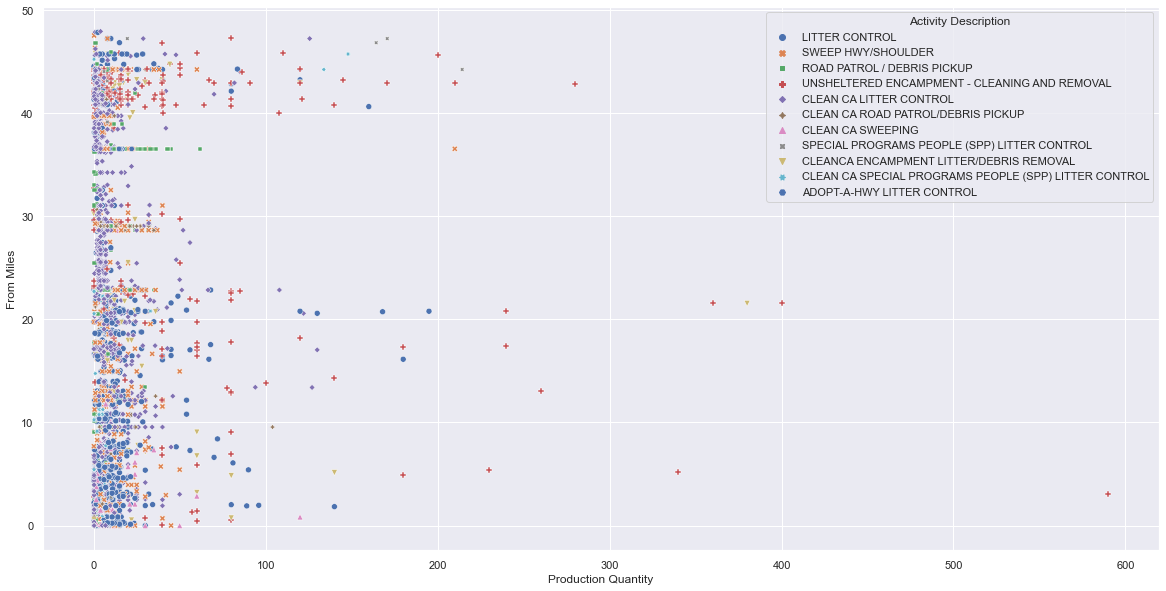

In [26]:
# 05.06.07 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_07la405,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

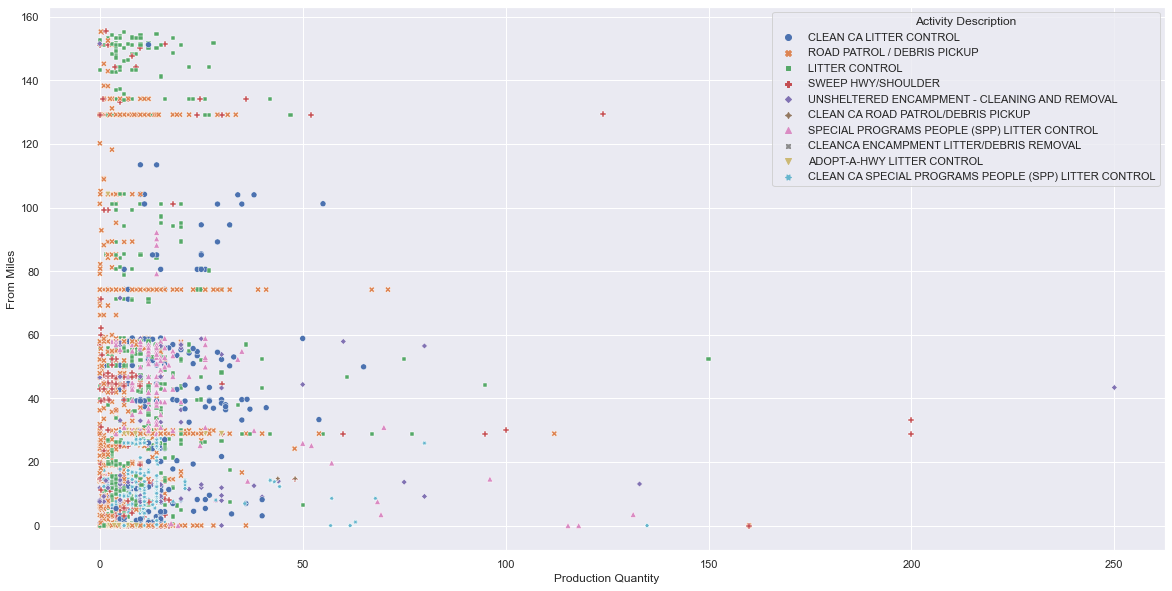

In [27]:
# 05.06.08 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_08riv010,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

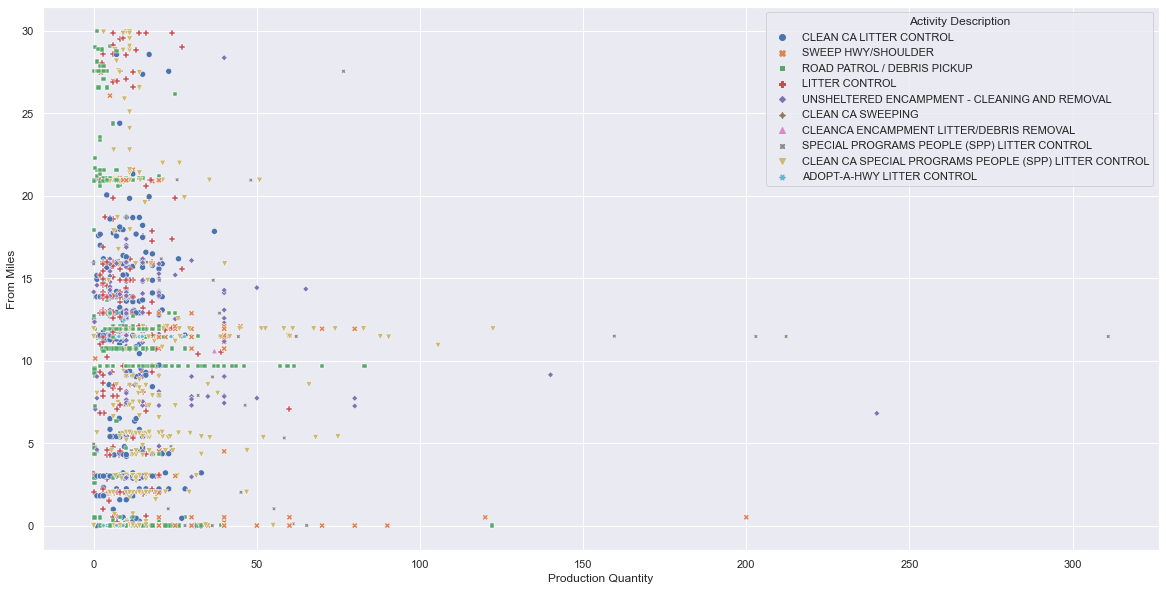

In [28]:
# 05.06.08 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_08riv060,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

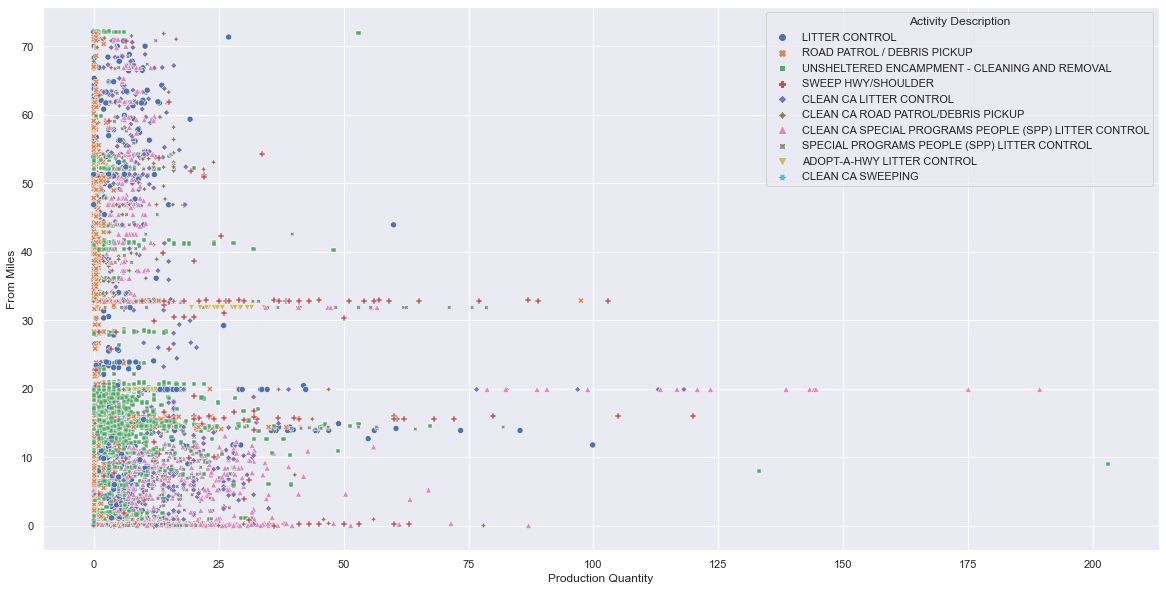

In [29]:
# 05.06.11 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_11sd005,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='Production Quantity', ylabel='From Miles'>

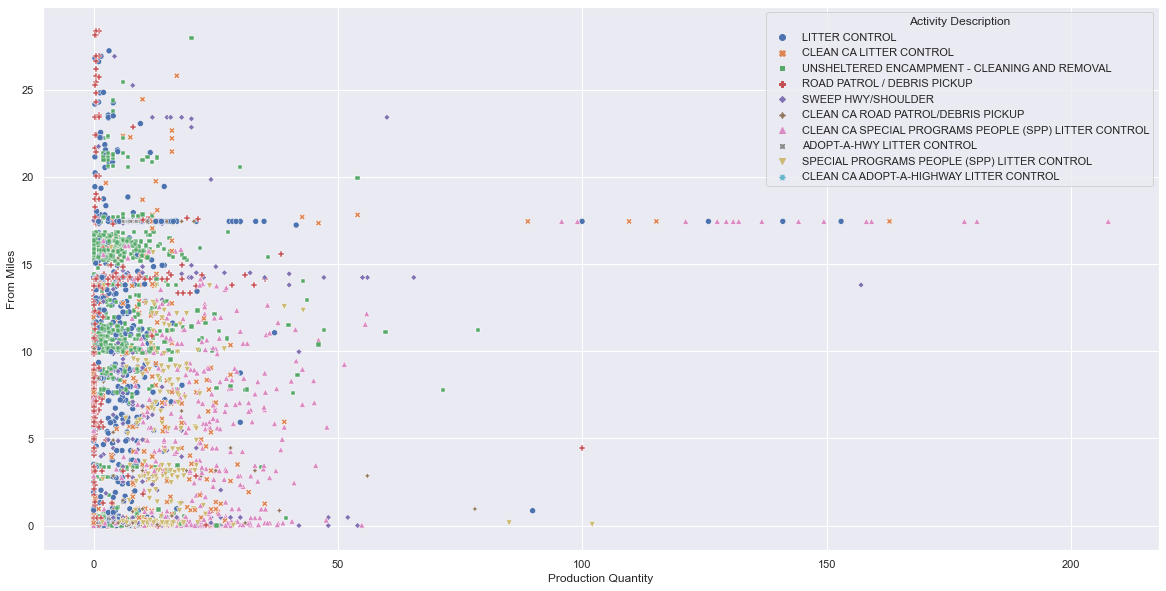

In [30]:
# 05.06.11 - plot corridor litter totals by postmile

# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(
    data=df_imms_hotspot_11sd805,
    x='Production Quantity',
    y='From Miles',
    hue='Activity Description',
    style='Activity Description',
    palette='deep'
)

<AxesSubplot:xlabel='IMMS Unit ID'>

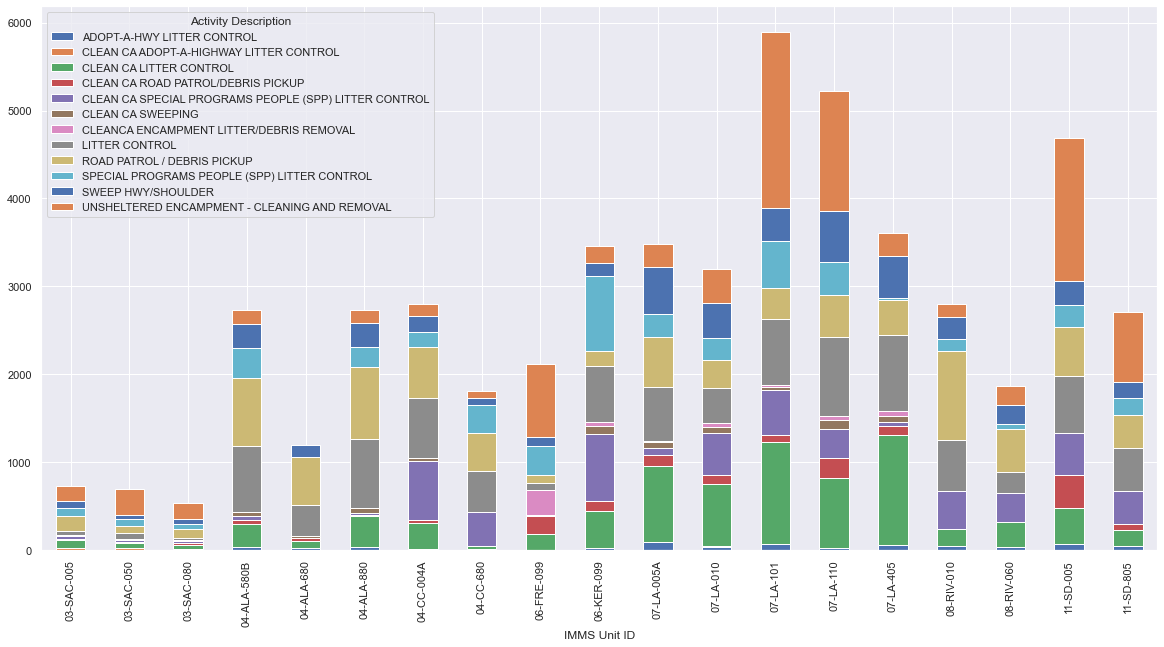

In [31]:
# 05.07.01 - plot work activty counts by hotspot corridors

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_hotspot_all_activity_count.plot.bar(stacked=True)


<AxesSubplot:xlabel='IMMS Unit ID'>

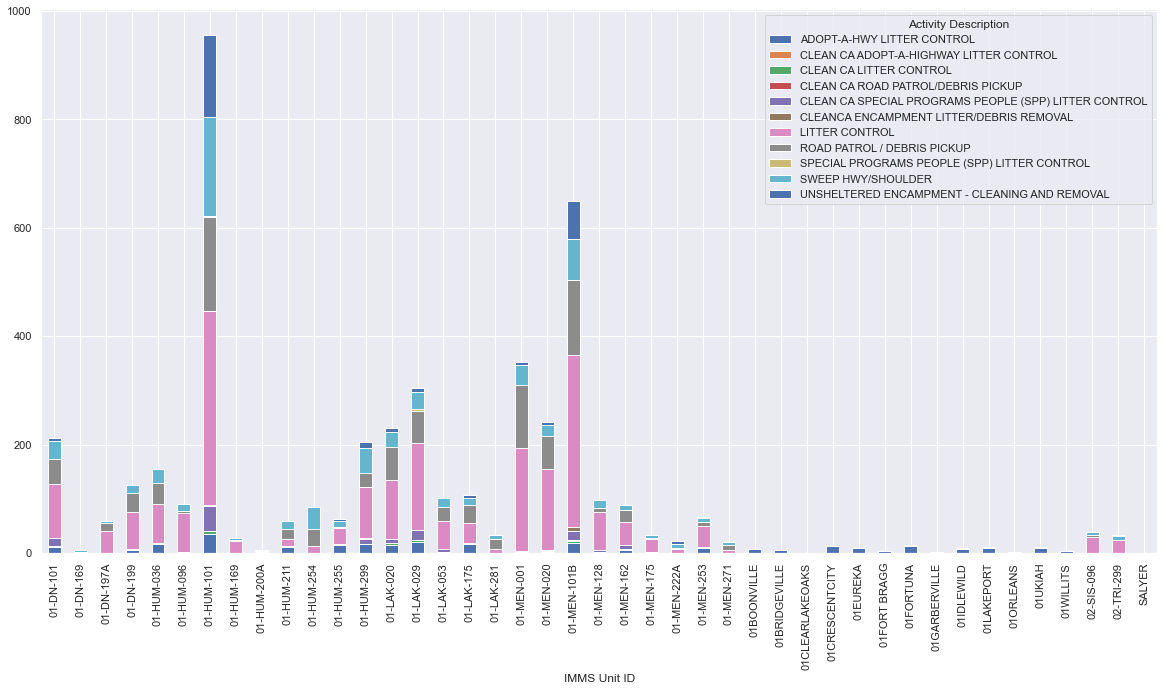

In [32]:
# 05.07.01 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d1.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

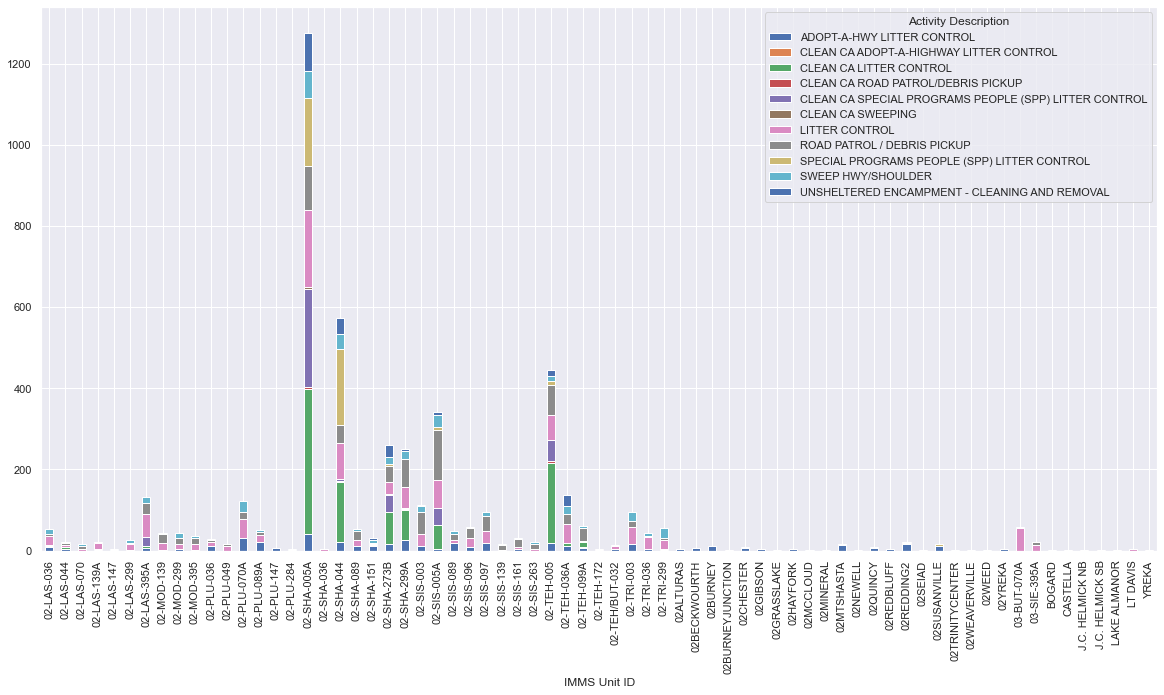

In [33]:
# 05.07.02 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d2.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

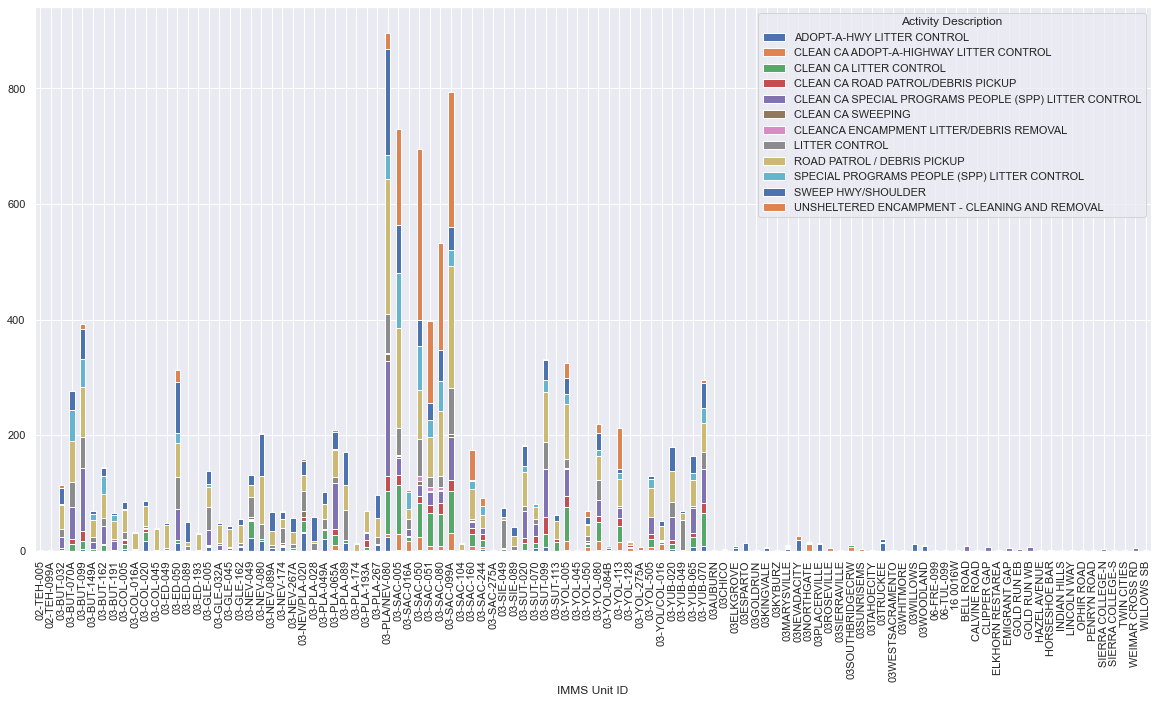

In [34]:
# 05.07.03 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d3.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

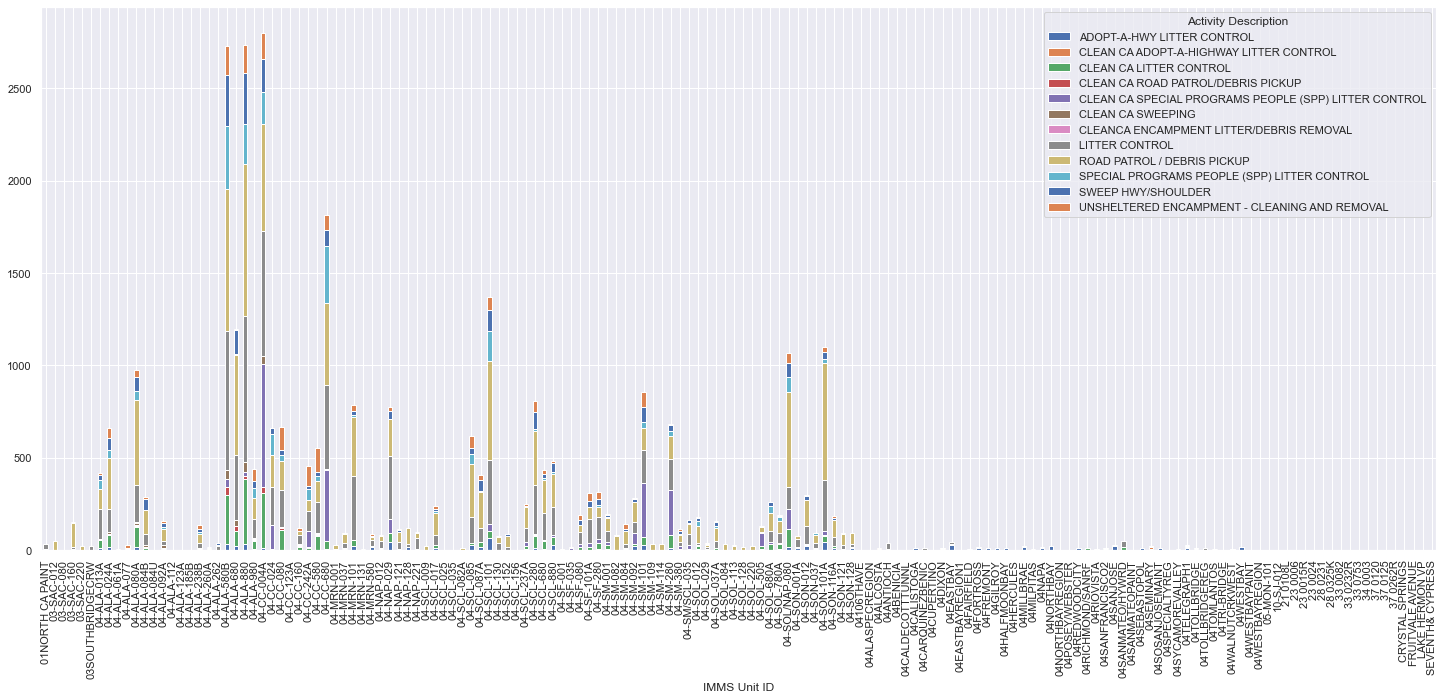

In [35]:
# 05.07.04 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(25,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d4.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

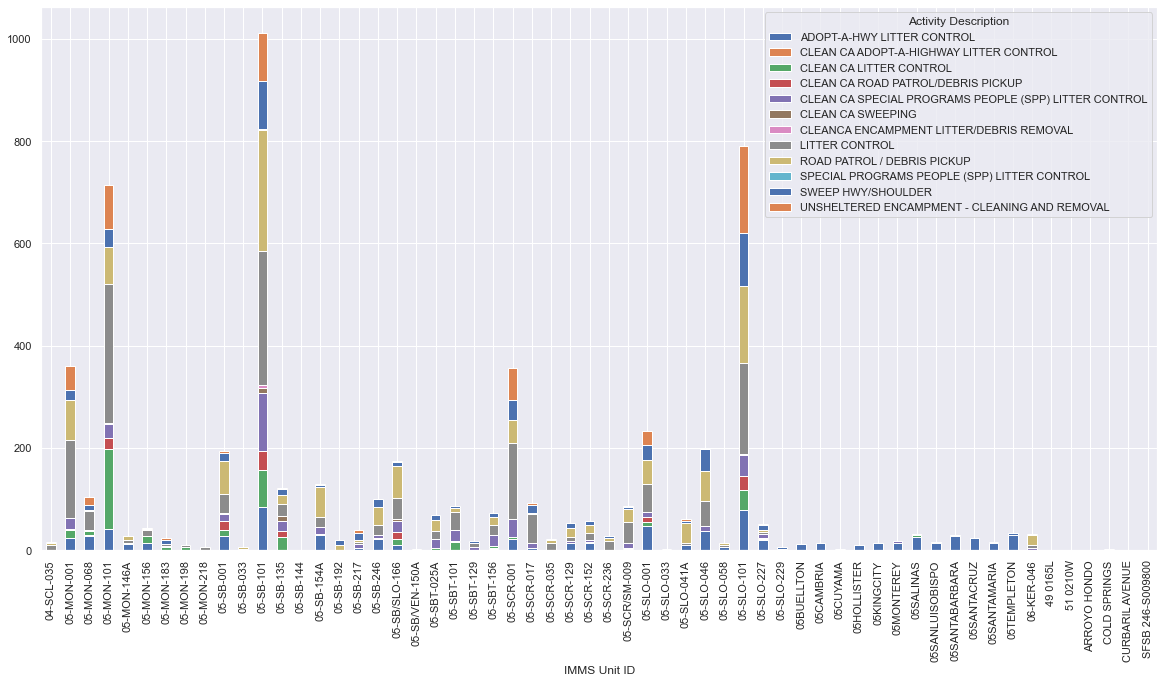

In [36]:
# 05.07.05 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d5.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

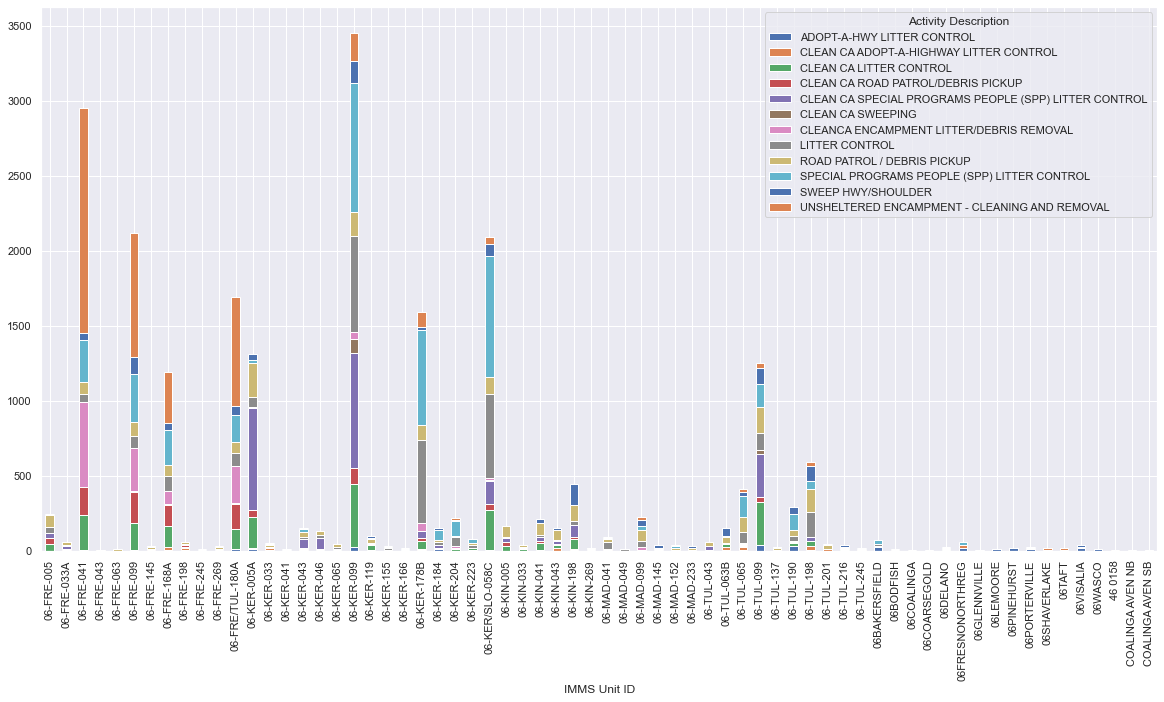

In [37]:
# 05.07.06 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d6.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

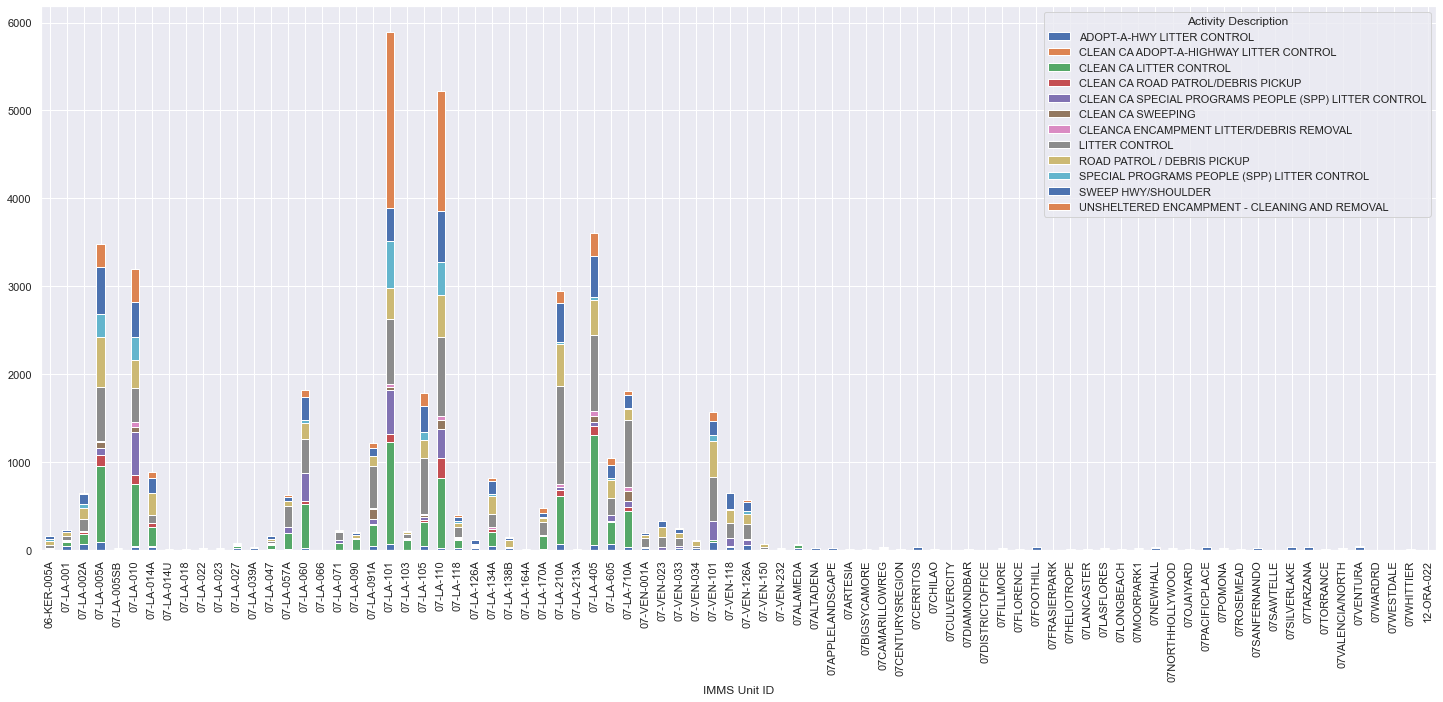

In [38]:
# 05.07.07 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(25,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d7.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

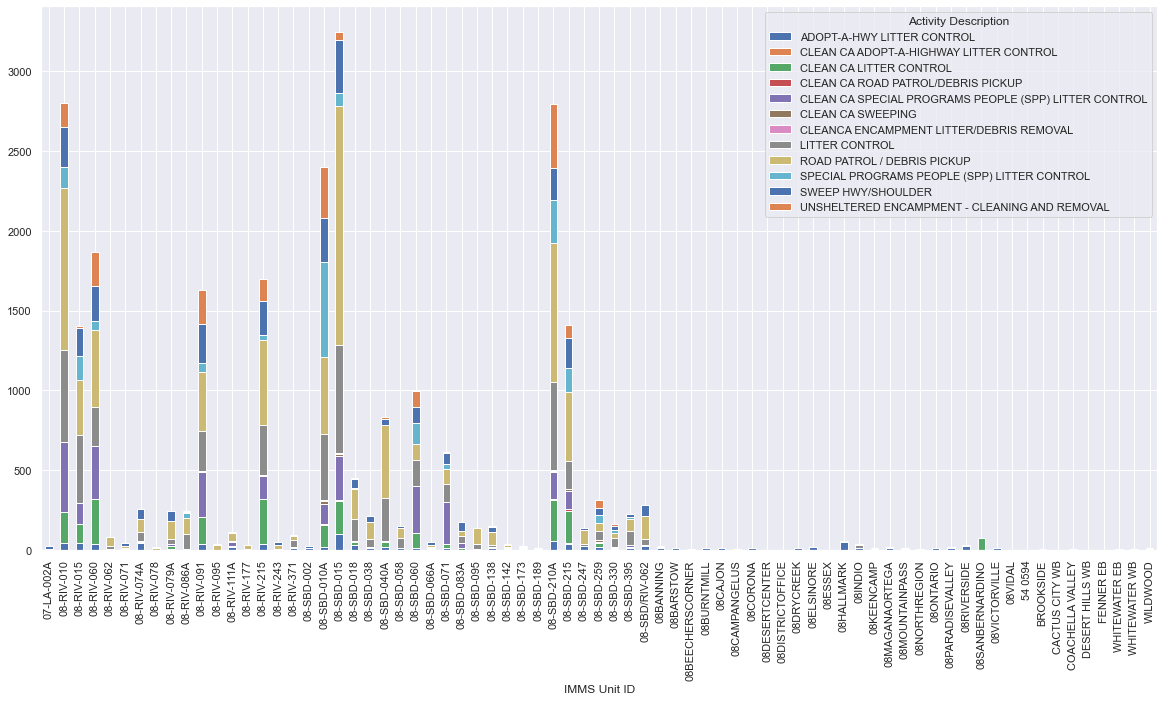

In [39]:
# 05.07.08 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d8.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

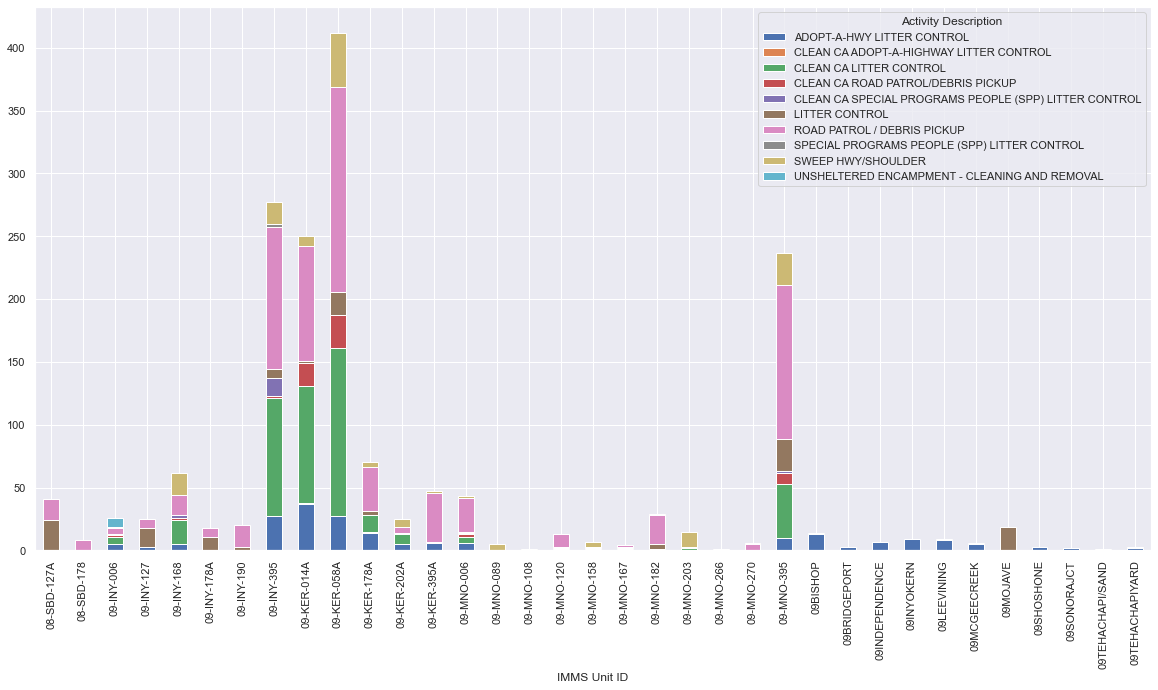

In [40]:
# 05.07.09 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d9.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

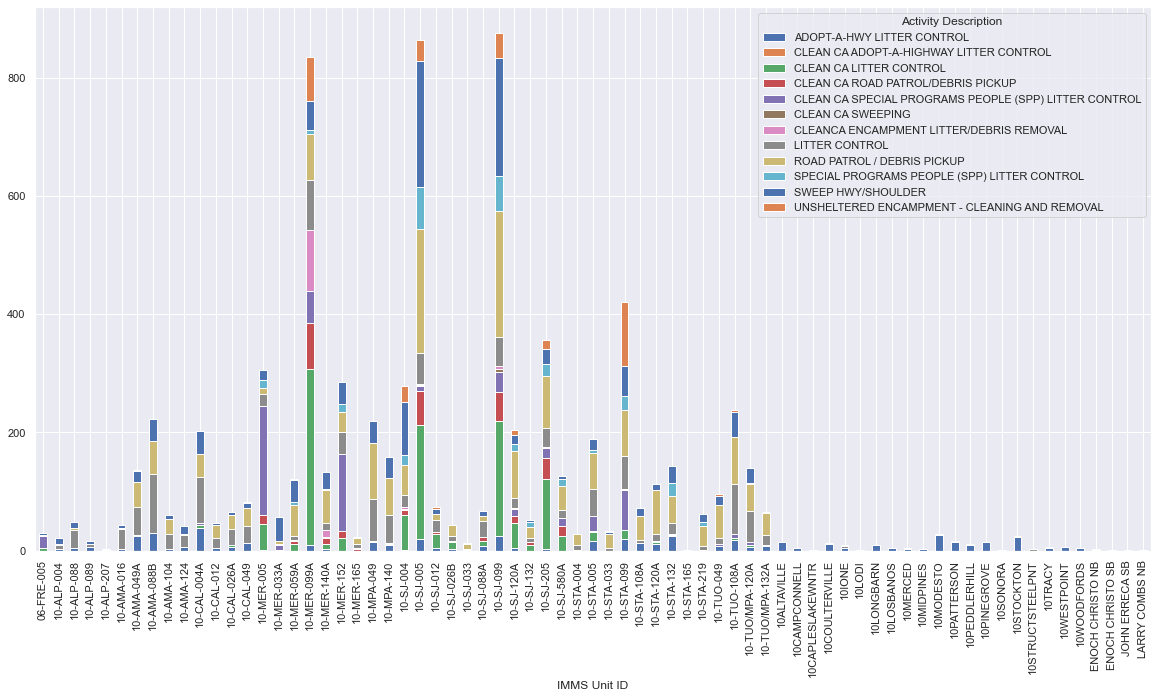

In [41]:
# 05.07.10 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d10.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

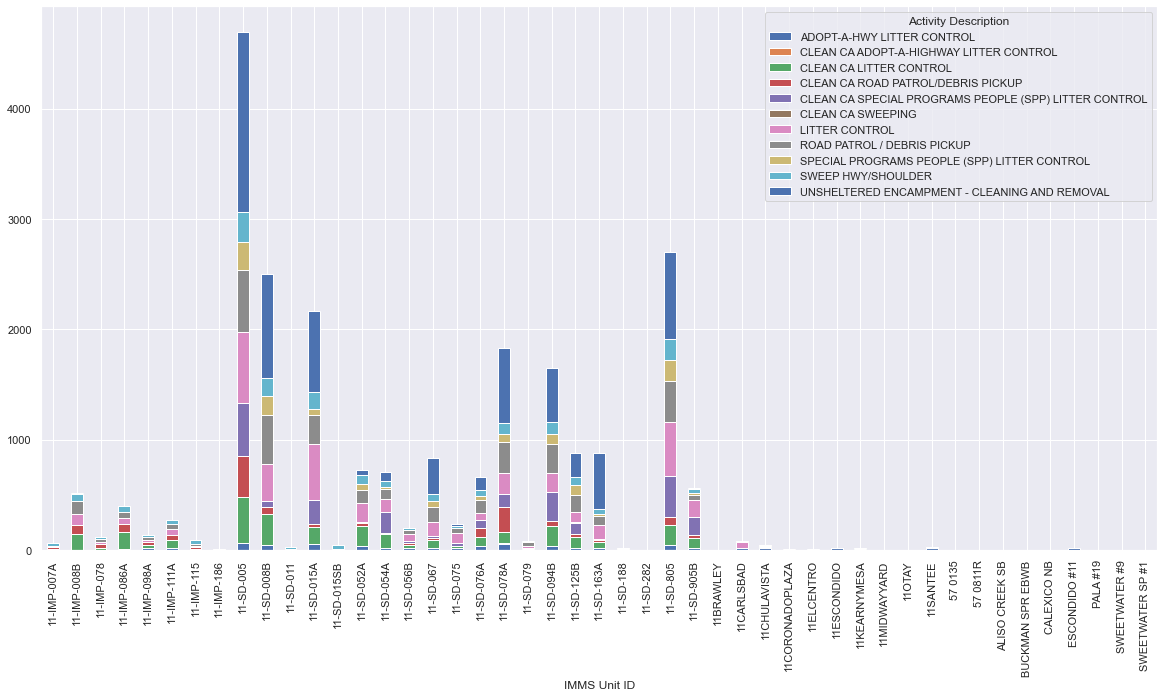

In [42]:
# 05.07.11 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d11.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

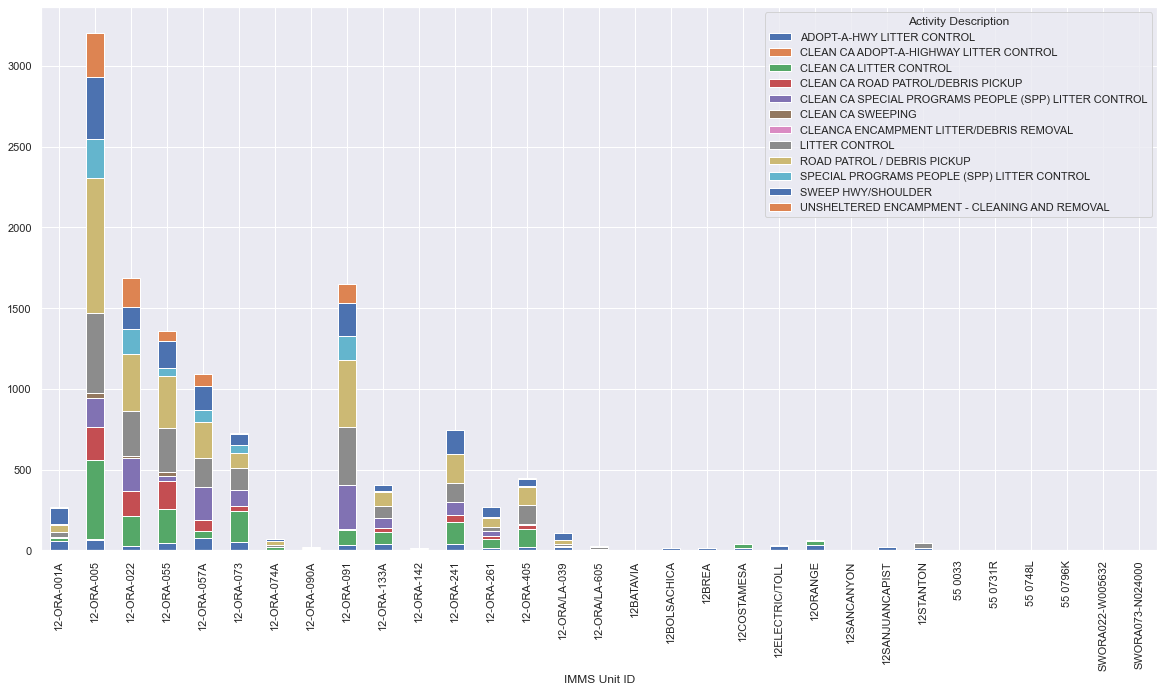

In [43]:
# 05.07.12 - plot work activity counts by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_count_d12.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

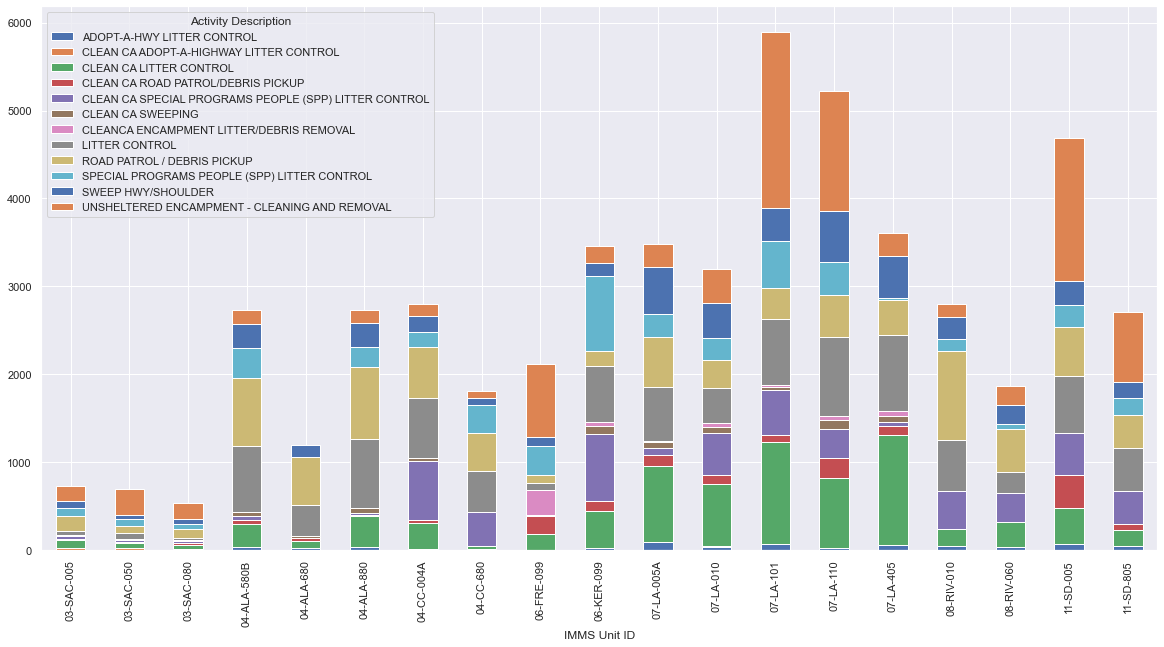

In [44]:
# 05.07.13 - plot work activity counts by litter hotspot

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_hotspot_all_activity_count.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

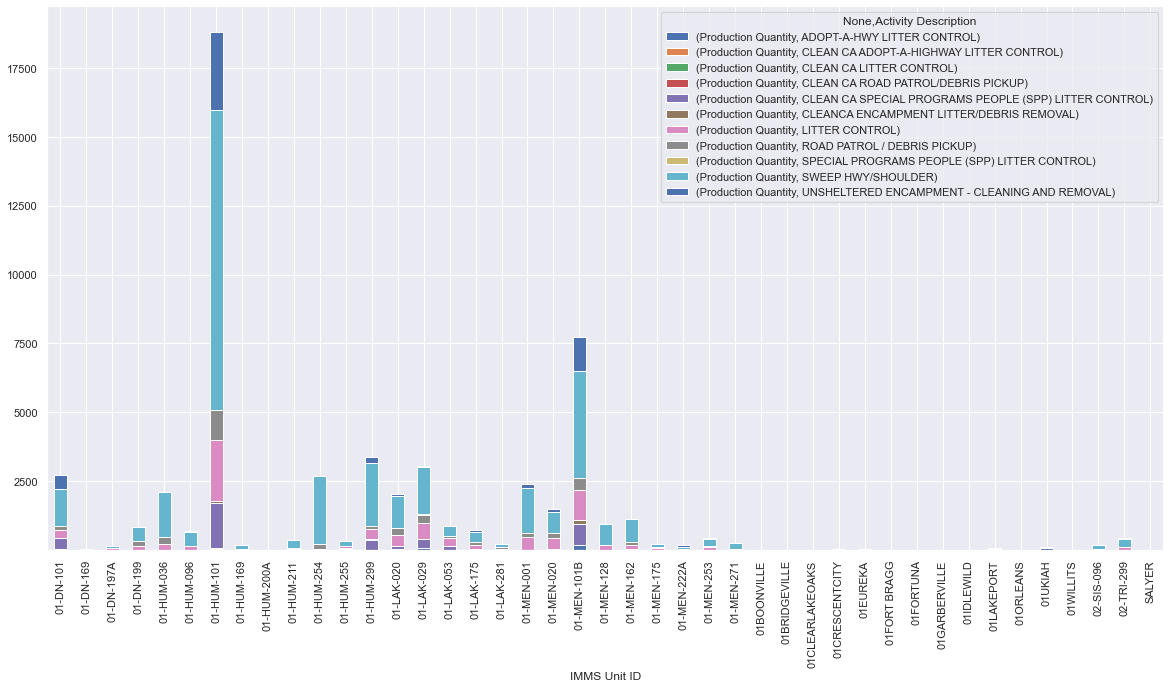

In [45]:
# 05.08.01 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d1.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

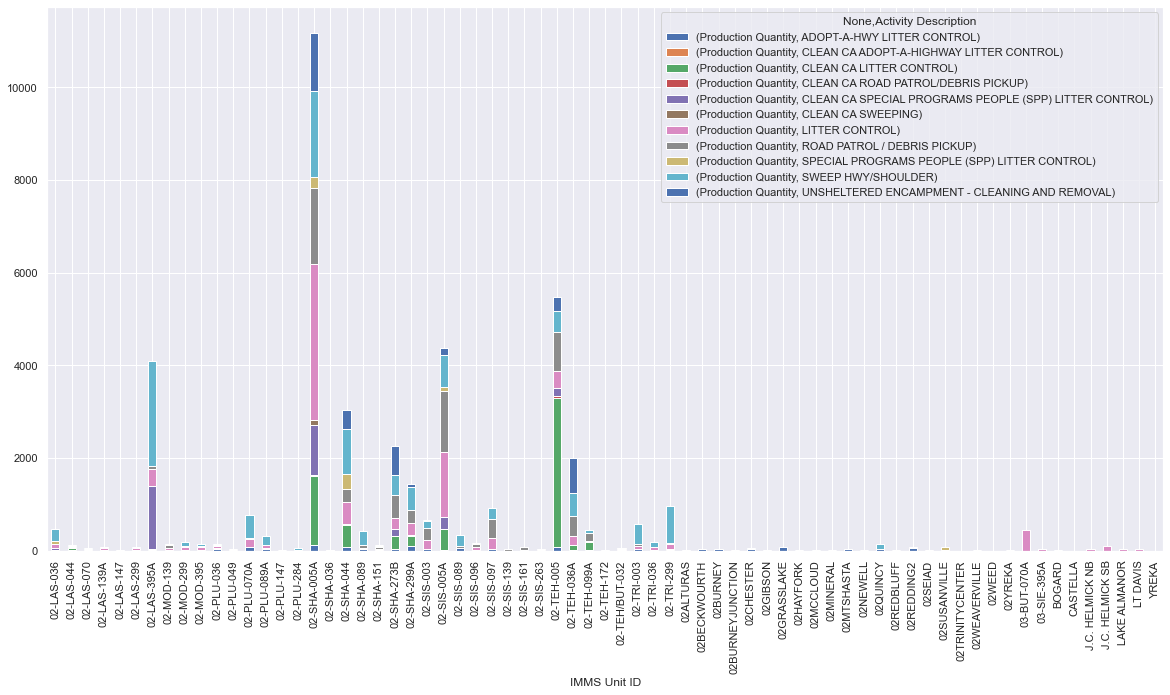

In [46]:
# 05.08.02 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d2.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

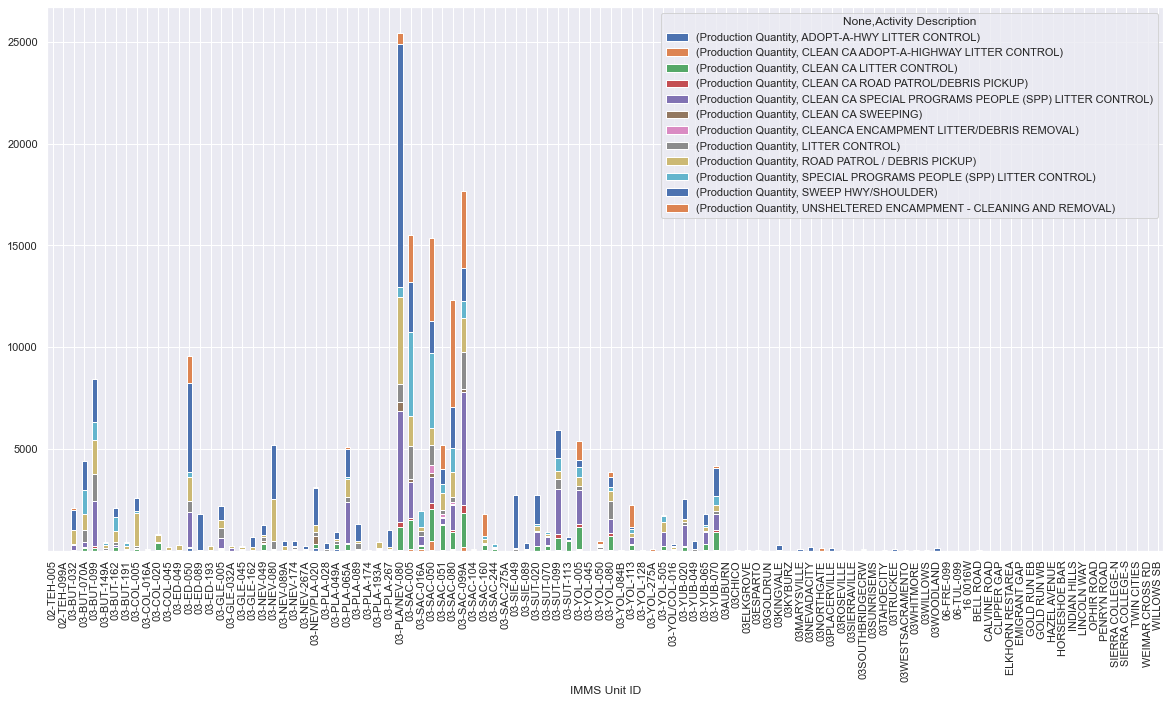

In [47]:
# 05.08.03 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d3.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

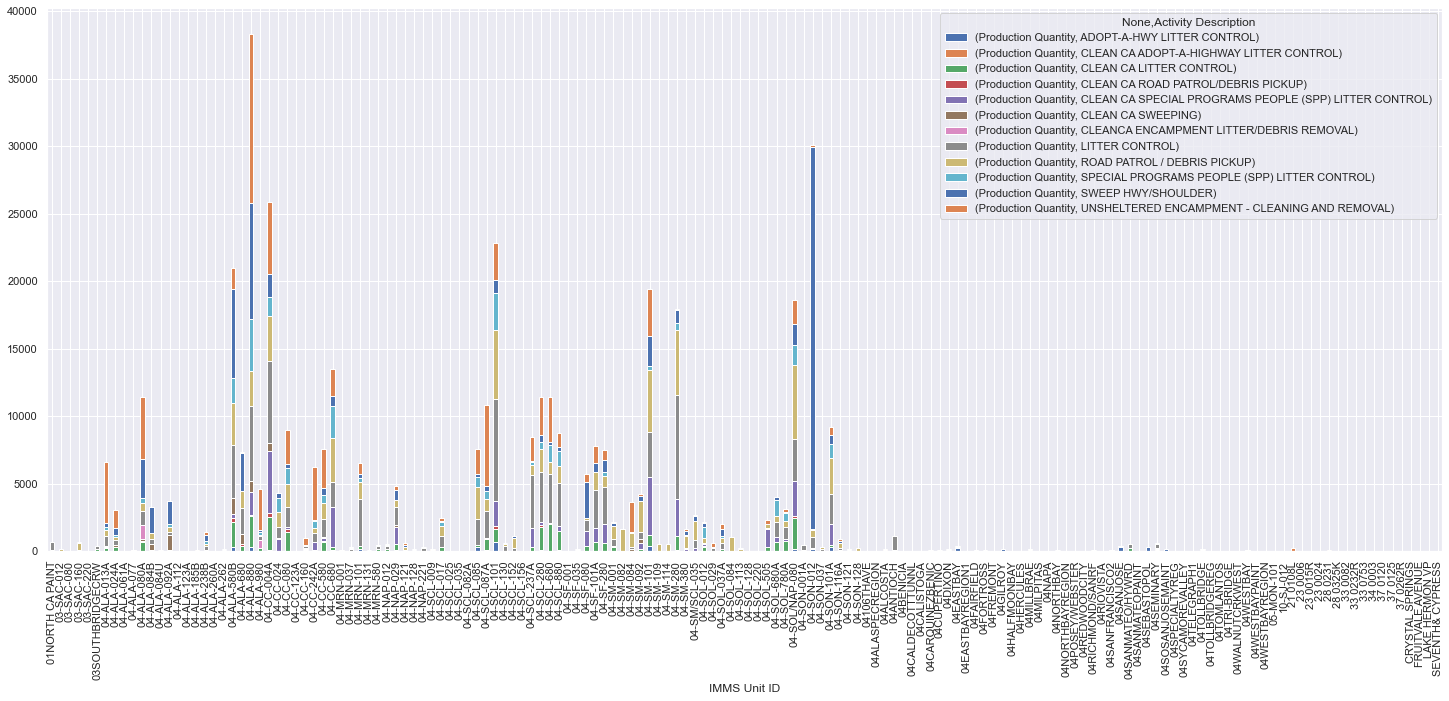

In [48]:
# 05.08.04 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(25,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d4.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

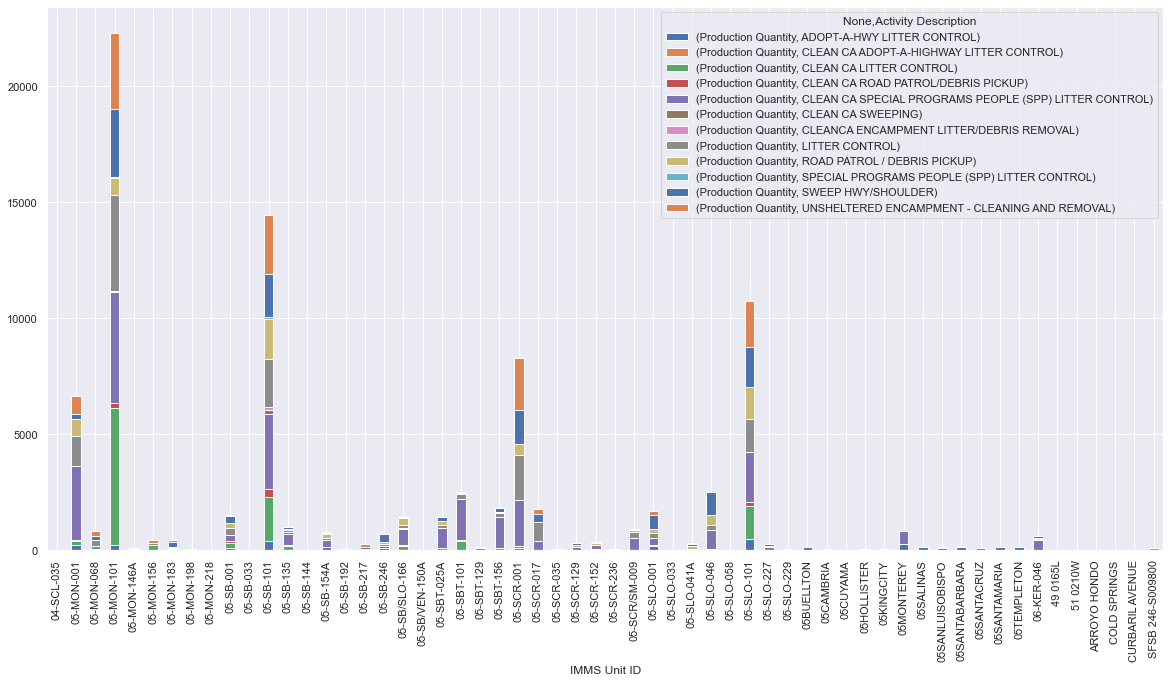

In [49]:
# 05.08.05 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d5.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

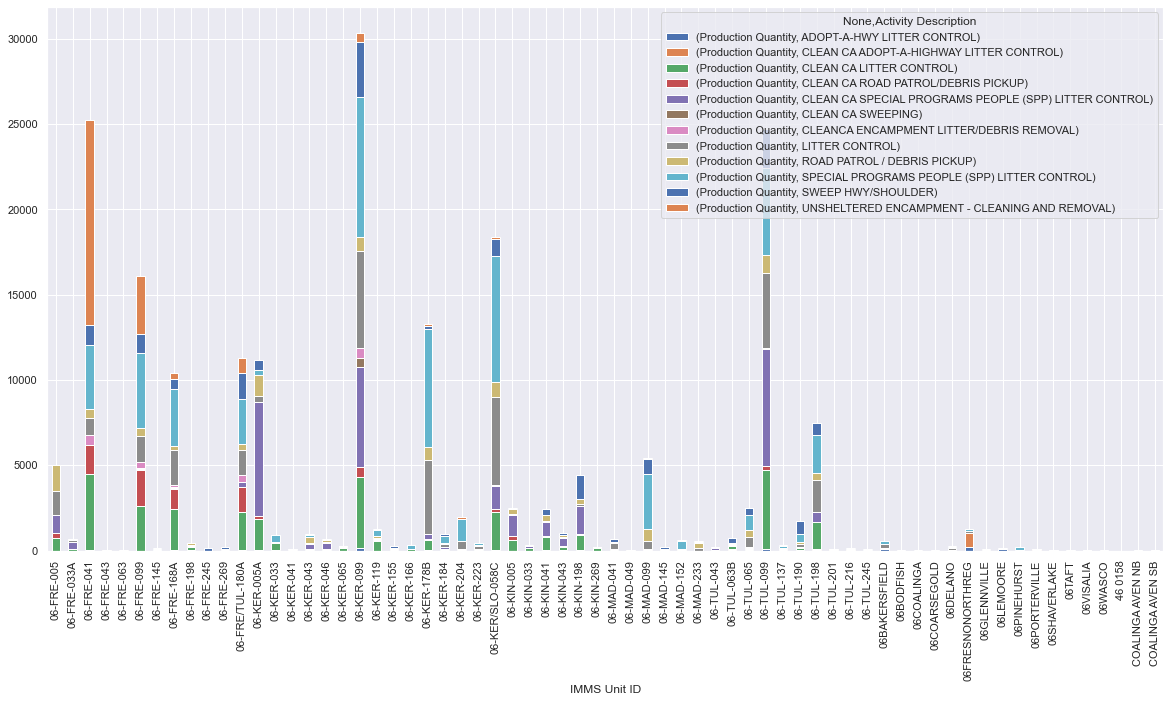

In [50]:
# 05.08.06 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d6.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

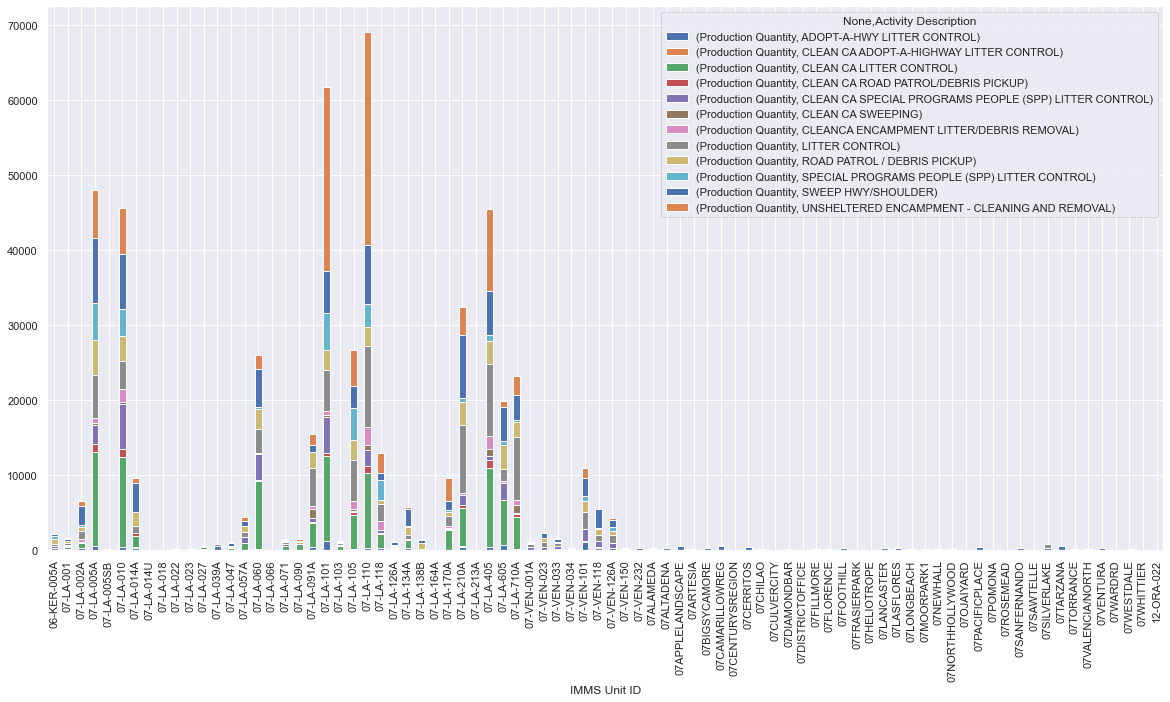

In [51]:
# 05.08.07 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d7.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

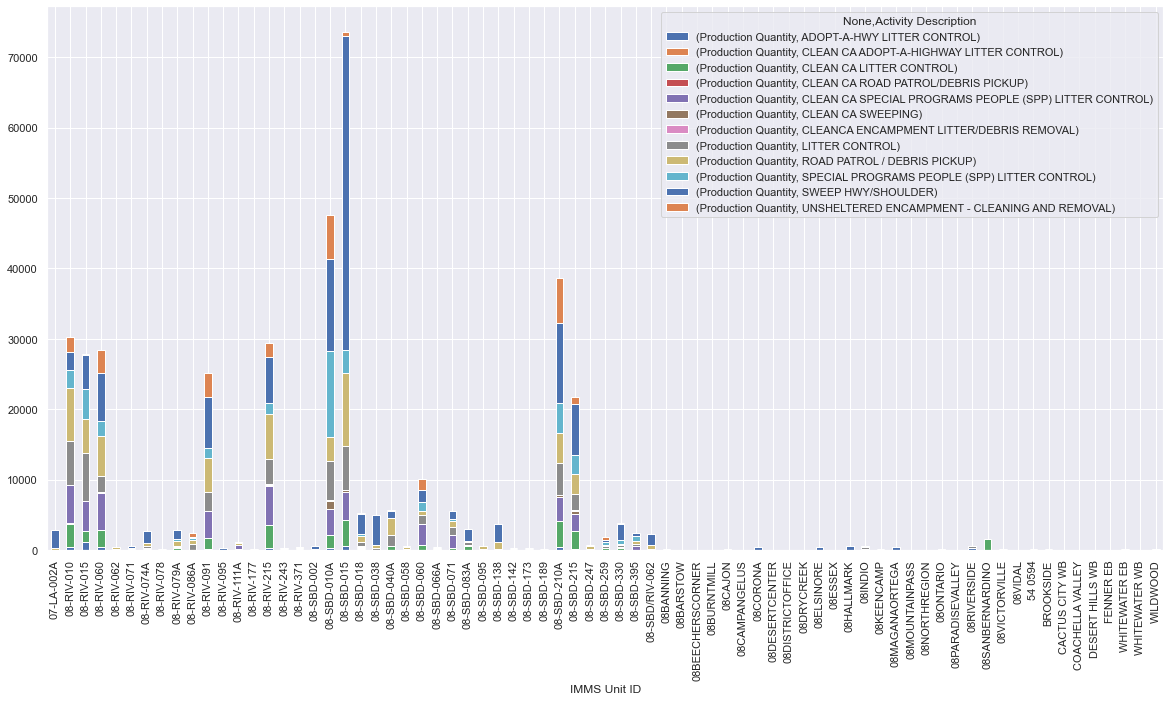

In [52]:
# 05.08.08 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d8.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

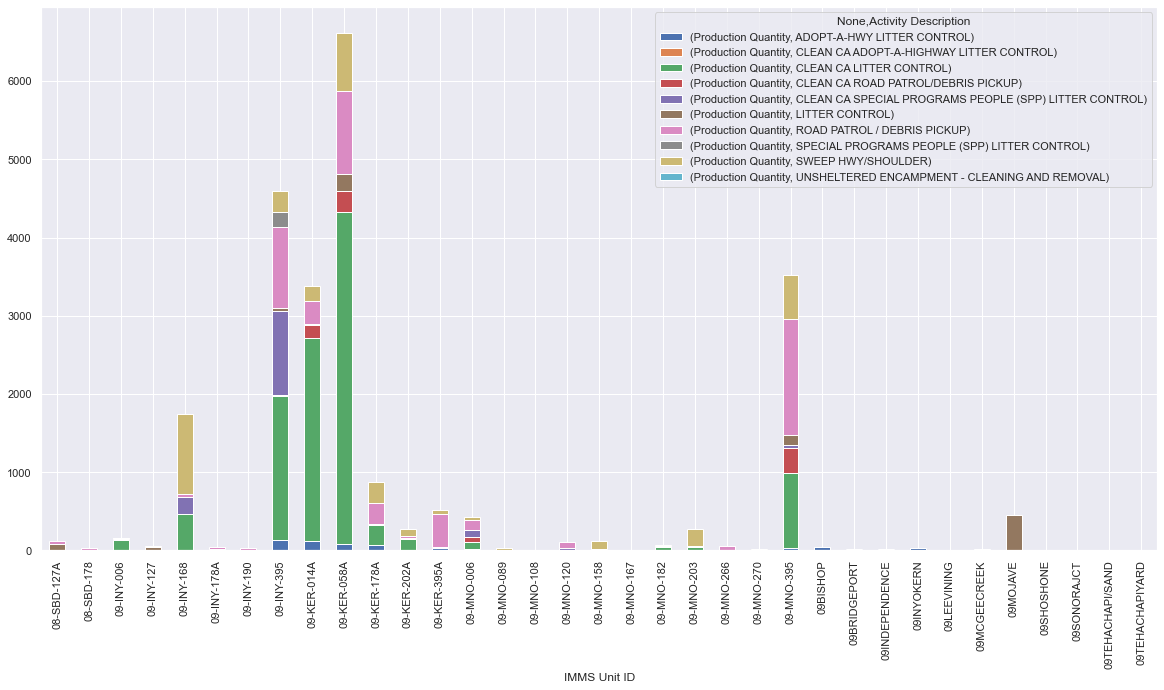

In [53]:
# 05.08.09 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d9.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

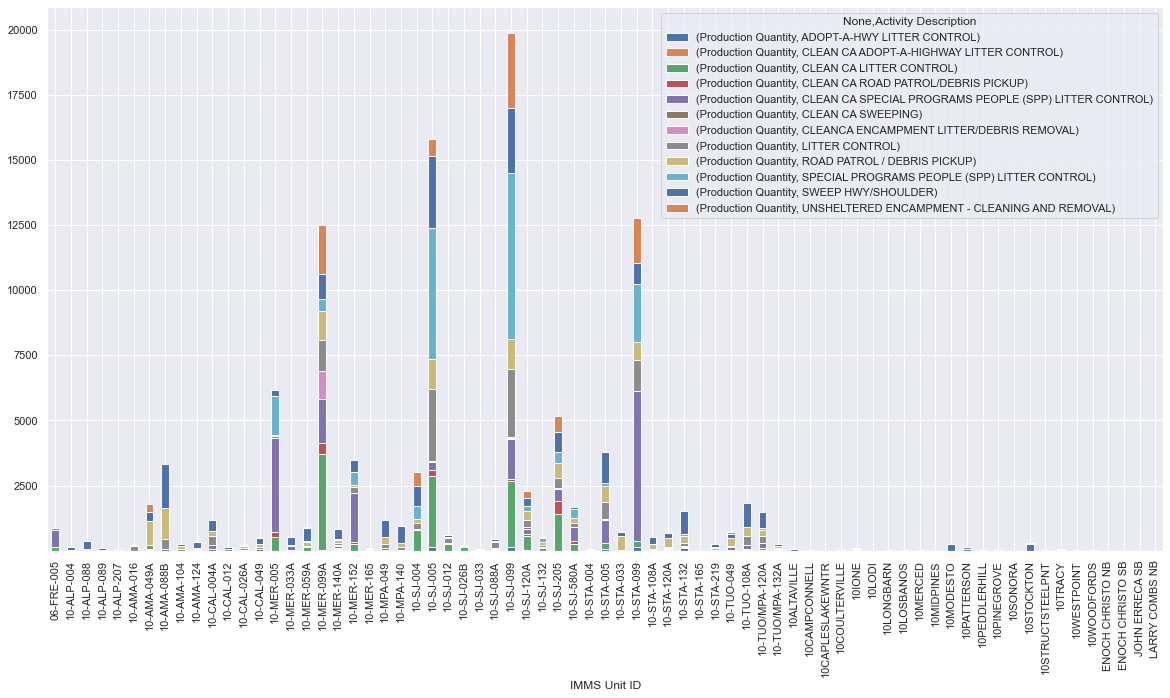

In [54]:
# 05.08.10 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d10.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

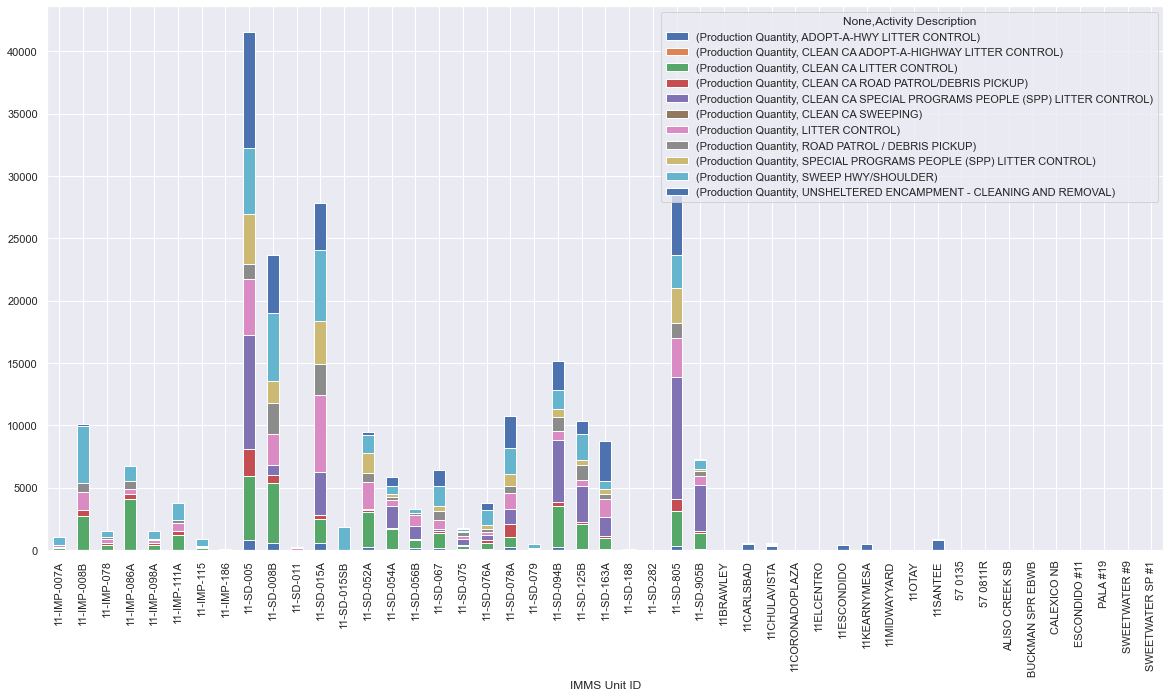

In [55]:
# 05.08.11 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d11.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

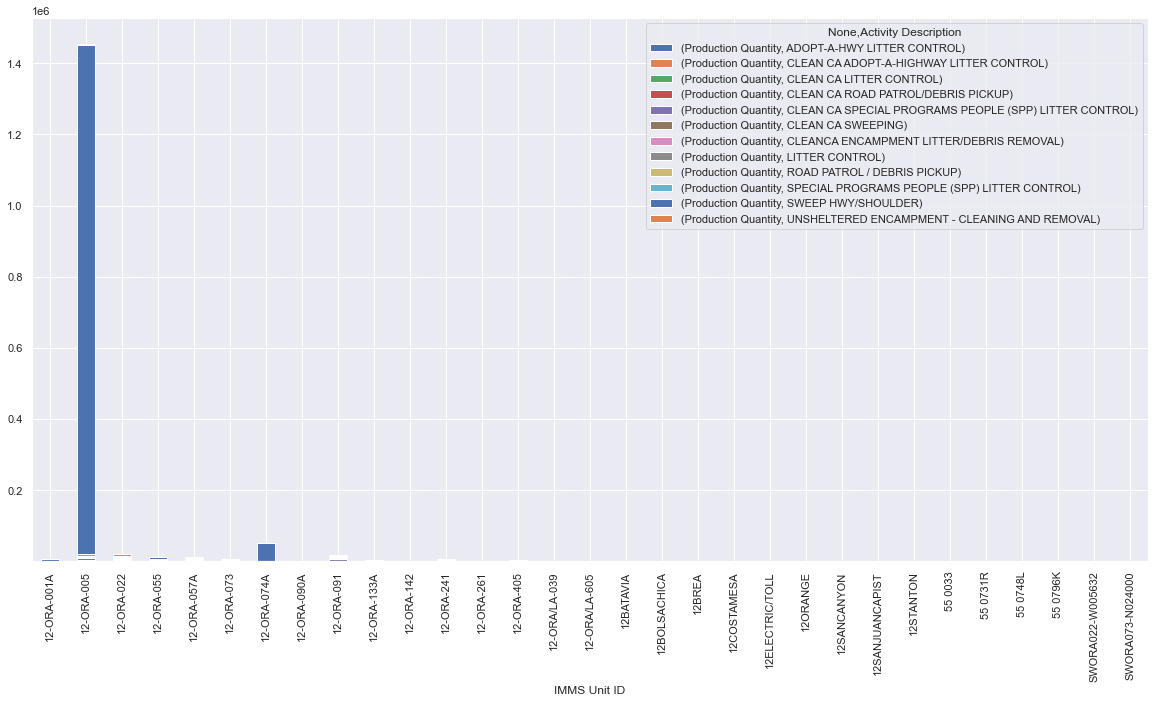

In [56]:
# 05.08.12 - plot work activity totals by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_sum_d12.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

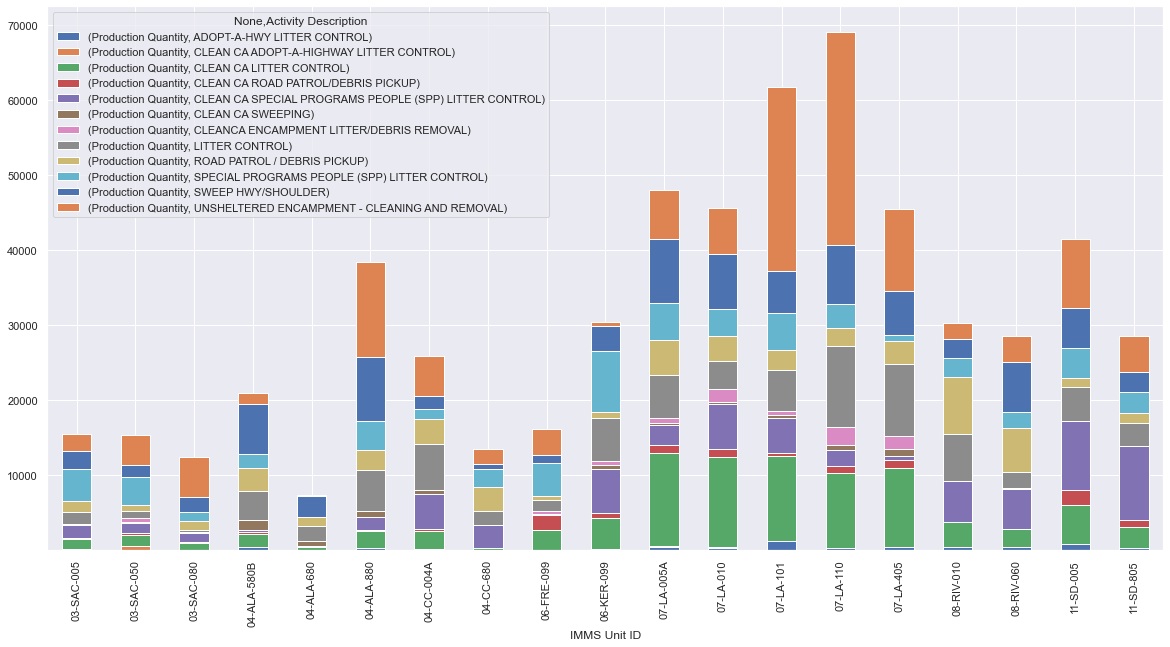

In [57]:
# 05.08.13 - plot work activity totals by hotspot corridors

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity sum
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_hotspot_all_activity_sum.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

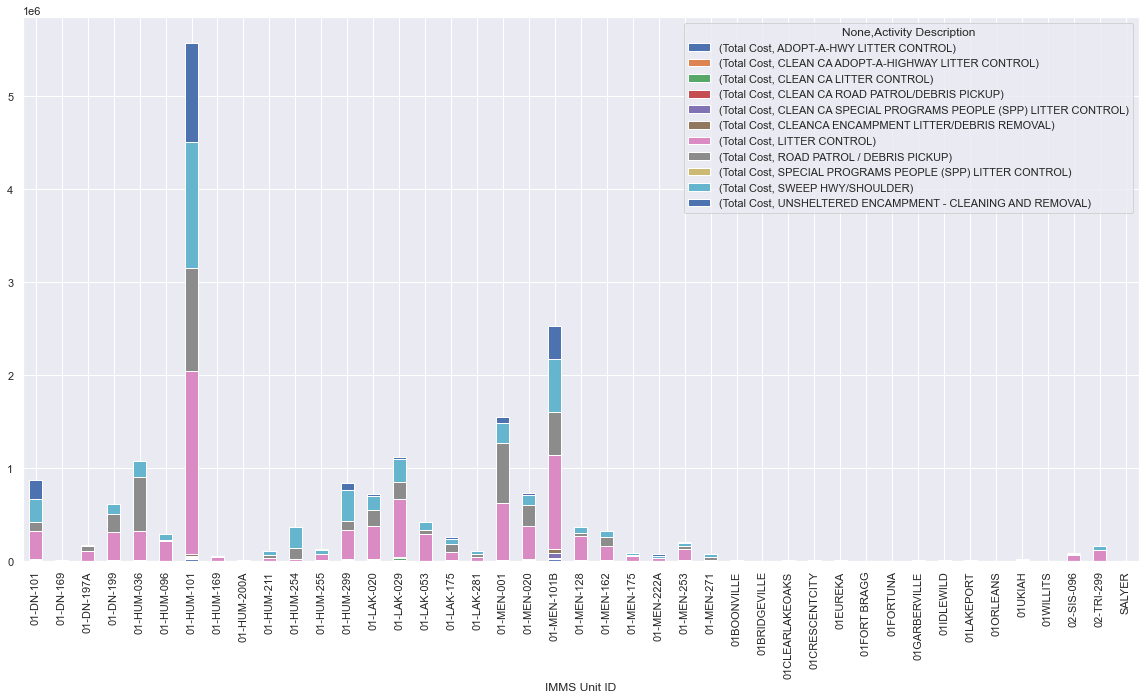

In [58]:
# 05.09.01 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d1.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

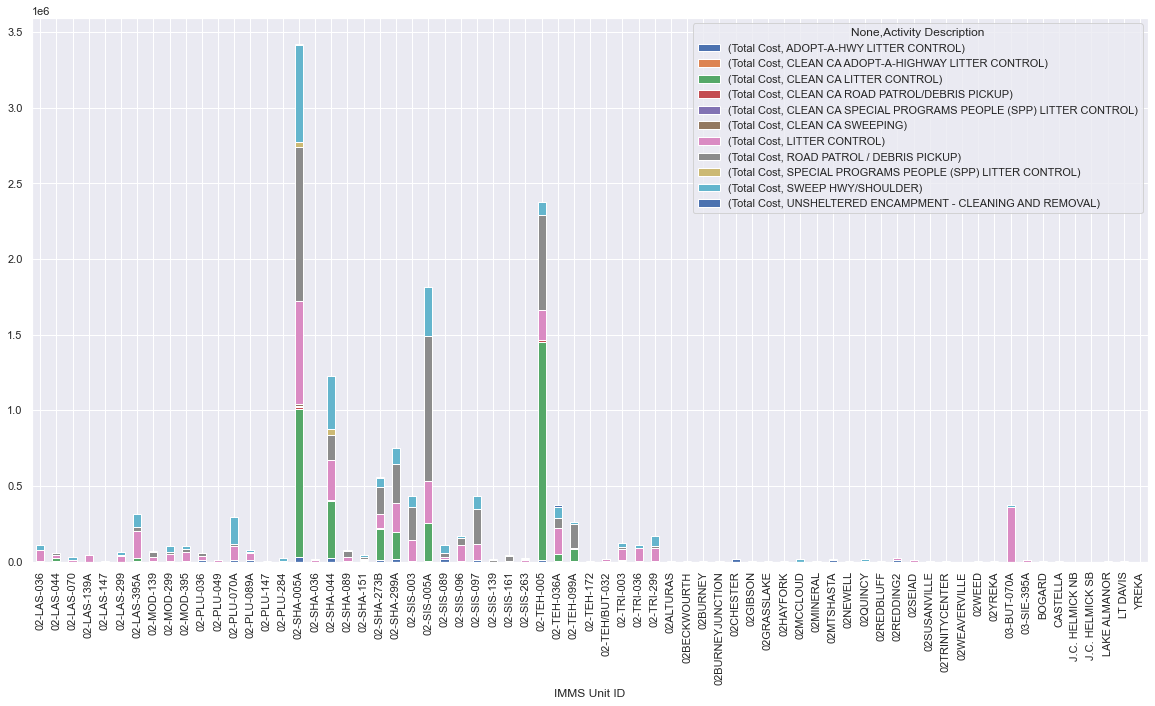

In [59]:
# 05.09.02 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d2.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

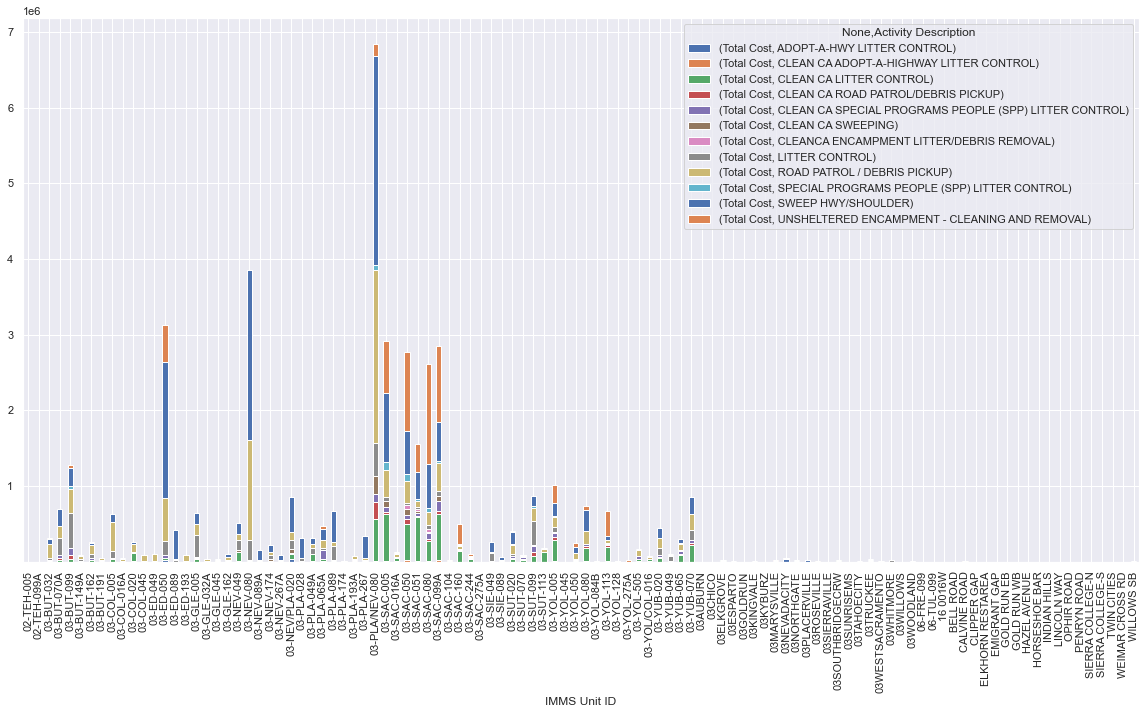

In [60]:
# 05.09.03 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d3.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

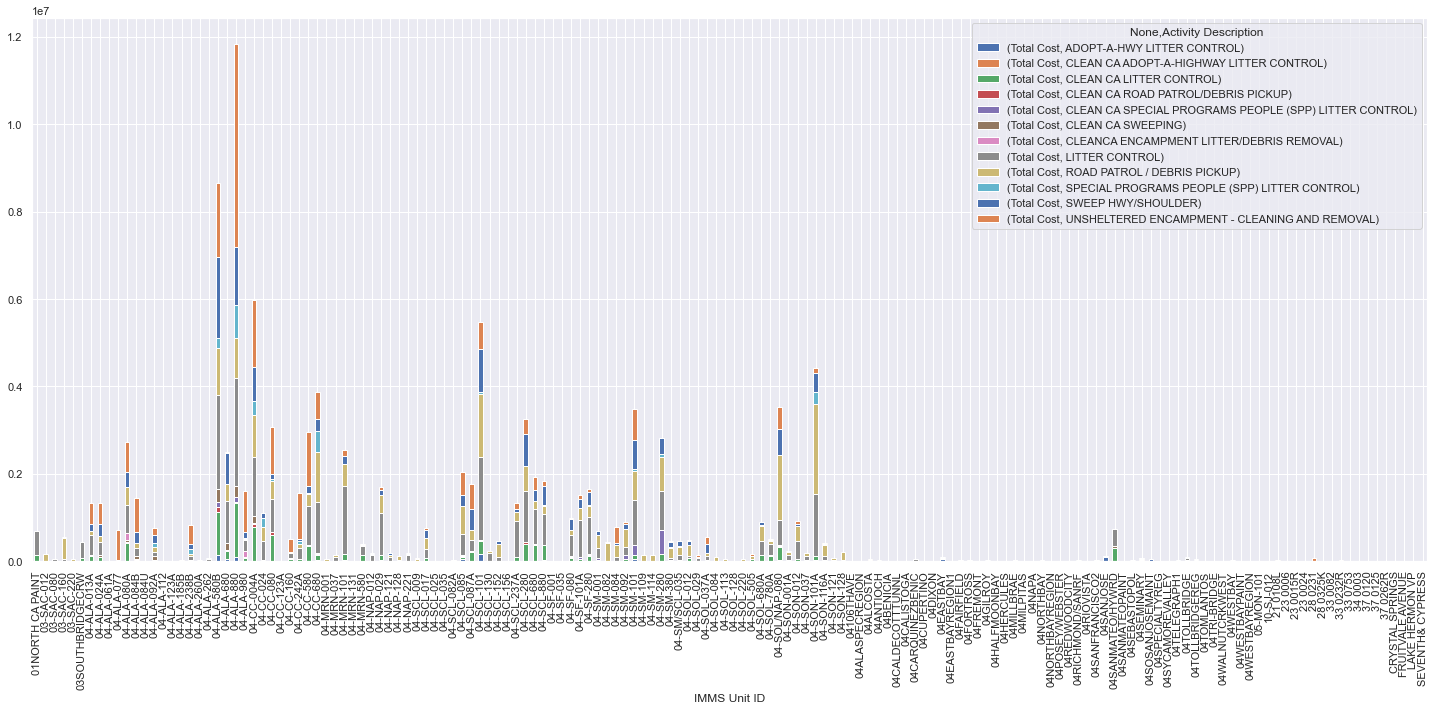

In [61]:
# 05.09.04 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(25,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d4.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

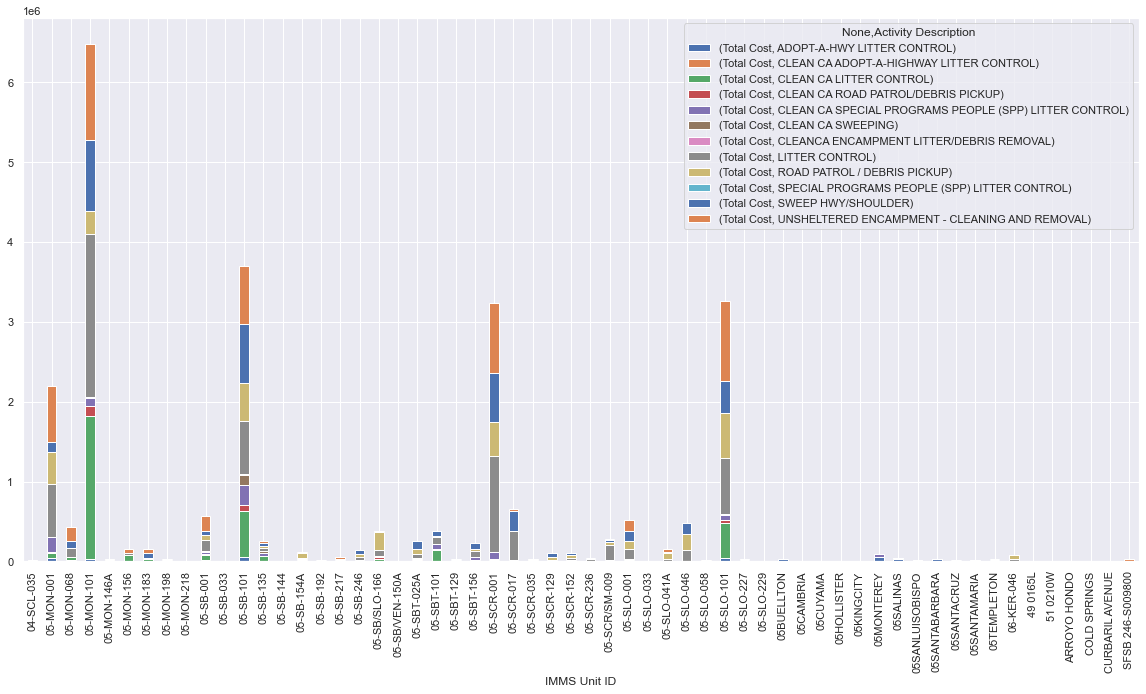

In [62]:
# 05.09.05 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d5.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

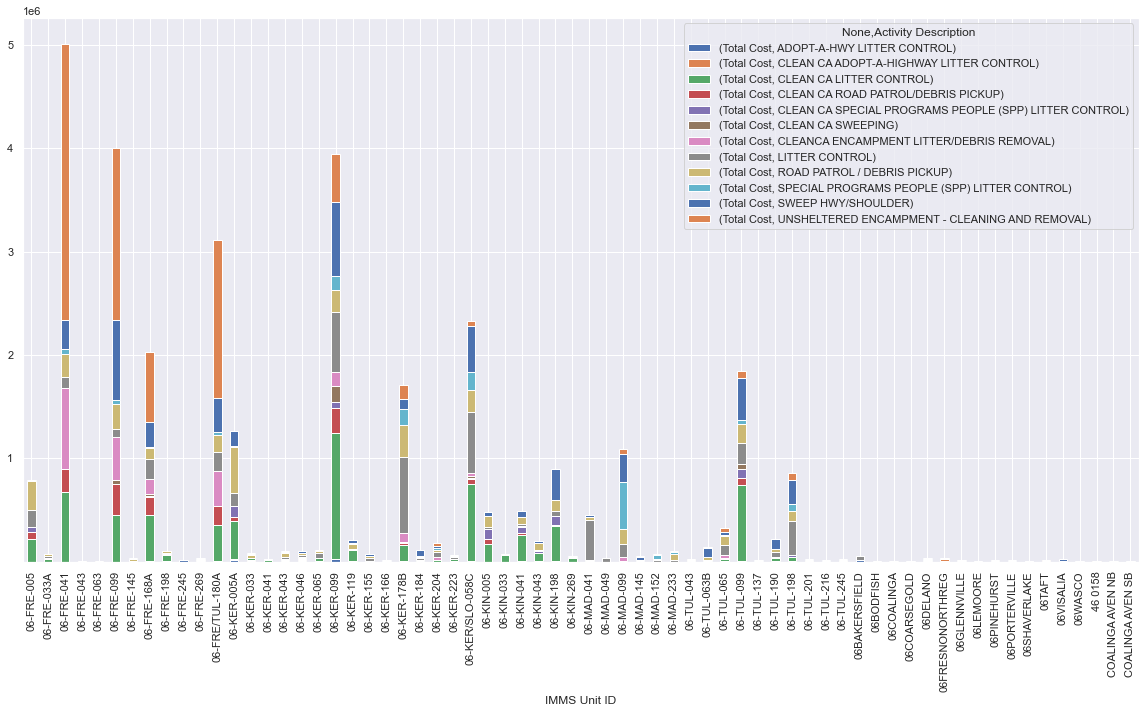

In [63]:
# 05.09.06 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d6.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

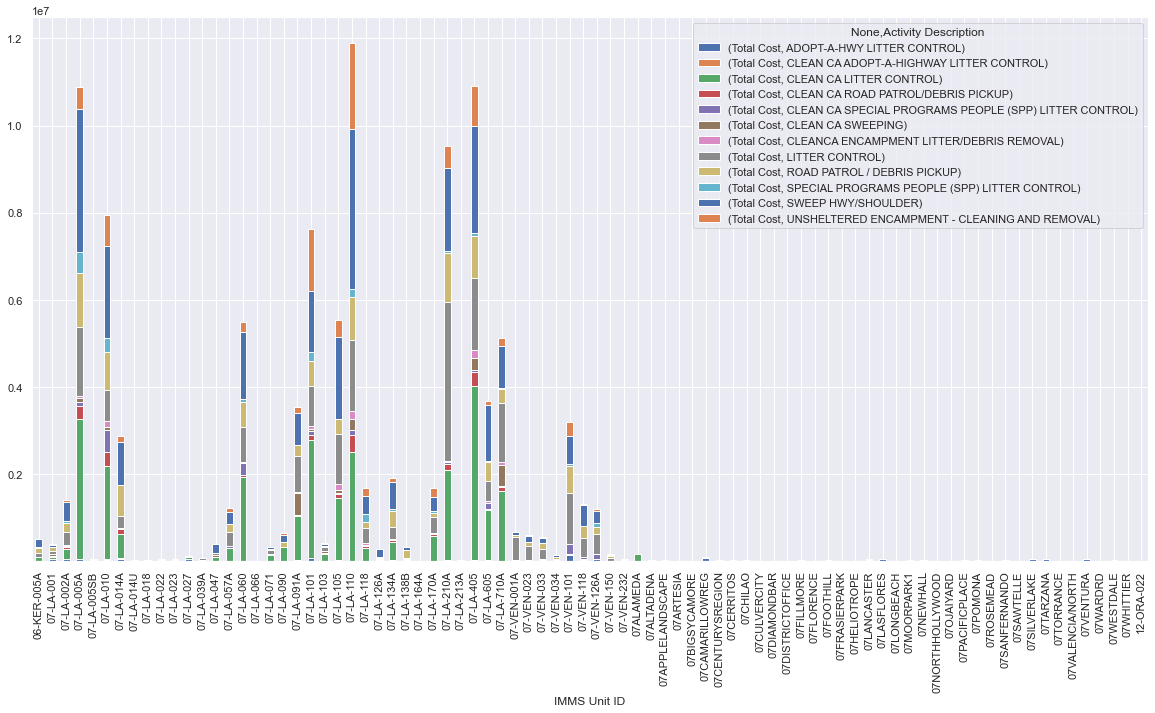

In [64]:
# 05.09.07 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d7.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

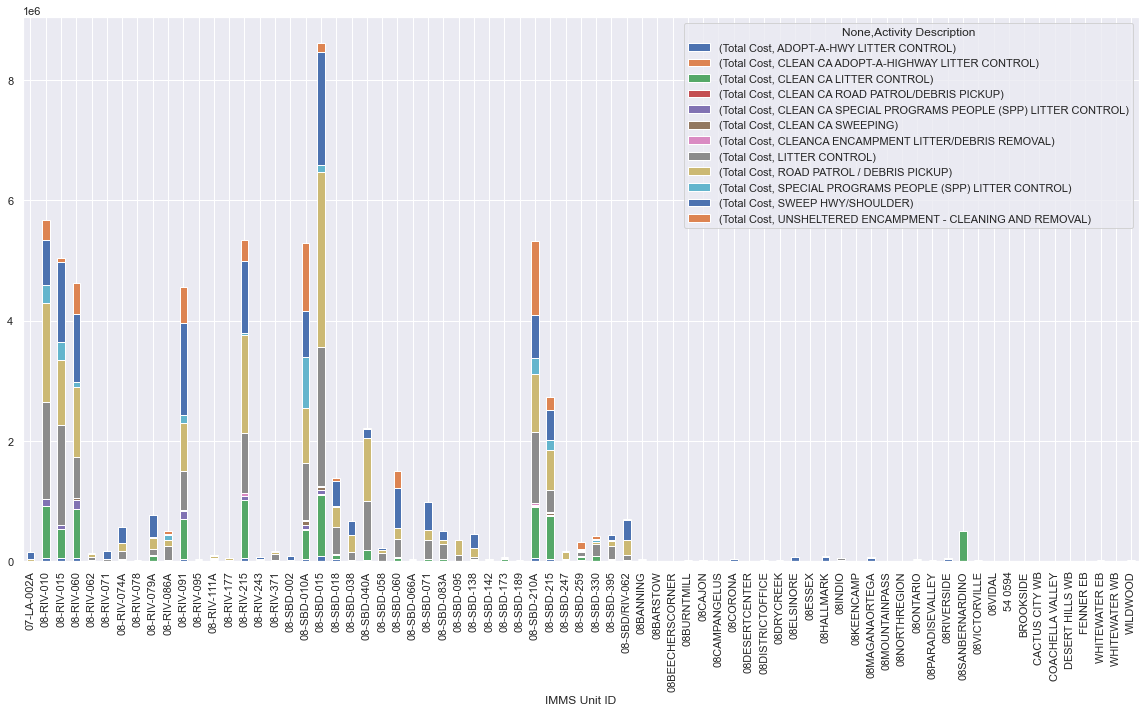

In [65]:
# 05.09.08 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d8.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

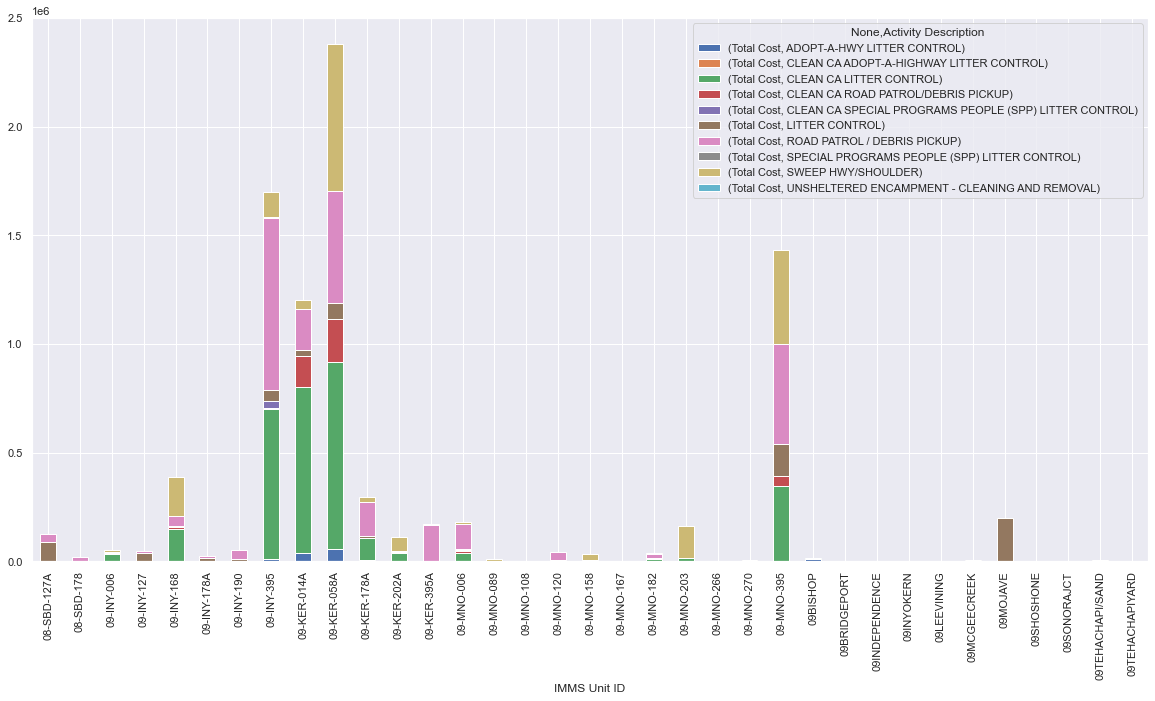

In [66]:
# 05.09.09 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d9.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

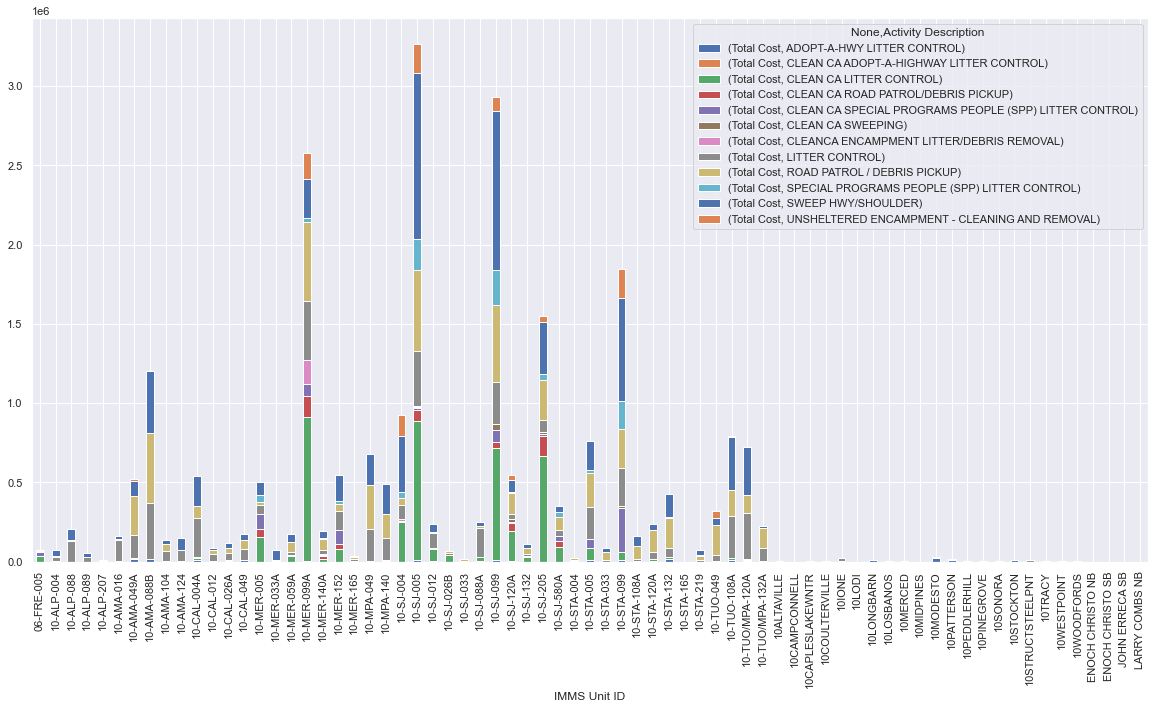

In [67]:
# 05.09.10 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d10.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

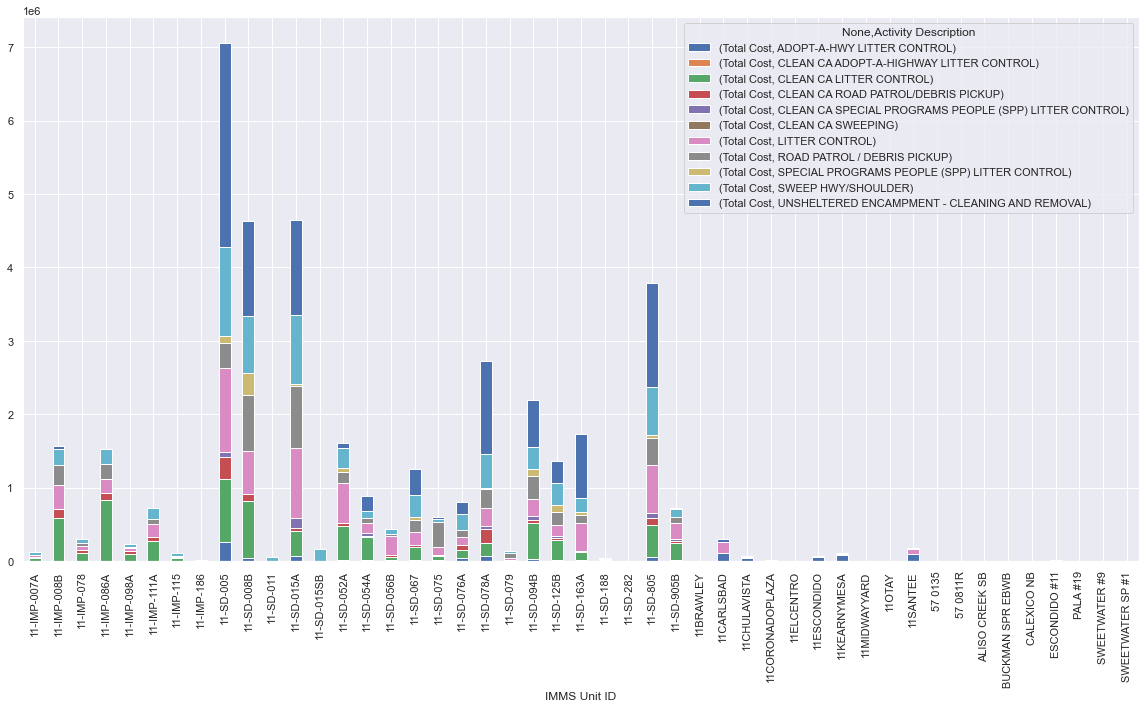

In [68]:
# 05.09.11 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d11.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

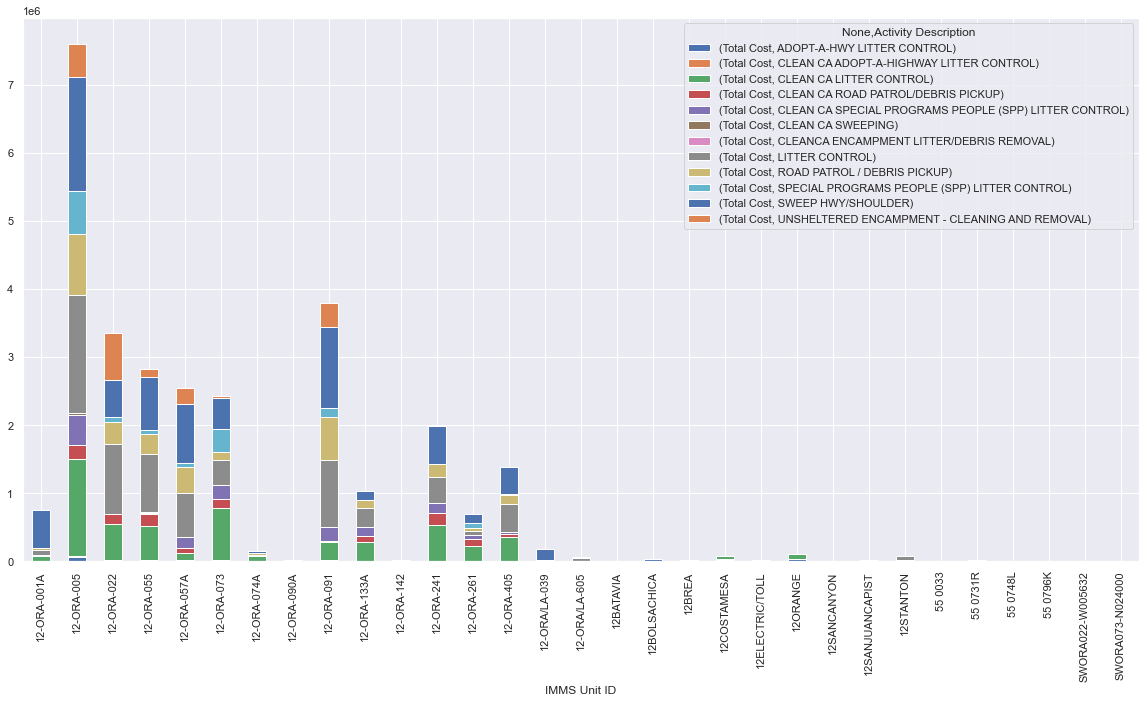

In [69]:
# 05.09.12 - plot work activity cost by district

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_all_periods_activity_cost_d12.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

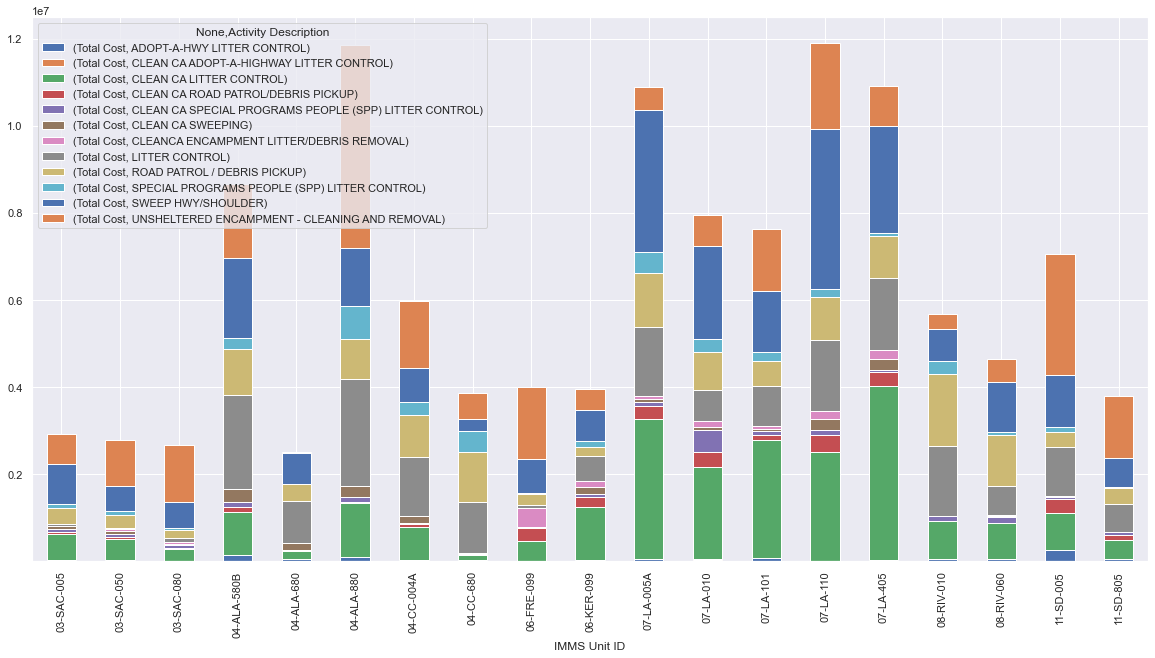

In [70]:
# 05.09.13 - plot work activity cost by hotspot corridors

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_hotspot_all_activity_cost.plot.bar(stacked=True)

<AxesSubplot:xlabel='IMMS Unit ID'>

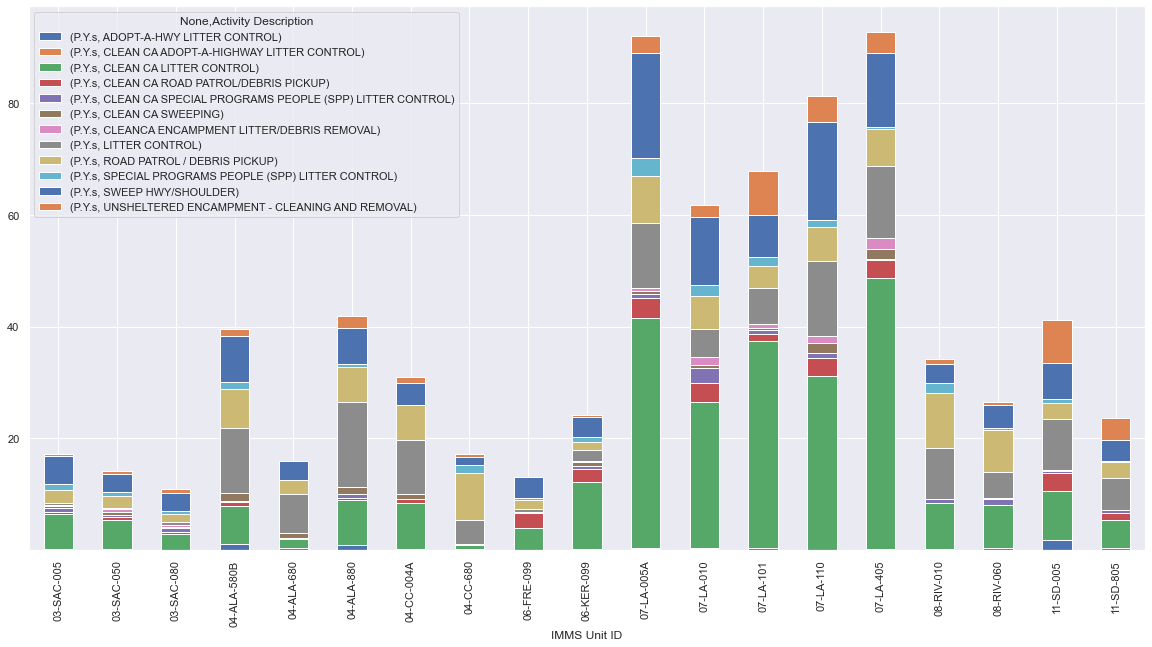

In [71]:
# 05.09.14 - plot work total labor by hotspot corridors

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on work activity cost
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_imms_hotspot_all_activity_labor.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

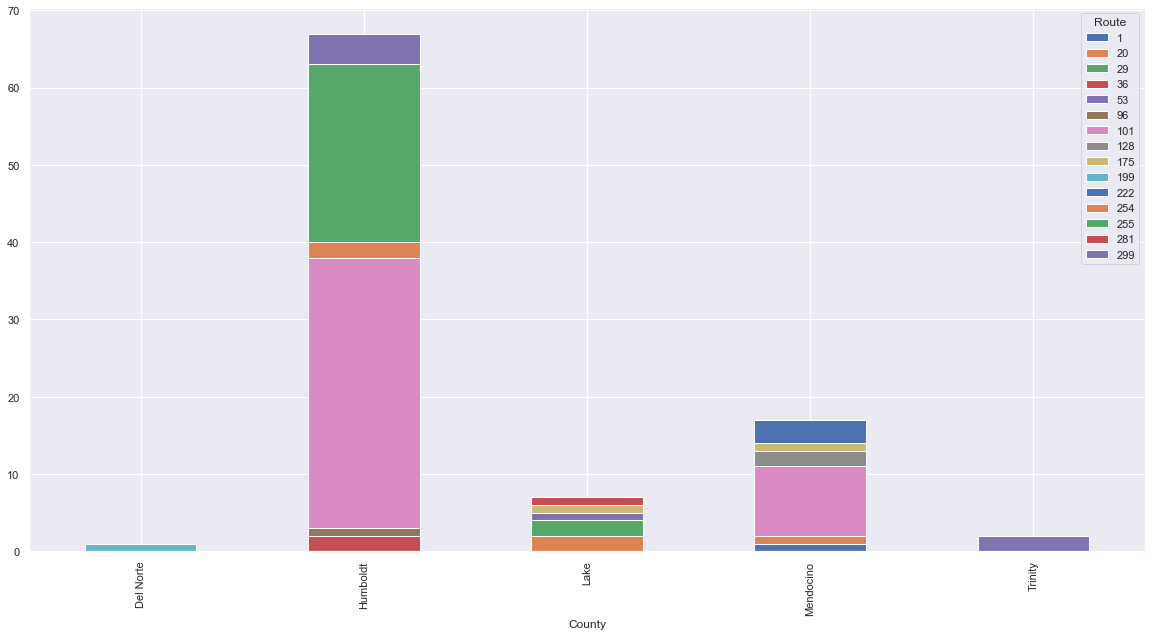

In [72]:
# 05.10.01 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d1.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

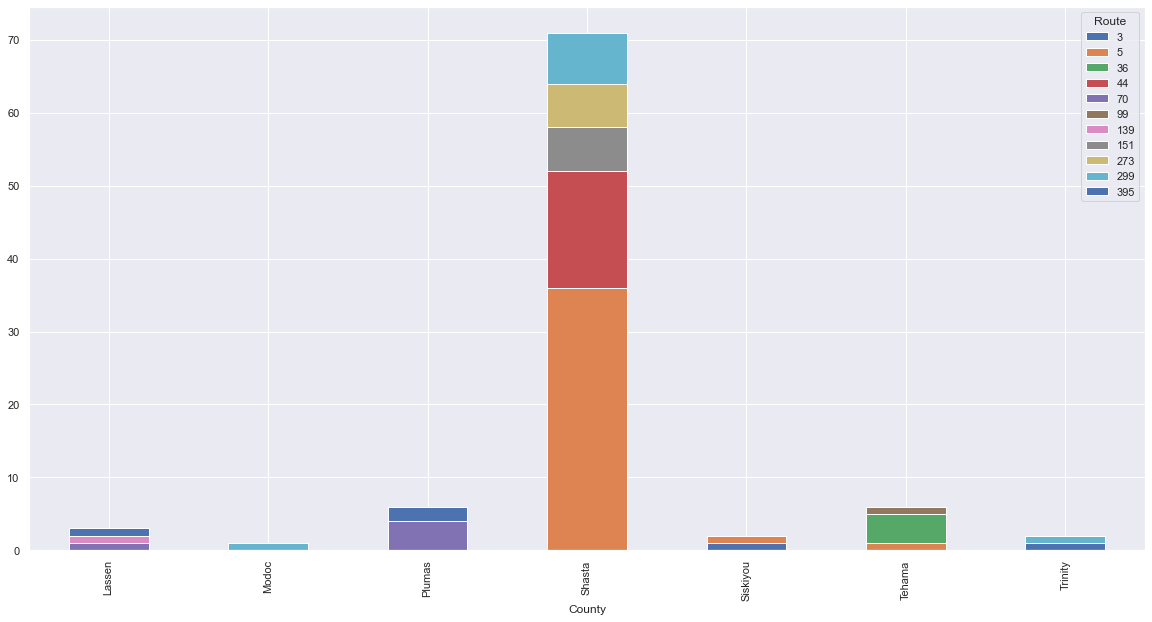

In [73]:
# 05.10.02 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d2.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

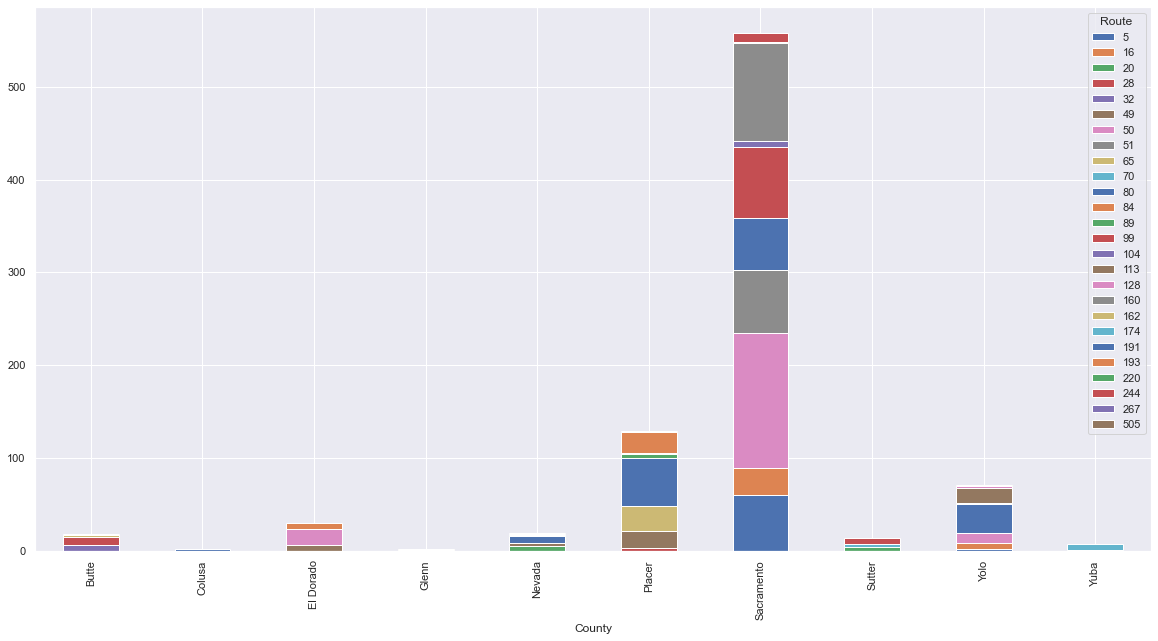

In [74]:
# 05.10.03 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d3.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

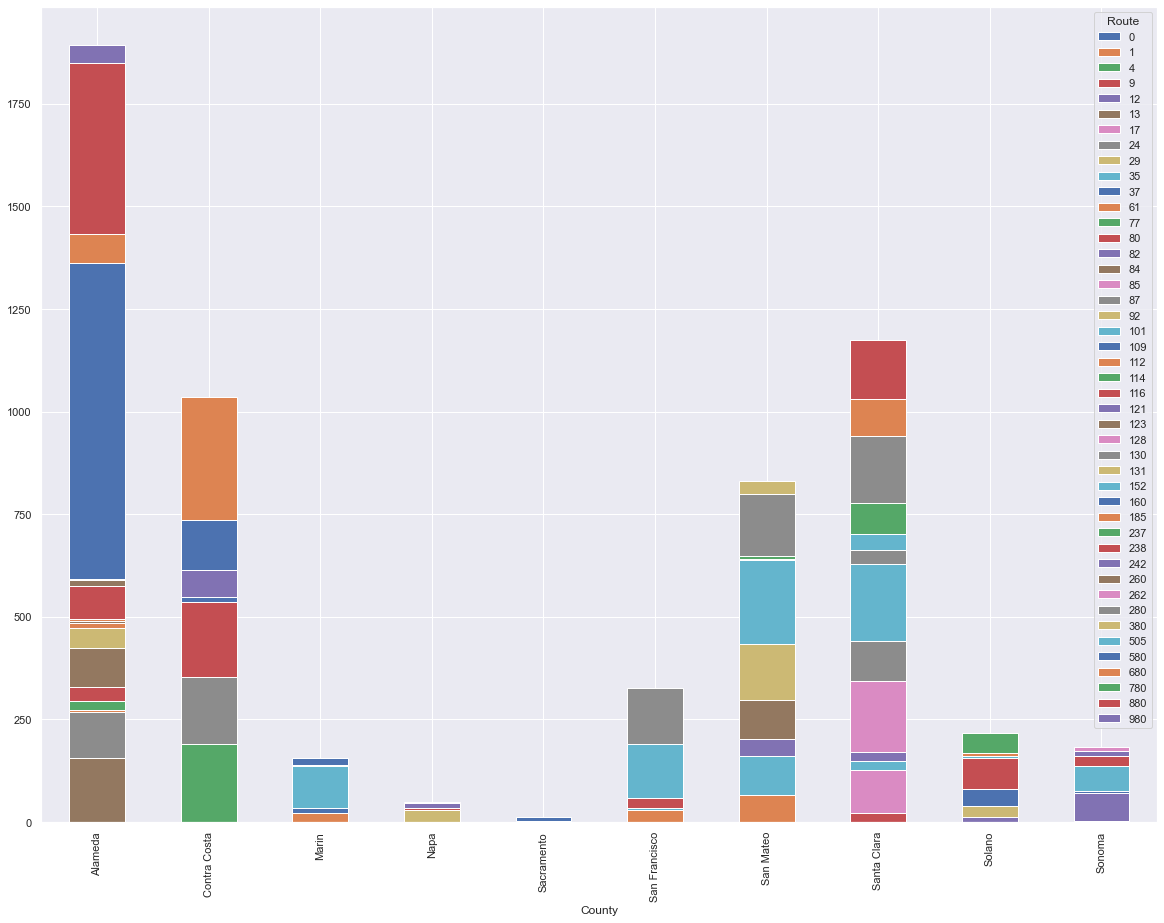

In [75]:
# 05.10.04 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,15)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d4.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

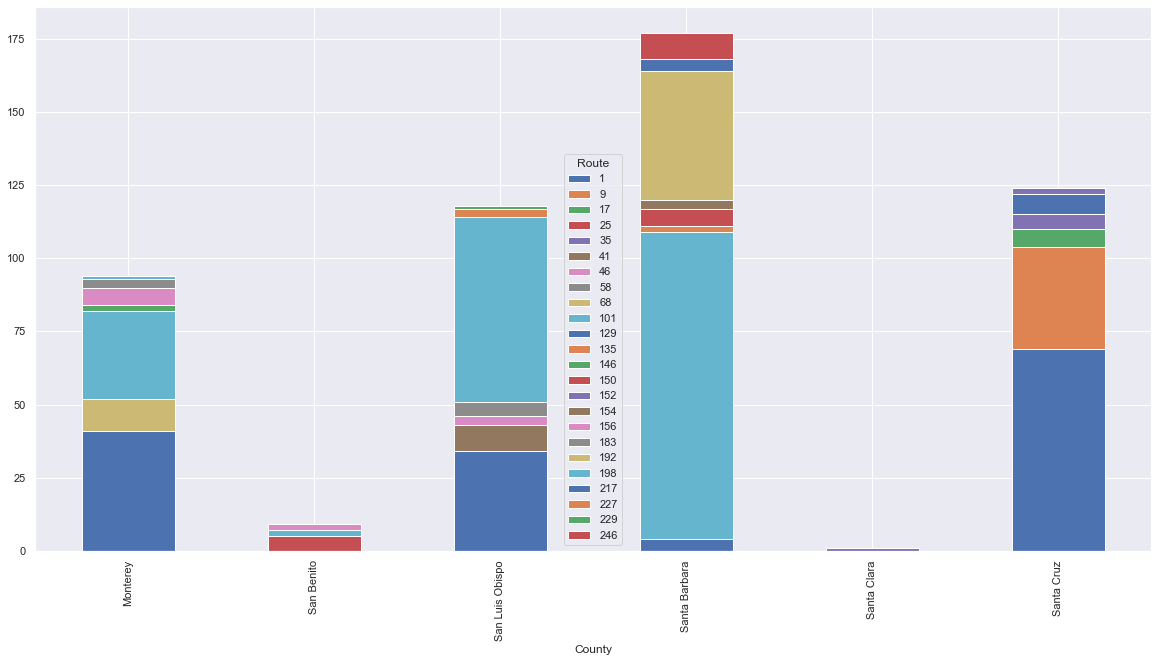

In [76]:
# 05.10.05 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d5.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

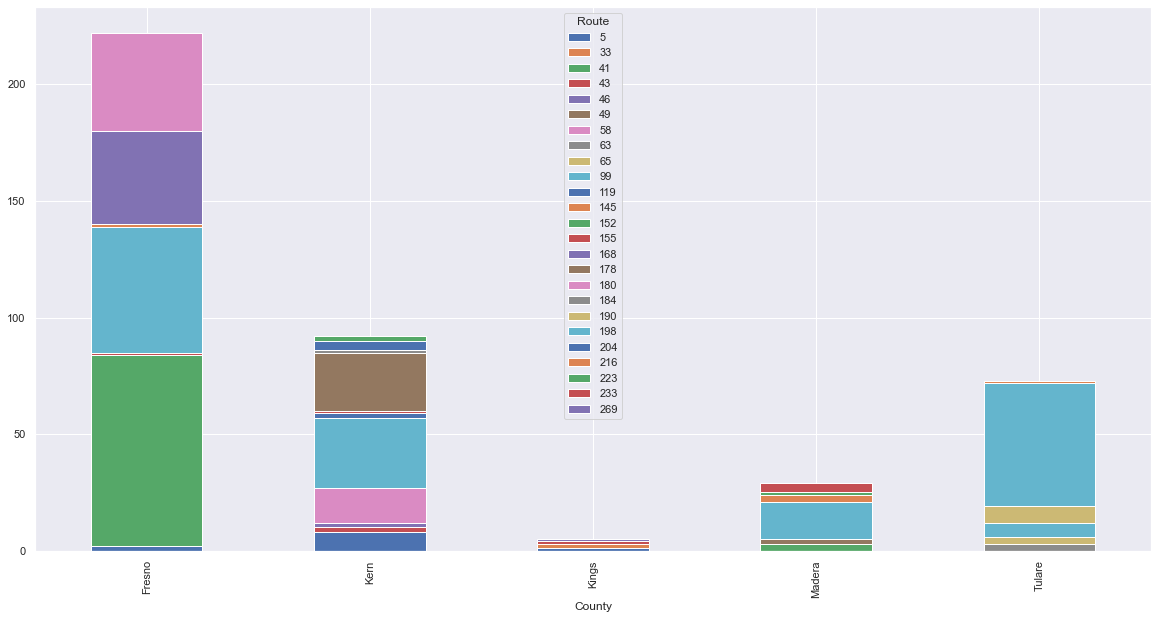

In [77]:
# 05.10.06 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d6.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

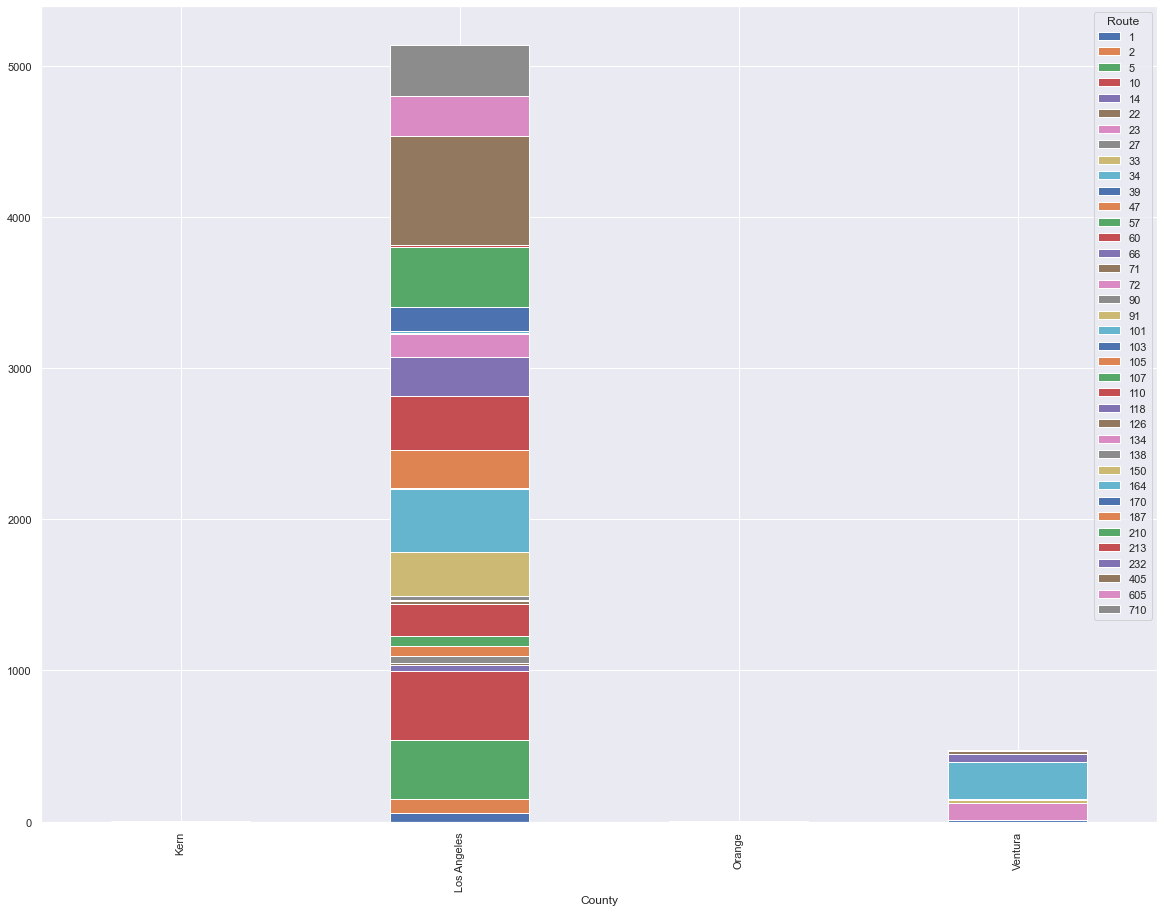

In [78]:
# 05.10.07 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,15)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d7.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

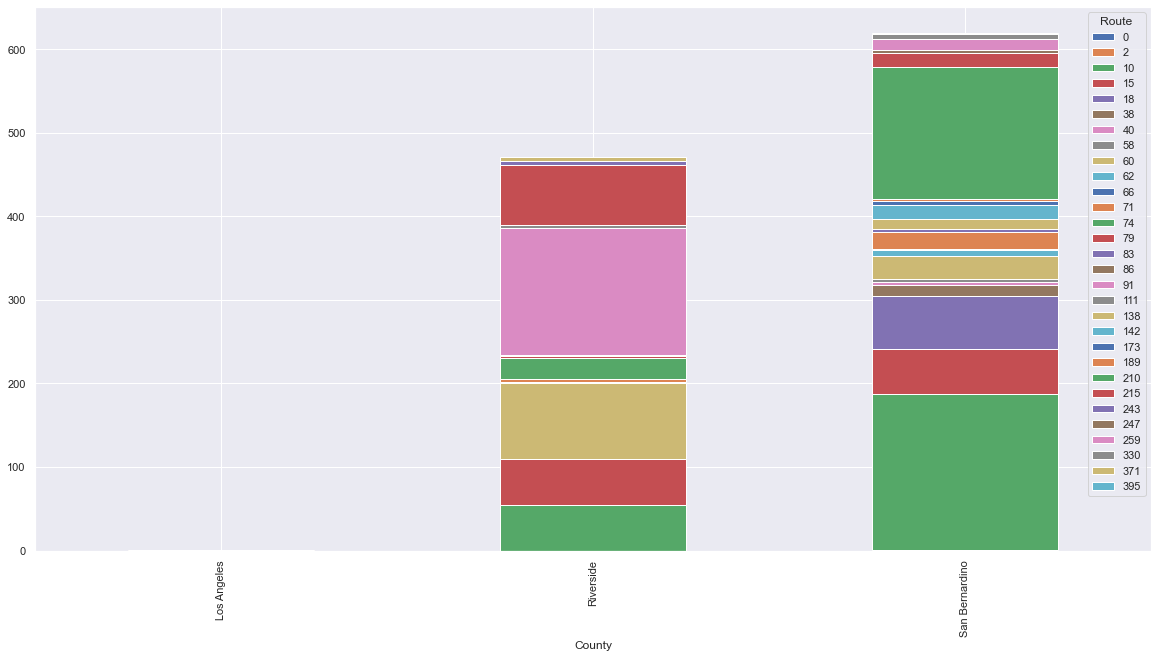

In [79]:
# 05.10.08 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d8.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

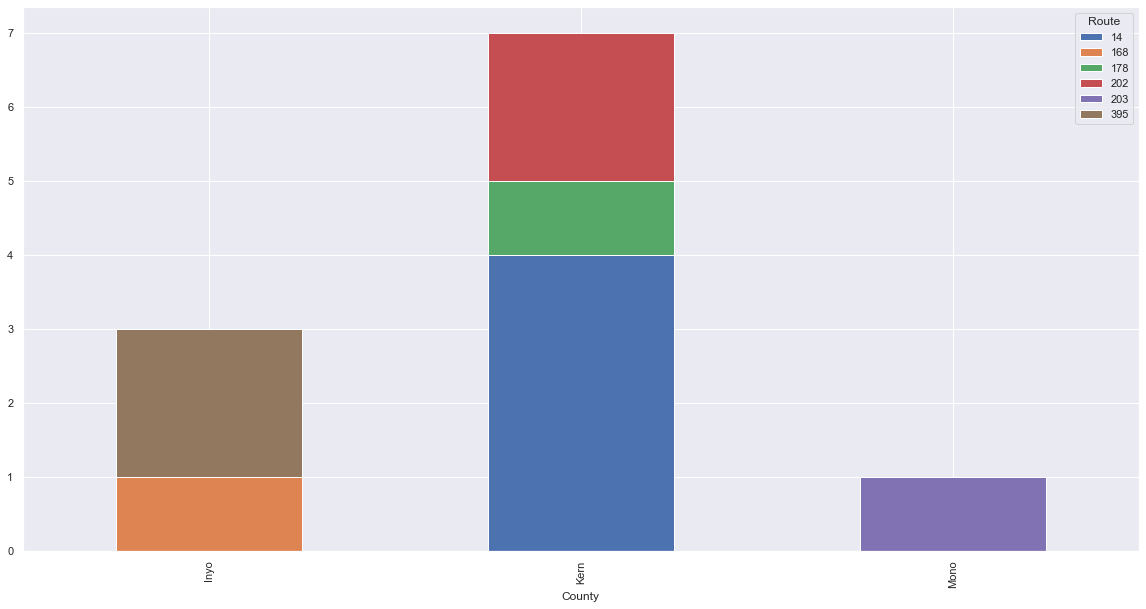

In [80]:
# 05.10.09 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d9.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

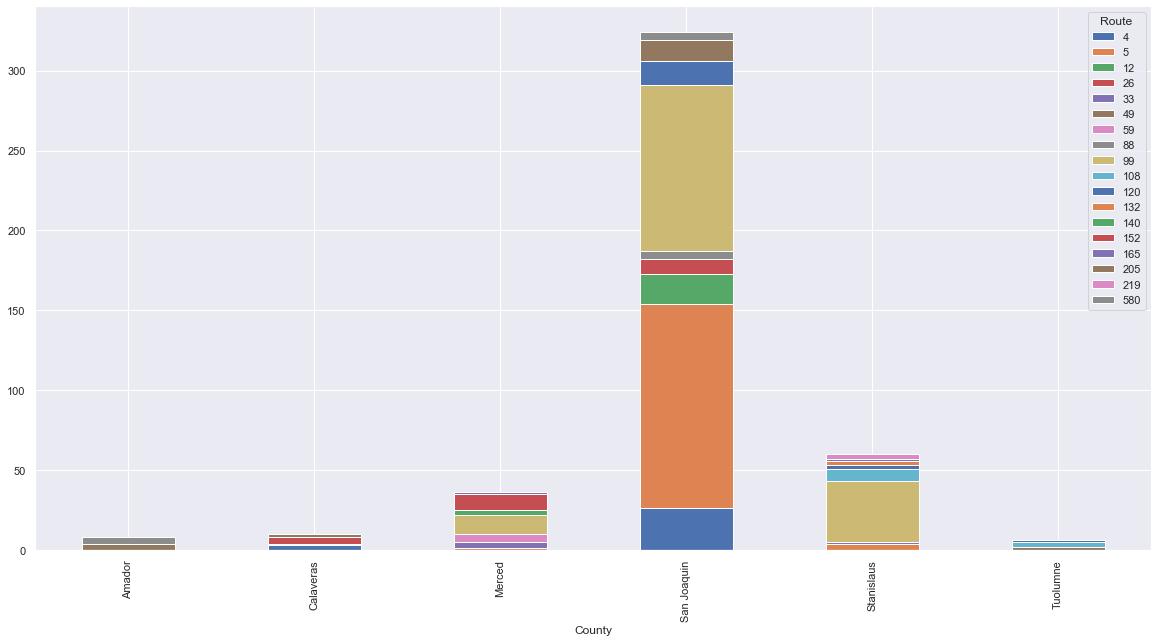

In [81]:
# 05.10.10 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d10.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

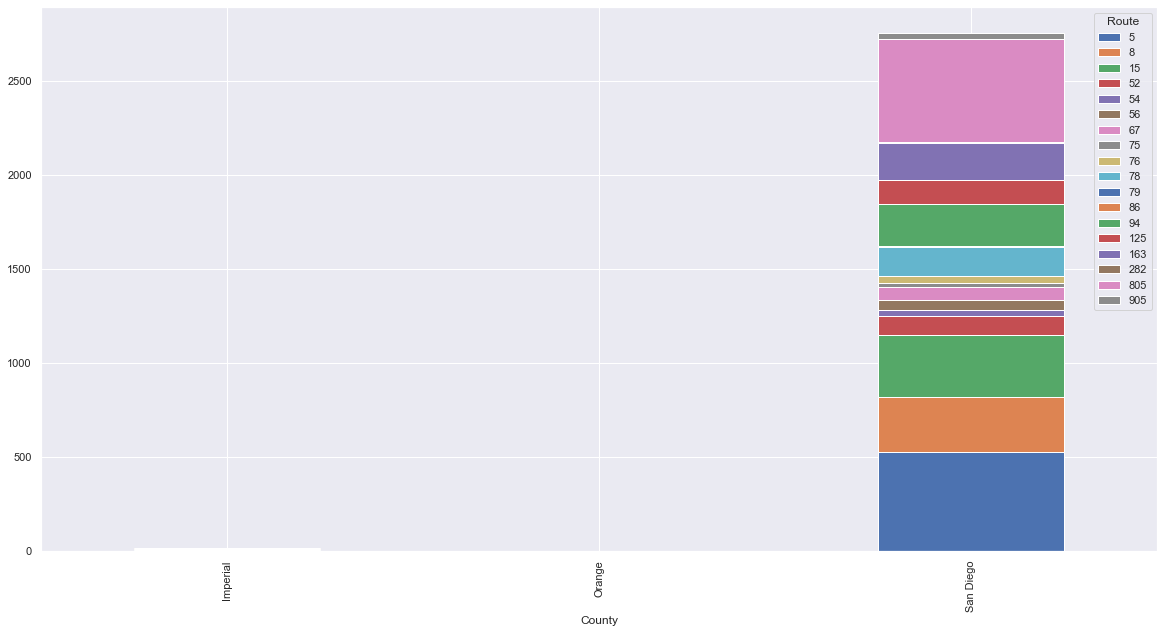

In [82]:
# 05.10.11 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d11.plot.bar(stacked=True)

<AxesSubplot:xlabel='County'>

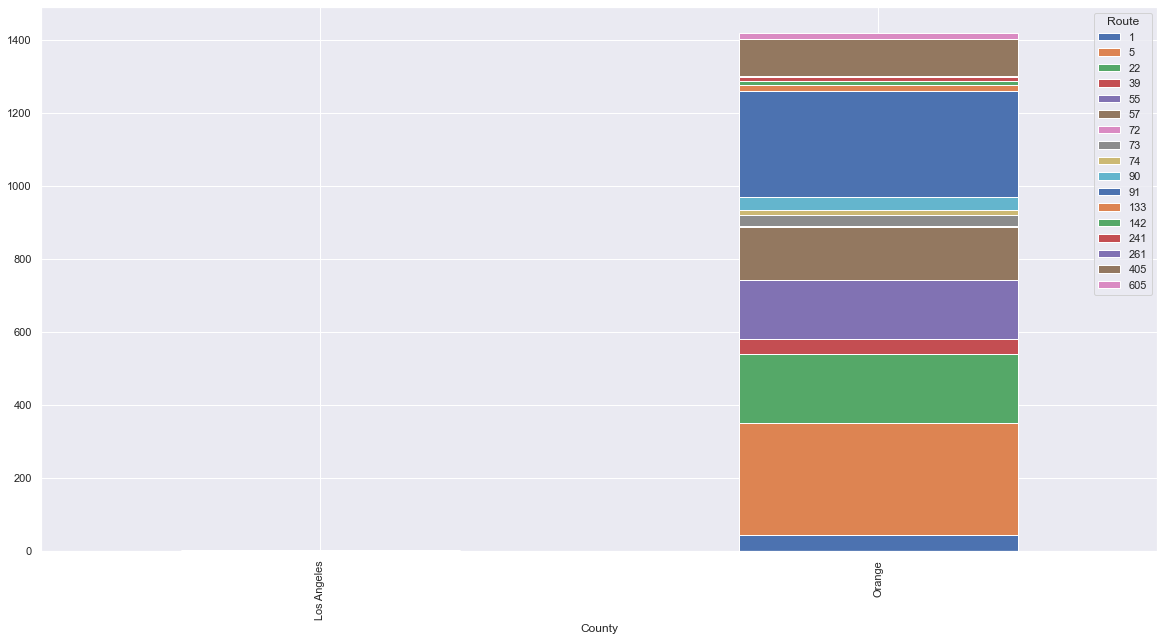

In [83]:
# 05.10.12 - plot csr counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_csr_all_periods_route_count_d12.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

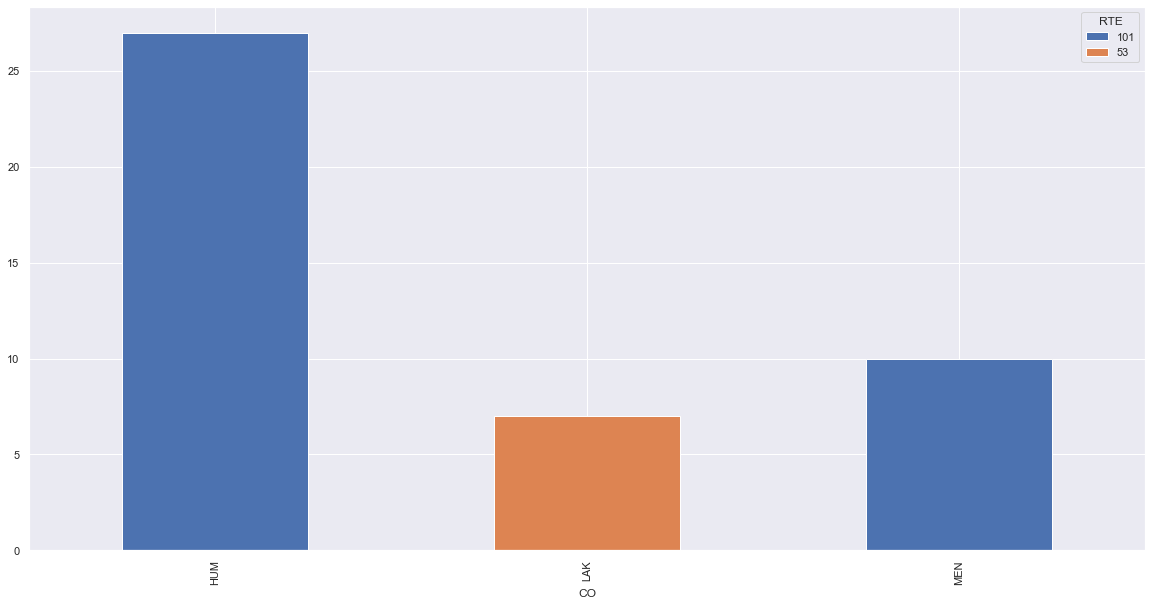

In [84]:
# 05.11.01 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d1.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

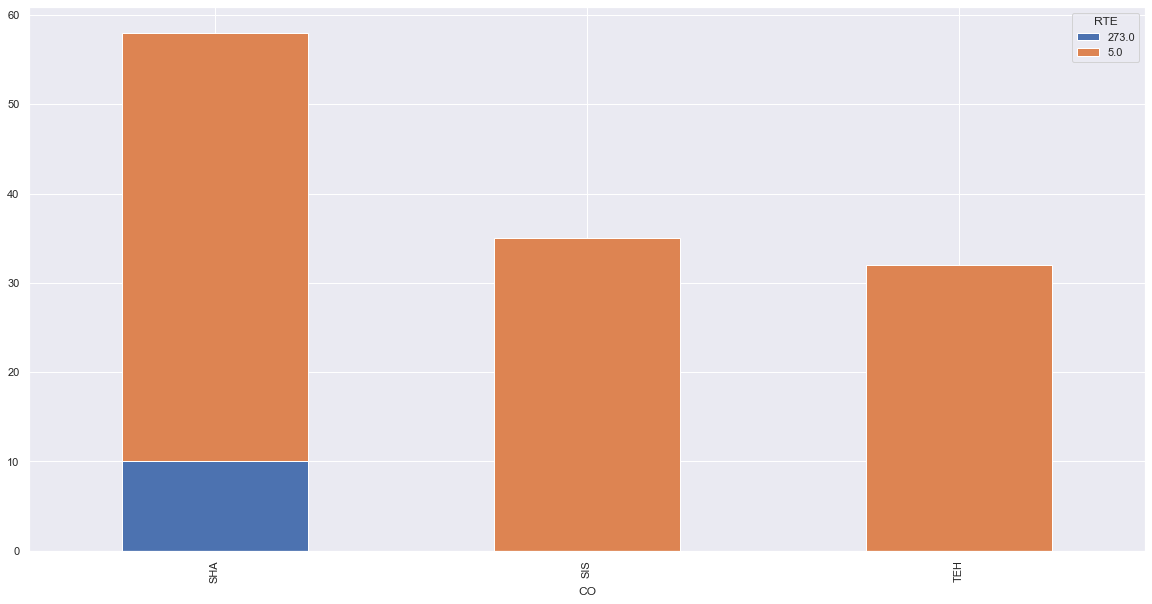

In [85]:
# 05.11.02 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d2.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

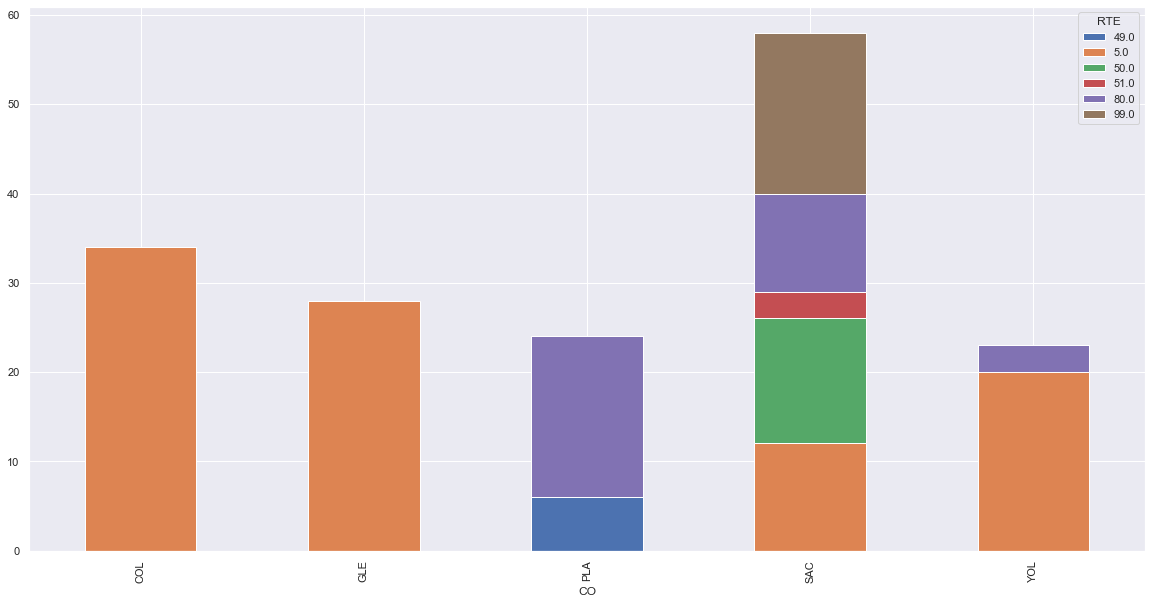

In [86]:
# 05.11.03 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d3.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

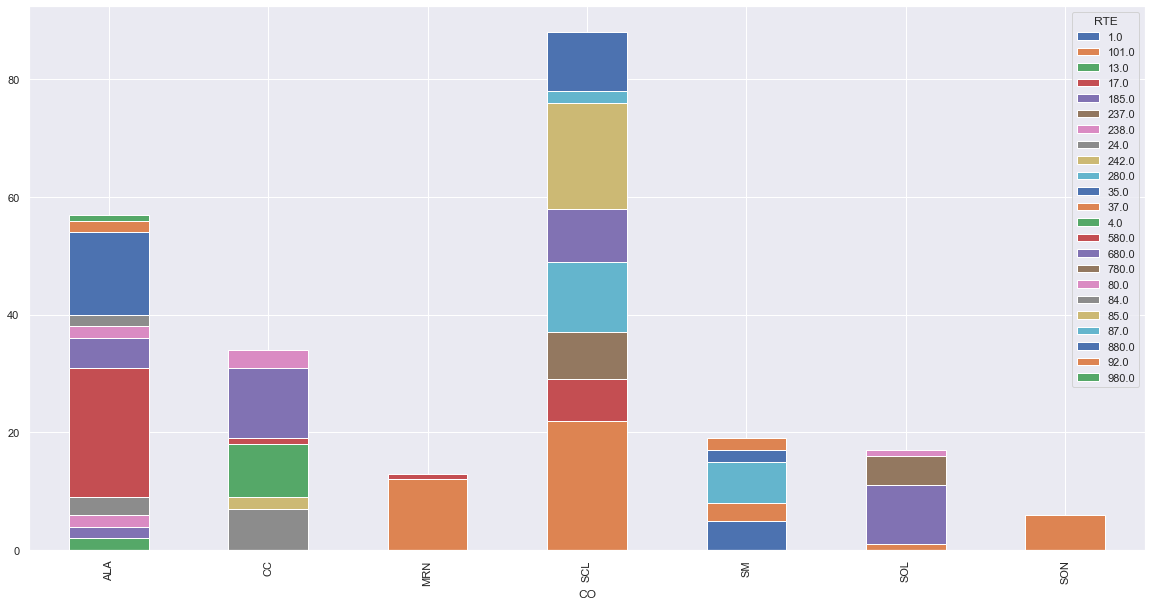

In [87]:
# 05.11.04 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d4.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

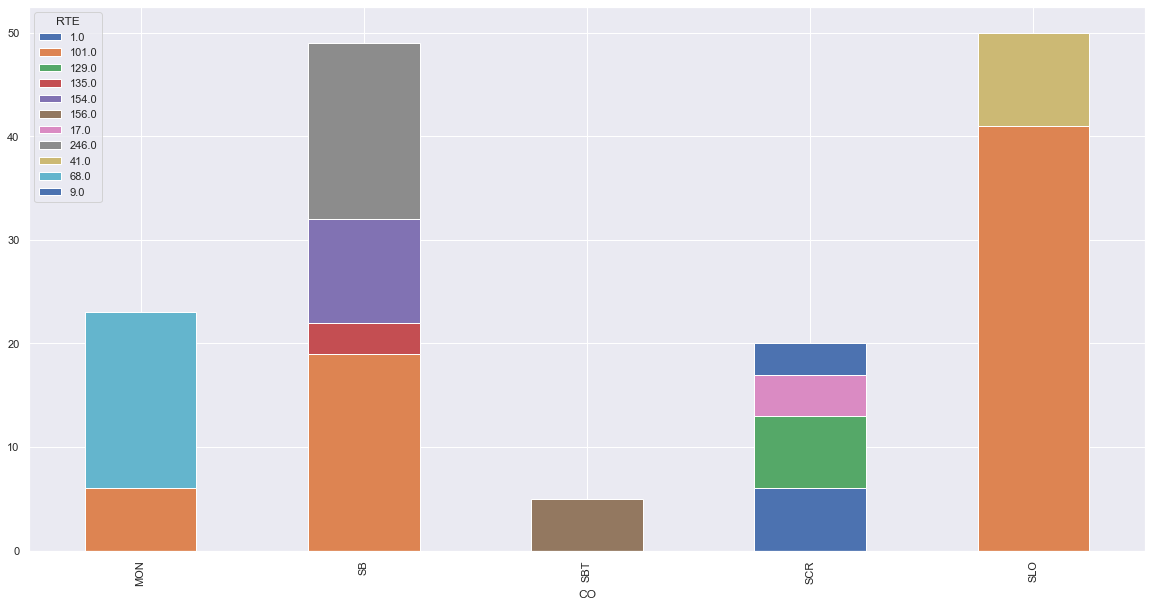

In [88]:
# 05.11.05 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d5.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

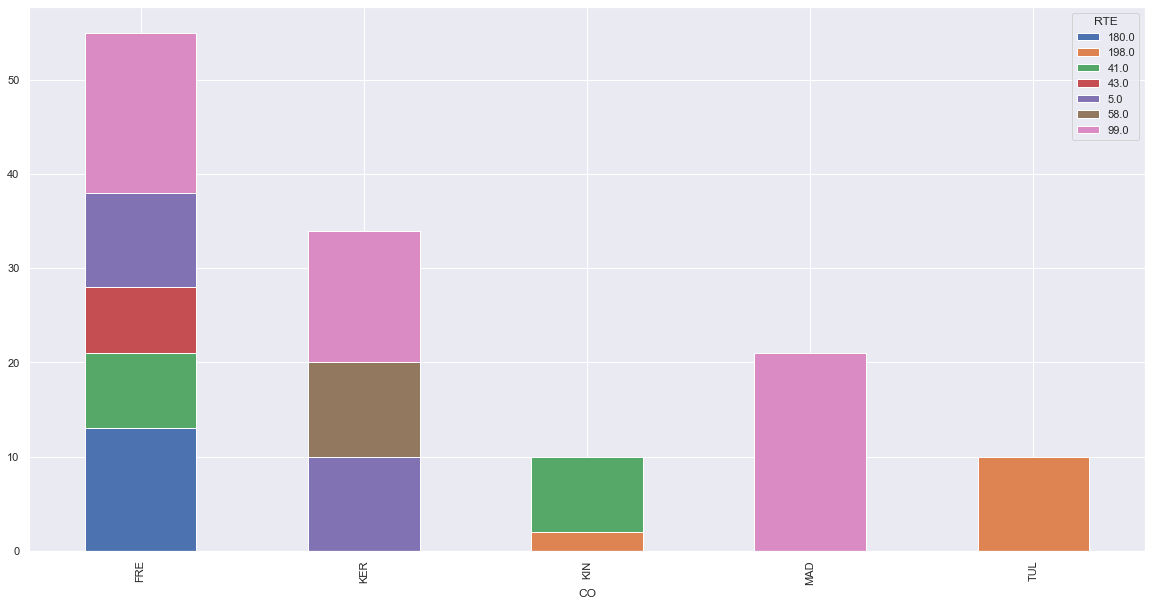

In [89]:
# 05.11.06 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d6.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

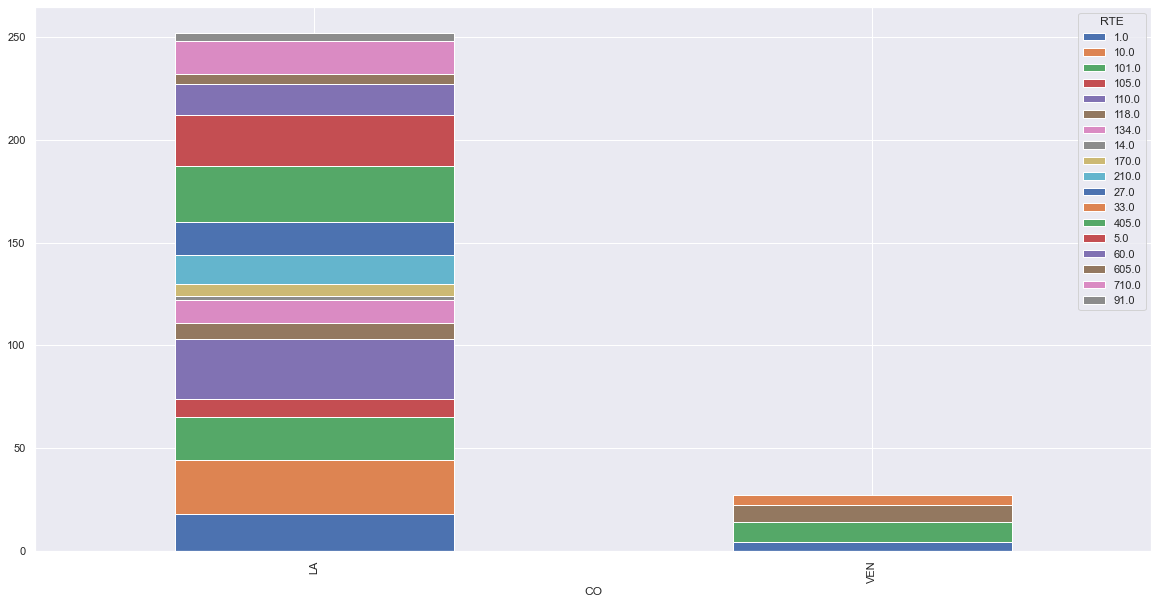

In [90]:
# 05.11.07 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d7.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

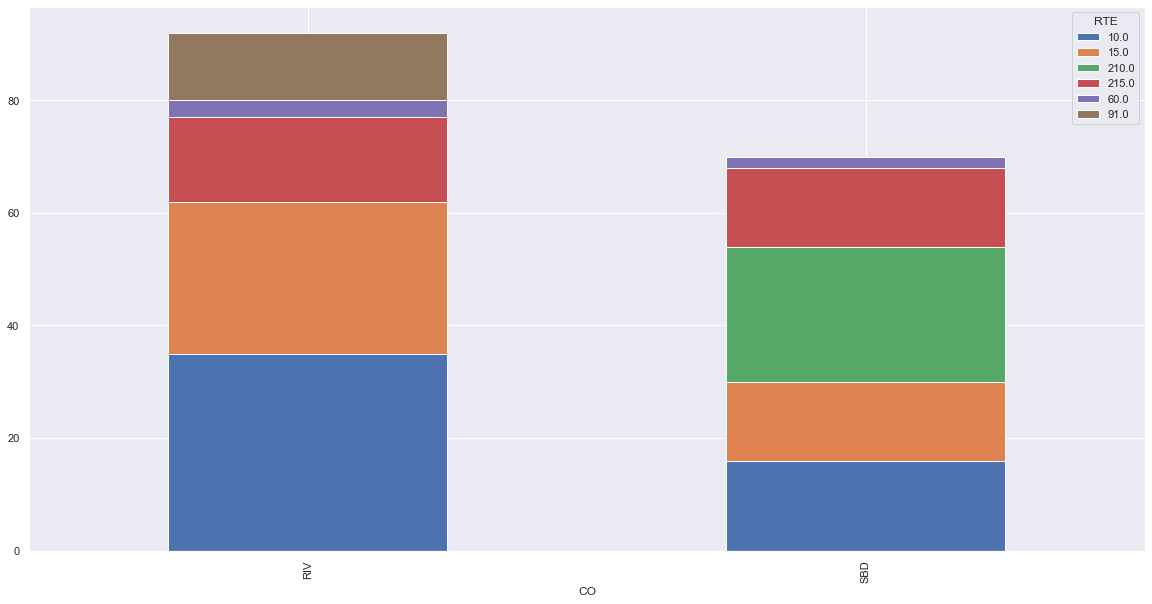

In [91]:
# 05.11.08 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d8.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

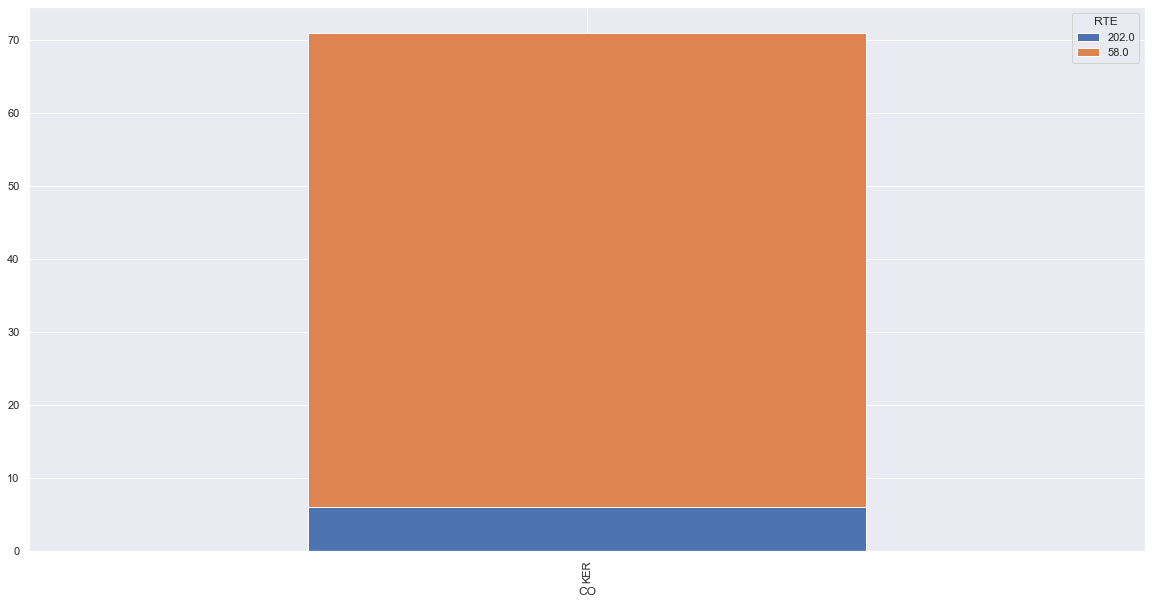

In [92]:
# 05.11.09 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d9.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

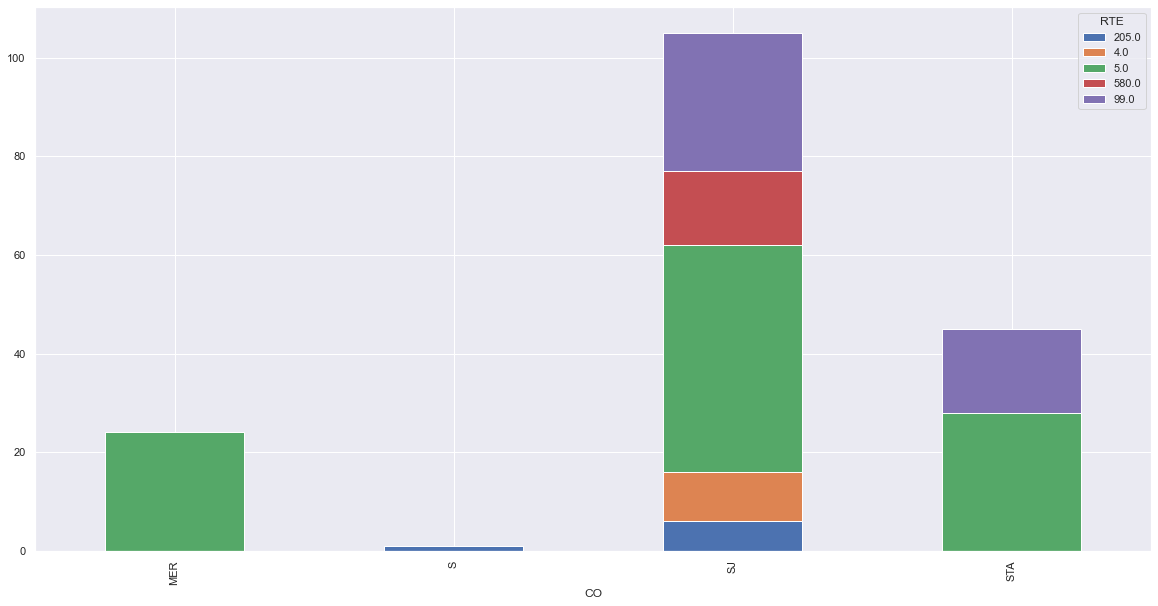

In [93]:
# 05.11.10 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d10.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

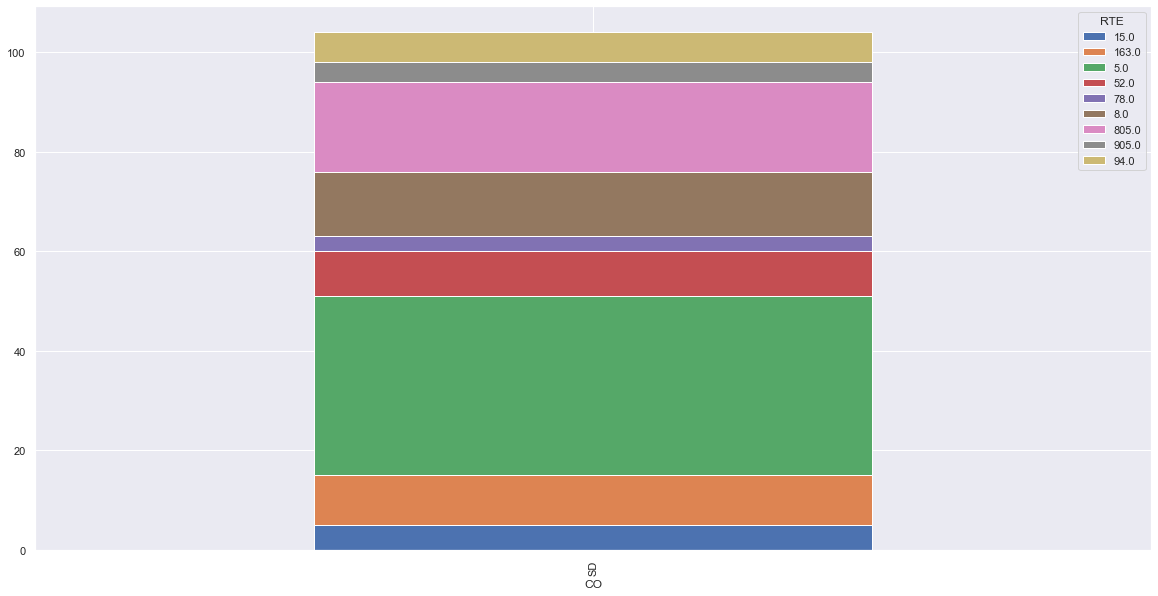

In [94]:
# 05.11.11 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d11.plot.bar(stacked=True)

<AxesSubplot:xlabel='CO'>

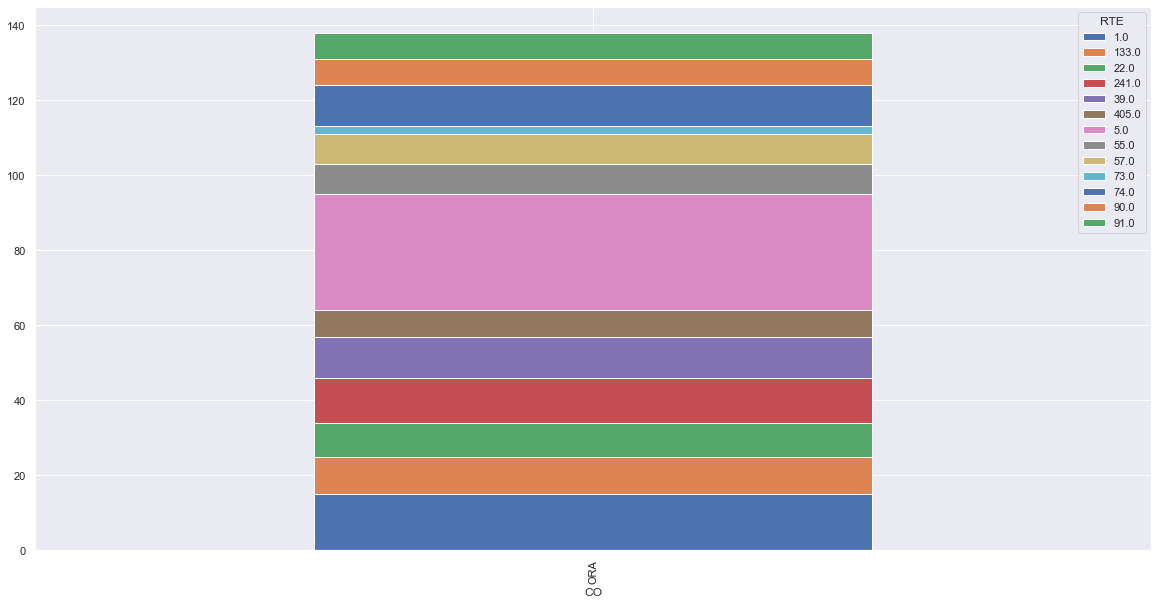

In [95]:
# 05.11.12 - plot lost counts by dist/county/route

# note: dim convention = x, y
sns.set_theme(rc={'figure.figsize':(20,10)})
# create stacked bar chart based on csr count
# https://stackoverflow.com/questions/67805611/stacked-bar-plot-in-seaborn-with-groups
df_los_all_count_d12.plot.bar(stacked=True)